In [140]:
library(dplyr)
library(readr)
install.packages("caret")
library(caret)
install.packages("ggplot2")
library(ggplot2)
install.packages("randomForest")
library(randomForest)
library(lubridate)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [141]:

# Instalar y cargar las bibliotecas necesarias
install.packages("googledrive")
library(googledrive)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [142]:
# Autenticarse con Google Drive
drive_auth()

The googledrive package is requesting access to your Google account.
Enter '1' to start a new auth process or select a pre-authorized account.
1: Send me to the browser for a new auth process.
2: cesargarcia150797@gmail.com


Selection: 1


Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=https%3A%2F%2Fwww.tidyverse.org%2Fgoogle-callback%2F&response_type=code&state=803b356a031313d5f43cb55277b5e872&access_type=offline&prompt=consent



Enter authorization code: eyJjb2RlIjoiNC8wQVFsRWQ4d3V5Q2hrYWN1dUpyZVFCUklHMkM0aVlEakVuNU5IbHVHMVZYMHZWdXR6NER5Sll6WlUzRFpBc2NhYm1DbS1EZyIsInN0YXRlIjoiODAzYjM1NmEwMzEzMTNkNWY0M2NiNTUyNzdiNWU4NzIifQ==


In [144]:
# Especificar el ID del archivo y la ruta de destino
file_id <- "https://drive.google.com/file/d/1c8ATZ5VxKEo1hCmjyALNGkxGY_KmI-xx/view?usp=drivesdk"  # Reemplaza este ID con el ID de tu archivo
drive_download(as_id(file_id), path = "archivo.csv", overwrite = TRUE)

File downloaded:

• Documento de César García <id: 1c8ATZ5VxKEo1hCmjyALNGkxGY_KmI-xx>

Saved locally as:

• archivo.csv



In [145]:
# Leer el archivo CSV desde la URL
urlAge <- "https://raw.githubusercontent.com/cesargar1507/DatasetsUB/main/machine_age.csv"
urlMechanic <- "https://raw.githubusercontent.com/cesargar1507/DatasetsUB/main/mechanic_antiquity.csv"
df <- read_csv("archivo.csv", show_col_types = FALSE)
df_age <- read_csv(urlAge, show_col_types = FALSE)
df_mechanic <- read_csv(urlMechanic, show_col_types = FALSE)

In [146]:
summary(df)

   equipment        operation           wo_type           base_model       
 Min.   : 100268   Length:135860      Length:135860      Length:135860     
 1st Qu.:1024525   Class :character   Class :character   Class :character  
 Median :1078769   Mode  :character   Mode  :character   Mode  :character  
 Mean   :1020927                                                           
 3rd Qu.:1149222                                                           
 Max.   :1169630                                                           
 problem_code       problem_desc       failure_code       failure_desc      
 Length:135860      Length:135860      Length:135860      Length:135860     
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
      

In [147]:
head(df,5)

equipment,operation,wo_type,base_model,problem_code,problem_desc,failure_code,failure_desc,cause_code,cause_desc,⋯,action_desc,mechanic,date,downtime_gross,pit_coverage,real_downtime,parts_cost,repair_hours,waiting_hours,changed_pcs
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
100268,BIND LEG,Corrective Maintenance,VC1700,SEWP002,It sews with defect / Cose con defecto,SEWF001,Machine head failure stopping sewing / Falla cabezal dejando de coser,SEWC017,Misadjusted machine head teeth / Dientes de cabezal desajustados,⋯,Adjust machine head teeth / Ajustar dientes de cabezal,Jaime Rivera,10/3/2023,1.25,0,1.25,$16.81,1.25,0,1
100268,BIND LEG,Corrective Maintenance,VC1700,SEWP002,It sews with defect / Cose con defecto,SEWF001,Machine head failure stopping sewing / Falla cabezal dejando de coser,SEWC017,Misadjusted machine head teeth / Dientes de cabezal desajustados,⋯,Adjust machine head teeth / Ajustar dientes de cabezal,Jaime Rivera,10/3/2023,1.25,0,1.25,$16.81,1.25,0,1
100268,BIND LEG,Corrective Maintenance,VC1700,SEWP002,It sews with defect / Cose con defecto,SEWF001,Machine head failure stopping sewing / Falla cabezal dejando de coser,SEWC012,Misadjusted machine head needle bar / Barra de aguja de cabezal desajustada,⋯,Adjust machine head teeth / Ajustar dientes de cabezal,Jaime Rivera,1/17/2024,3.00,3,0.00,$12.50,2.00,1,2
100312,BARTACK,Corrective Maintenance,VC1700,SEWP001,It does not sew / No cose,SEWF001,Machine head failure stopping sewing / Falla cabezal dejando de coser,SEWC005,Broken machine head ball joint / Rotura de biela de cabezal,⋯,Replace machine head ball joint / Reemplazar biela de cabezal,JERONIMO FUNEZ,3/18/2023,0.25,0,0.25,$2.67,0.25,0,0
100312,BARTACK,Corrective Maintenance,VC1700,SEWP001,It does not sew / No cose,SEWF001,Machine head failure stopping sewing / Falla cabezal dejando de coser,SEWC005,Broken machine head ball joint / Rotura de biela de cabezal,⋯,Replace machine head ball joint / Reemplazar biela de cabezal,JERONIMO FUNEZ,3/18/2023,0.25,0,0.25,$2.67,0.25,0,0


# **LIMPIEZA DE DATOS**

In [148]:
# Calcular la correlación de Pearson
correlation_pearson <- cor(df$repair_hours, df$downtime_gross, method = "pearson")
print(correlation_pearson)

[1] 0.7321813


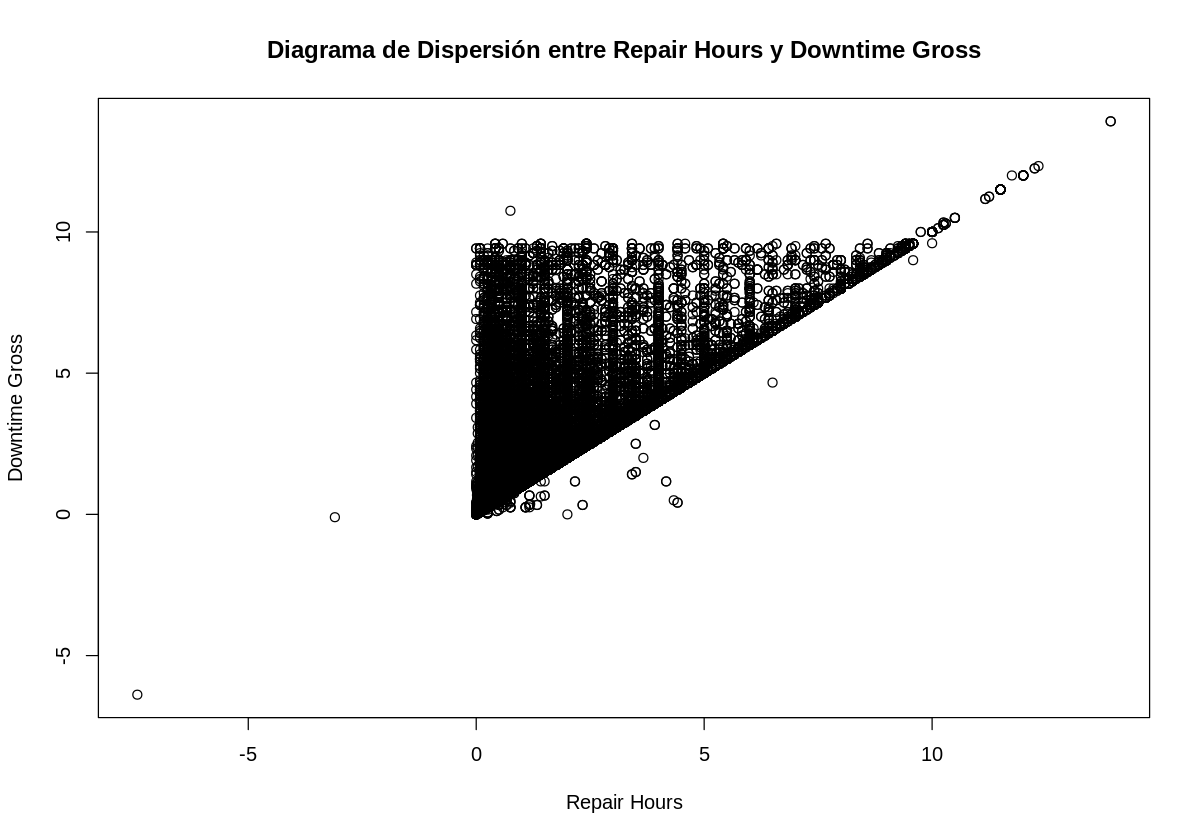

In [149]:
plot(df$repair_hours, df$downtime_gross,
     xlab = "Repair Hours",
     ylab = "Downtime Gross",
     main = "Diagrama de Dispersión entre Repair Hours y Downtime Gross")

In [150]:
model <- lm(downtime_gross ~ repair_hours, data = df)
summary(model)


Call:
lm(formula = downtime_gross ~ repair_hours, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.6511 -0.4780 -0.4630 -0.1409  9.5144 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.451704   0.004047   111.6   <2e-16 ***
repair_hours 1.045155   0.002638   396.2   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.155 on 135858 degrees of freedom
Multiple R-squared:  0.5361,	Adjusted R-squared:  0.5361 
F-statistic: 1.57e+05 on 1 and 135858 DF,  p-value: < 2.2e-16


In [151]:
sapply(df, function(x) sum(is.na(x)))
#Fiabilidad suficiente para continuar con el trabajo

equipment      operation        wo_type     base_model   problem_code 
             0              0              0              0              0 
  problem_desc   failure_code   failure_desc     cause_code     cause_desc 
             0              0              0              0              0 
   action_code    action_desc       mechanic           date downtime_gross 
             0              0              0              0              0 
  pit_coverage  real_downtime     parts_cost   repair_hours  waiting_hours 
             0              0              0              0              0 
   changed_pcs 
             0

In [152]:
# Remover el símbolo de dólar y las comas, y convertir a float
df$parts_cost <- as.numeric(gsub("[\\$,()]", "", df$parts_cost))

In [153]:
# Convertir la columna 'Date' al formato adecuado
df$date <- as.Date(df$date, format="%m/%d/%Y")  # Ajusta el formato según tus datos
# Ordenar el DataFrame por fecha
df <- df %>%
  arrange(date)

In [154]:
mean(df$downtime_gross < 0)

[1] 1.472104e-05

In [155]:
# Filtrar registros donde downtimeGross no sea negativo
df <- df %>%
  filter(downtime_gross >= 0)

In [156]:
mean(df$repair_hours < 0)

[1] 0

In [157]:
#Eliminar columnas que no seran utilizadas
df <- select(df, -problem_code, -failure_code, -cause_code, -action_code, -pit_coverage, -real_downtime, -repair_hours)
#Se han eliminado codigos y variables calculadas

In [158]:
# Calcular la diferencia en días entre fechas consecutivas
df <- df %>%
  group_by(equipment) %>%
  mutate(Days_Between_Failures = difftime(date, lag(date), units = "days"))

# Reemplazar los valores NA en Days_Between_Failures
df$Days_Between_Failures[is.na(df$Days_Between_Failures)] <- as.numeric(difftime(df$date[is.na(df$Days_Between_Failures)], as.Date("2023-01-01"), units = "days"))

In [159]:
# Convertir 'Days_Between_Failures' a numeric
df$Days_Between_Failures <- as.numeric(df$Days_Between_Failures, units = "days")

In [160]:
#Cambio de nombre de mecánico cuyo nombre está escrito de dos formas
df <- df %>%
  mutate(mechanic = ifelse(mechanic == "GALEAS PEREZ EDWIN ROGELIO", "Edwin Rogelio Galeas Perez", mechanic))

In [161]:
# Calcular la tabla de frecuencias de mechanic
freq_mechanic <- table(df$mechanic)

# Ordenar las frecuencias de menor a mayor
freq_sorted_mechanic <- sort(freq_mechanic)

# Calcular la frecuencia relativa acumulada
freq_relative_mechanic <- cumsum(freq_sorted_mechanic) / sum(freq_sorted_mechanic)

# Definir umbral de frecuencia acumulada
umbral <- 0.2

# Identificar categorías con frecuencia relativa acumulada menor que el umbral
categorias_baja_frecuencia_mechanic <- names(freq_sorted_mechanic[freq_relative_mechanic < umbral])

# Reemplazar categorías con baja frecuencia por "Otros"
df$mechanic[df$mechanic %in% categorias_baja_frecuencia_mechanic] <- "Otros"

In [162]:
# Calcular la tabla de frecuencias de problem_desc
freq_problem <- table(df$problem_desc)

# Ordenar las frecuencias de menor a mayor
freq_sorted_problem <- sort(freq_problem)

# Calcular la frecuencia relativa acumulada
freq_relative_problem <- cumsum(freq_sorted_problem) / sum(freq_sorted_problem)

# Definir umbral de frecuencia acumulada
umbral <- 0.2

# Identificar categorías con frecuencia relativa acumulada menor que el umbral
categorias_baja_frecuencia_problem <- names(freq_sorted_problem[freq_relative_problem < umbral])

# Reemplazar categorías con baja frecuencia por "Otros"
df$problem_desc[df$problem_desc %in% categorias_baja_frecuencia_problem] <- "Otros"

In [163]:
# Calcular la tabla de frecuencias de failure_desc
freq_failure <- table(df$failure_desc)

# Ordenar las frecuencias de menor a mayor
freq_sorted_failure <- sort(freq_failure)

# Calcular la frecuencia relativa acumulada
freq_relative_failure <- cumsum(freq_sorted_failure) / sum(freq_sorted_failure)

# Definir umbral de frecuencia acumulada
umbral <- 0.2

# Identificar categorías con frecuencia relativa acumulada menor que el umbral
categorias_baja_frecuencia_failure <- names(freq_sorted_failure[freq_relative_failure < umbral])

# Reemplazar categorías con baja frecuencia por "Otros"
df$failure_desc[df$failure_desc %in% categorias_baja_frecuencia_failure] <- "Otros"

In [164]:
#Convertir horas a minutos
df$downtime_gross <-df$downtime_gross*60

In [165]:
write.csv(df,"arhivo2.csv")

# **ANALISIS DE VARIABLES**

In [166]:
dim(df)

[1] 135858     15

**Variable "Operación"**

In [167]:
# Calcular la frecuencia de cada operación
operation_freq <- df %>%
  group_by(operation) %>%
  summarise(count = n()) %>%
  arrange(desc(count))

# Calcular la frecuencia relativa
operation_freq <- operation_freq %>%
  mutate(relative_freq = count / sum(count))

operation_freq

operation,count,relative_freq
<chr>,<int>,<dbl>
HEM SLEEVE,38311,0.281992963
HEM BOTTOM,15840,0.116592324
JOIN PANEL,7799,0.057405526
SET SLEEVE,7743,0.056993331
TAPE SHOULDER,7556,0.055616894
HEM AROUND,5256,0.038687453
FLAT SEAM,4987,0.036707445
JOIN SHOULDER,4857,0.035750563
ATTACH ELASTIC,4704,0.034624387


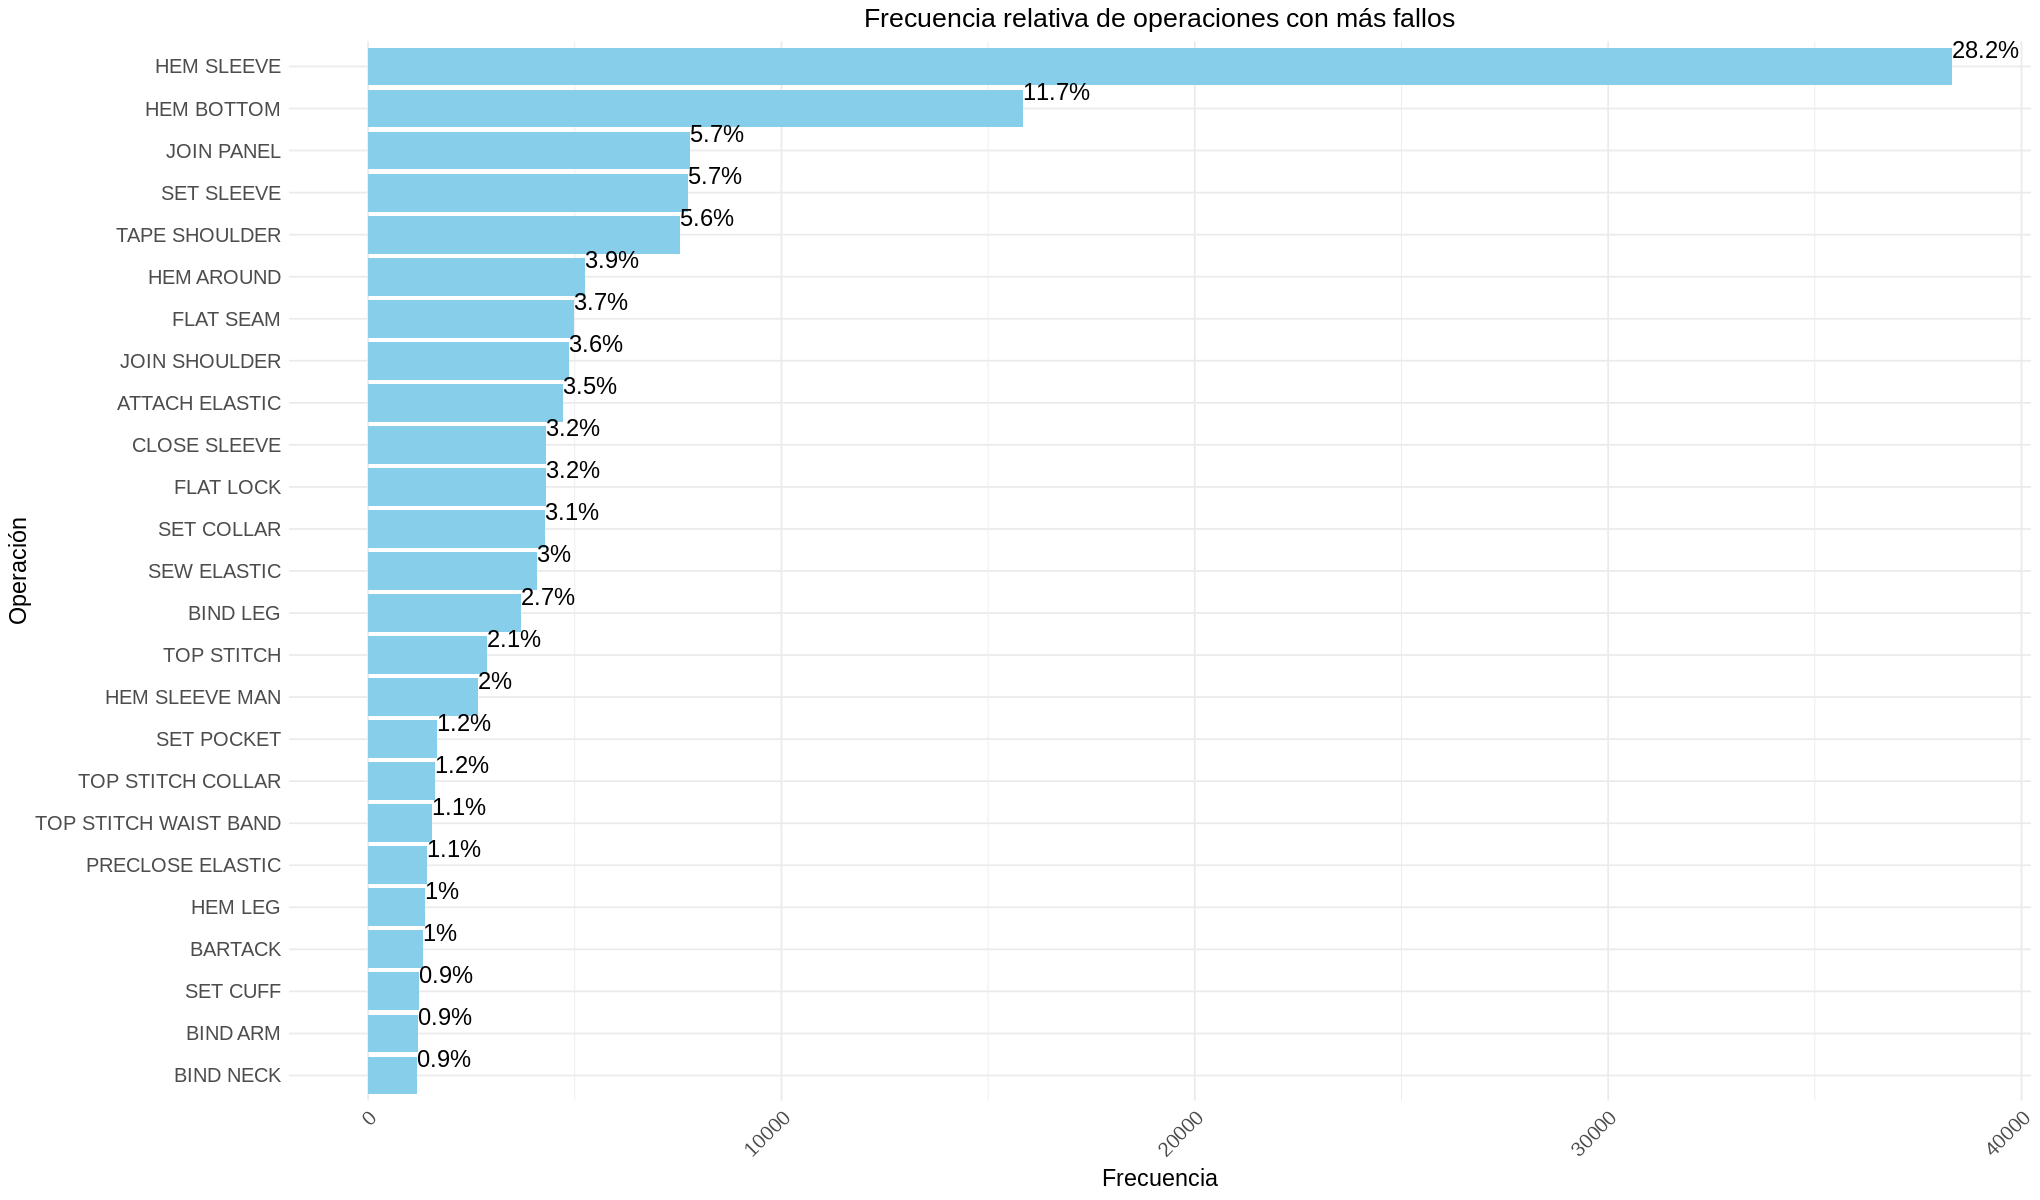

In [168]:
# Ordenar los datos por frecuencia descendente
operation_freq <- operation_freq %>%
  arrange(desc(count))

options(repr.plot.width=17, repr.plot.height=10)

ggplot(operation_freq, aes(y = reorder(operation, count), x = count)) +
  geom_bar(stat = "identity", fill = 'skyblue') +
  geom_text(aes(label = paste0(round(relative_freq * 100, 1), "%")), vjust = -0.5, hjust = 0, size = 5) +
  labs(title = "Frecuencia relativa de operaciones con más fallos",
       y = "Operación",
       x = "Frecuencia") +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, size = 12), # Cambia el tamaño del texto del eje x
    axis.text.y = element_text(size = 12),                         # Cambia el tamaño del texto del eje y
    axis.title.x = element_text(size = 14),                        # Cambia el tamaño del título del eje x
    axis.title.y = element_text(size = 14),                        # Cambia el tamaño del título del eje y
    plot.title = element_text(size = 16, hjust = 0.5)              # Cambia el tamaño del título del gráfico y lo centra
  )

In [169]:
operation_freq <- operation_freq %>%
  mutate(failure_percentage = (count / sum(count)) * 100)

In [170]:
operation_freq <- operation_freq %>%
  mutate(failure_group = cut(failure_percentage,
                             breaks = c(-Inf, 1, 2, 3, 5, Inf),
                             labels = c("Menos del 1%", "1%-2%", "2%-3%", "3%-5%", "Más del 5%")))

In [171]:
operation_freq

operation,count,relative_freq,failure_percentage,failure_group
<chr>,<int>,<dbl>,<dbl>,<fct>
HEM SLEEVE,38311,0.281992963,28.1992963,Más del 5%
HEM BOTTOM,15840,0.116592324,11.6592324,Más del 5%
JOIN PANEL,7799,0.057405526,5.7405526,Más del 5%
SET SLEEVE,7743,0.056993331,5.6993331,Más del 5%
TAPE SHOULDER,7556,0.055616894,5.5616894,Más del 5%
HEM AROUND,5256,0.038687453,3.8687453,3%-5%
FLAT SEAM,4987,0.036707445,3.6707445,3%-5%
JOIN SHOULDER,4857,0.035750563,3.5750563,3%-5%
ATTACH ELASTIC,4704,0.034624387,3.4624387,3%-5%


**Variable "problem_desc"**

In [172]:
# Calcular la frecuencia de problemas de maquinaria
problem_freq <- df %>%
  group_by(problem_desc) %>%
  summarise(count = n()) %>%
  arrange(desc(count))

# Calcular la frecuencia relativa
problem_freq <- problem_freq %>%
  mutate(relative_freq = count / sum(count))

problem_freq

problem_desc,count,relative_freq
<chr>,<int>,<dbl>
It sews with defect / Cose con defecto,95025,0.69944354
It does not sew / No cose,31928,0.23501008
Otros,8905,0.06554638


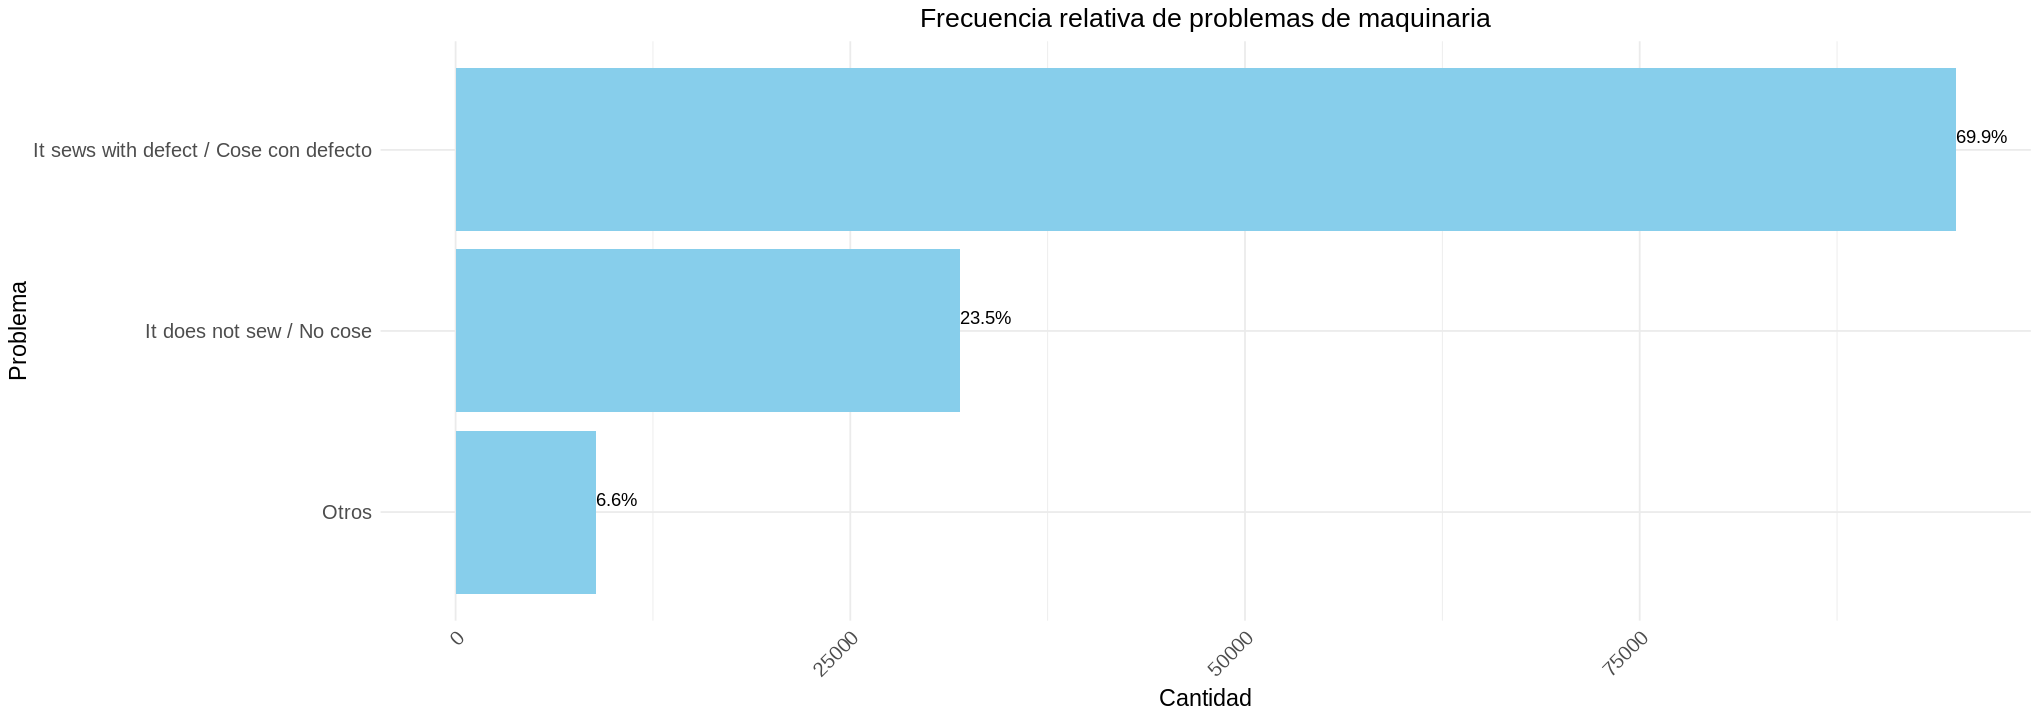

In [173]:
# Ordenar los datos por frecuencia descendente
problem_freq <- problem_freq %>%
  arrange(desc(count))

options(repr.plot.width=17, repr.plot.height=6)

ggplot(problem_freq, aes(y = reorder(problem_desc, count), x = count)) +
  geom_bar(stat = "identity", fill = 'skyblue') +
  geom_text(aes(label = paste0(round(relative_freq * 100, 1), "%")), vjust = -0.5, hjust = 0) +
  labs(title = "Frecuencia relativa de problemas de maquinaria",
       y = "Problema",
       x = "Cantidad") +
  theme_minimal() +
   theme(
    axis.text.x = element_text(angle = 45, hjust = 1, size = 12), # Cambia el tamaño del texto del eje x
    axis.text.y = element_text(size = 12),                         # Cambia el tamaño del texto del eje y
    axis.title.x = element_text(size = 14),                        # Cambia el tamaño del título del eje x
    axis.title.y = element_text(size = 14),                        # Cambia el tamaño del título del eje y
    plot.title = element_text(size = 16, hjust = 0.5)              # Cambia el tamaño del título del gráfico y lo centra
  )

**Variable "failure_desc"**

In [174]:
# Calcular la frecuencia de fallos de maquinaria
failure_freq <- df %>%
  group_by(failure_desc) %>%
  summarise(count = n()) %>%
  arrange(desc(count))

# Calcular la frecuencia relativa
failure_freq <- failure_freq %>%
  mutate(relative_freq = count / sum(count))

failure_freq

failure_desc,count,relative_freq
<chr>,<int>,<dbl>
Machine head failure stopping sewing / Falla cabezal dejando de coser,64019,0.4712200
Machine head failure sewing with defect / Falla cabezal cosiendo con defecto,36833,0.2711140
Otros,21302,0.1567961
Trim off device failure / Falla dispositivo corta desperdicio,13704,0.1008700


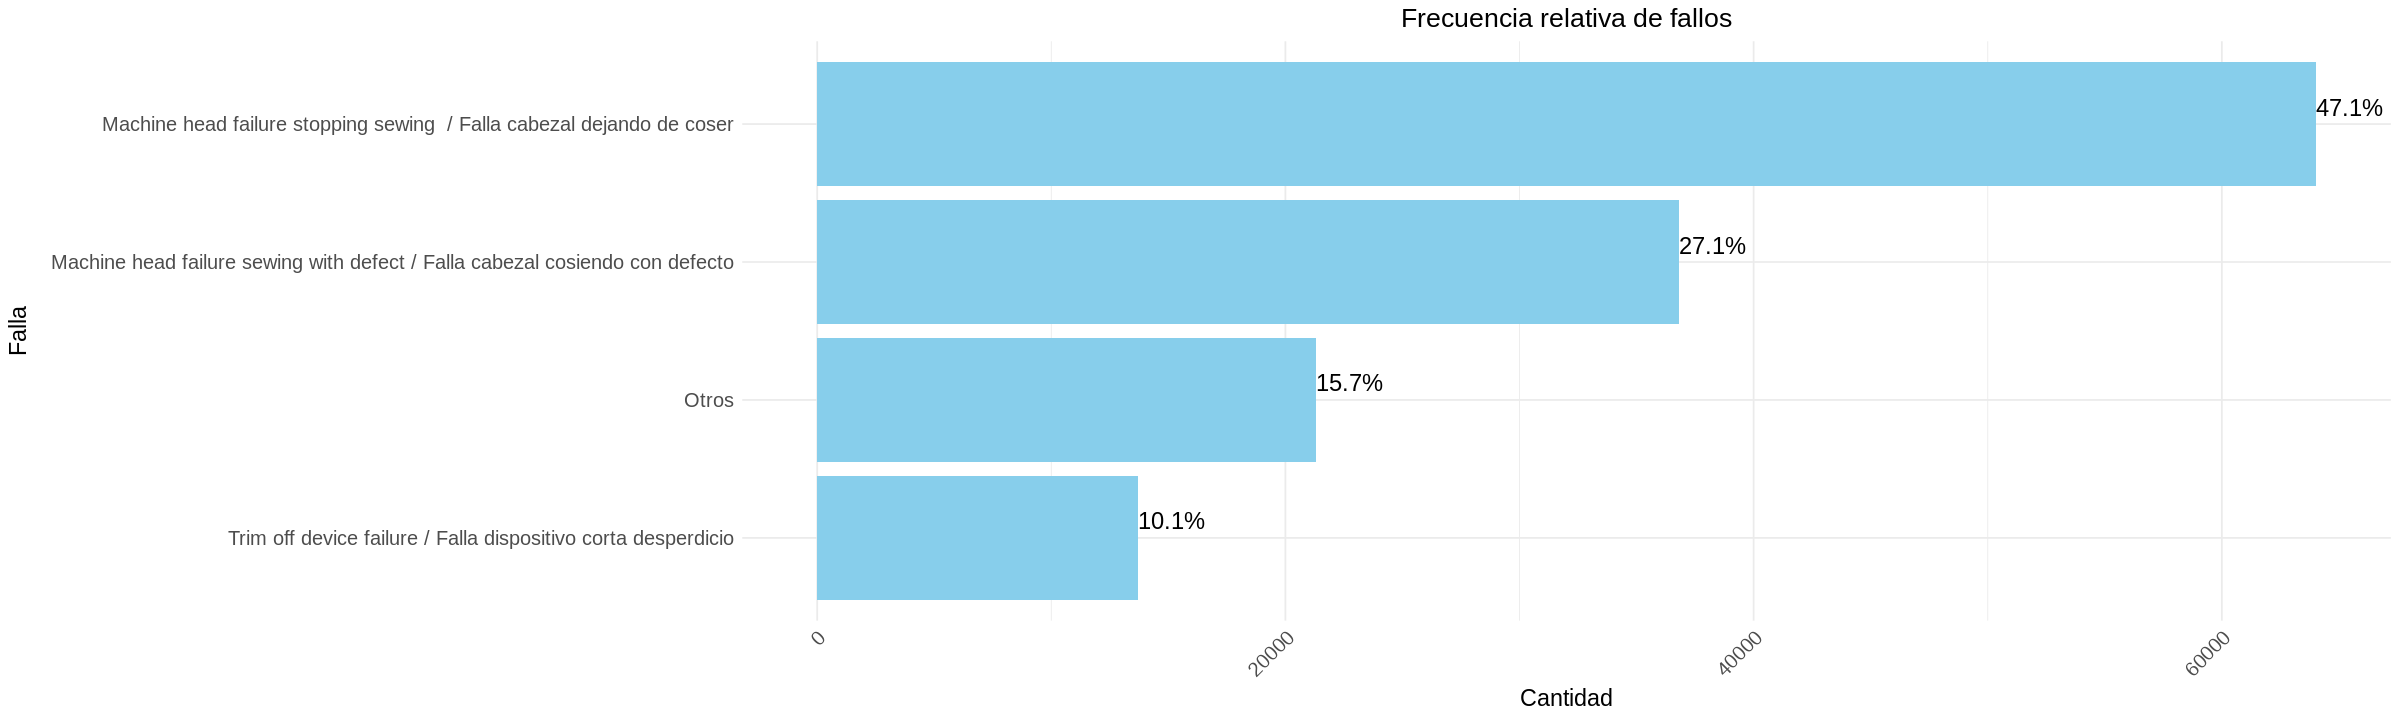

In [175]:
# Ordenar los datos por frecuencia descendente
failure_freq <- failure_freq %>%
  arrange(desc(count))

options(repr.plot.width=20, repr.plot.height=6)

ggplot(failure_freq, aes(y = reorder(failure_desc, count), x = count)) +
  geom_bar(stat = "identity", fill = 'skyblue') +
  geom_text(aes(label = paste0(round(relative_freq * 100, 1), "%")), vjust = -0.5, hjust = 0, size = 5) +  # Etiquetas de porcentaje acumulado
  labs(title = "Frecuencia relativa de fallos",
       y = "Falla",
       x = "Cantidad") +
  theme_minimal() +
   theme(
    axis.text.x = element_text(angle = 45, hjust = 1, size = 12), # Cambia el tamaño del texto del eje x
    axis.text.y = element_text(size = 12),                         # Cambia el tamaño del texto del eje y
    axis.title.x = element_text(size = 14),                        # Cambia el tamaño del título del eje x
    axis.title.y = element_text(size = 14),                        # Cambia el tamaño del título del eje y
    plot.title = element_text(size = 16, hjust = 0.5)              # Cambia el tamaño del título del gráfico y lo centra
  )

**Variable "cause_desc"**

In [176]:
# Calcular la frecuencia de causas de fallo
cause_freq <- df %>%
  group_by(cause_desc) %>%
  summarise(count = n()) %>%
  arrange(desc(count))

# Calcular la frecuencia relativa
cause_freq <- cause_freq %>%
  mutate(relative_freq = count / sum(count))

cause_freq

cause_desc,count,relative_freq
<chr>,<int>,<dbl>
Misadjusted machine head looper / Enlazador de cabezal desajustado,51007,0.375443478
Damaged trim off system knife / Cuchilla de corta desperdicio en mal estado,12994,0.095643981
Misadjusted machine head needle guard / Guarda aguja de cabezal desajustada,11344,0.083498947
Broken machine head ball joint / Rotura de biela de cabezal,8785,0.064663104
Misadjusted machine head presser foot / Prensatela de cabezal desajustado,6193,0.045584360
Misadjusted machine head teeth / Dientes de cabezal desajustados,5733,0.042198472
Misadjusted machine head chopper / Cuchilla de cabezal desajustada,5387,0.039651695
Misadjusted machine head needle bar / Barra de aguja de cabezal desajustada,4551,0.033498211
Oil leak in machine head / Fuga de aceite lubricante en cabezal,3194,0.023509841


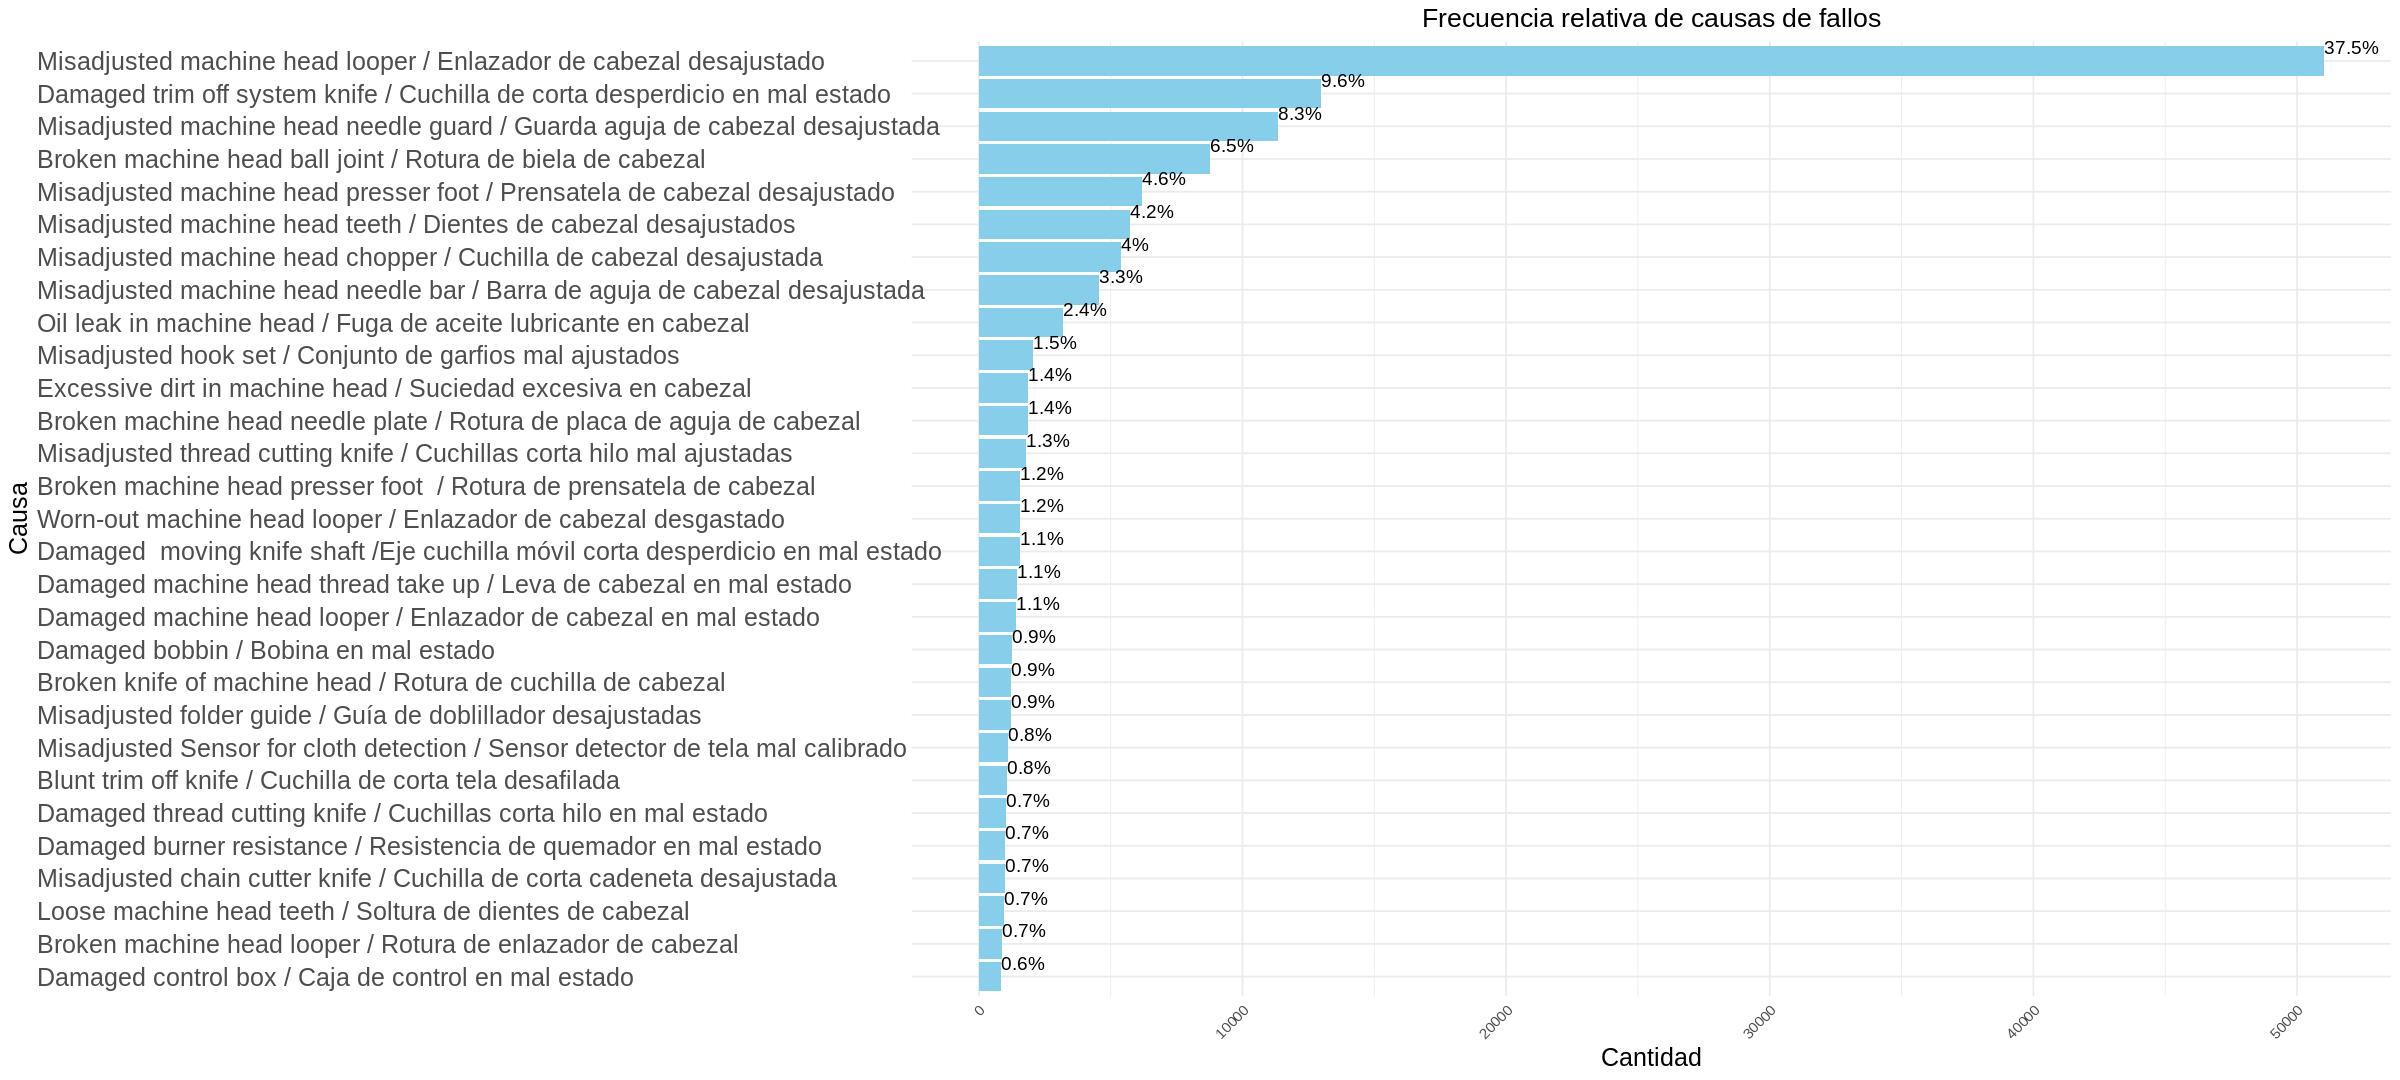

In [177]:
# Ordenar los datos por frecuencia descendente
cause_freq <- cause_freq %>%
  arrange(desc(count))

options(repr.plot.width=20, repr.plot.height=9)

ggplot(cause_freq, aes(y = reorder(cause_desc, count), x = count)) +
  geom_bar(stat = "identity", fill = 'skyblue') +
  geom_text(aes(label = paste0(round(relative_freq * 100, 1), "%")), vjust = -0.5, hjust = 0,  size = 4) +  # Etiquetas de porcentaje acumulado
  labs(title = "Frecuencia relativa de causas de fallos",
       y = "Causa",
       x = "Cantidad") +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    axis.text.y = element_text(size = 15, hjust = 0),
    axis.title.x = element_text(size = 15),
    axis.title.y = element_text(size = 15),
    plot.title = element_text(size = 16, hjust = 0.5)
  )

In [178]:
# Asignar grupos de frecuencia
cause_freq <- cause_freq %>%
  mutate(failure_group = case_when(
    relative_freq > 0.05 ~ "Más del 5%",
    relative_freq > 0.03 ~ "3%-5%",
    relative_freq > 0.02 ~ "2%-3%",
    relative_freq > 0.01 ~ "1%-2%",
    TRUE ~ "Menos del 1%"
  ))

# Ordenar los datos por frecuencia descendente
cause_freq <- cause_freq %>%
  arrange(desc(count))
cause_freq

cause_desc,count,relative_freq,failure_group
<chr>,<int>,<dbl>,<chr>
Misadjusted machine head looper / Enlazador de cabezal desajustado,51007,0.375443478,Más del 5%
Damaged trim off system knife / Cuchilla de corta desperdicio en mal estado,12994,0.095643981,Más del 5%
Misadjusted machine head needle guard / Guarda aguja de cabezal desajustada,11344,0.083498947,Más del 5%
Broken machine head ball joint / Rotura de biela de cabezal,8785,0.064663104,Más del 5%
Misadjusted machine head presser foot / Prensatela de cabezal desajustado,6193,0.045584360,3%-5%
Misadjusted machine head teeth / Dientes de cabezal desajustados,5733,0.042198472,3%-5%
Misadjusted machine head chopper / Cuchilla de cabezal desajustada,5387,0.039651695,3%-5%
Misadjusted machine head needle bar / Barra de aguja de cabezal desajustada,4551,0.033498211,3%-5%
Oil leak in machine head / Fuga de aceite lubricante en cabezal,3194,0.023509841,2%-3%


**Variable "action_desc"**

In [179]:
# Calcular la frecuencia de acciones correctivas
action_freq <- df %>%
  group_by(action_desc) %>%
  summarise(count = n()) %>%
  arrange(desc(count))

# Calcular la frecuencia relativa
action_freq <- action_freq %>%
  mutate(relative_freq = count / sum(count))

action_freq

action_desc,count,relative_freq
<chr>,<int>,<dbl>
Adjust machine head looper / Ajustar enlazador de cabezal,44919,0.330631983
Adjust machine head needle guard / Ajustar guarda aguja de cabezal,11409,0.083977388
Adjust machine head teeth / Ajustar dientes de cabezal,9699,0.071390717
Sharpen knife / Afilar cuchillas,9087,0.066886013
Replace machine head ball joint / Reemplazar biela de cabezal,8825,0.064957529
Replace machine head looper / Reemplazar enlazador de cabezal,7719,0.056816676
Adjusted machine head presser foot / Ajustar prensatela de cabezal,6842,0.050361407
Replace trim off knife / Reemplazar cuchilla de corta desperdicio,6205,0.045672688
Adjust machine head knife / Ajustar cuchilla de cabezal,4188,0.030826304


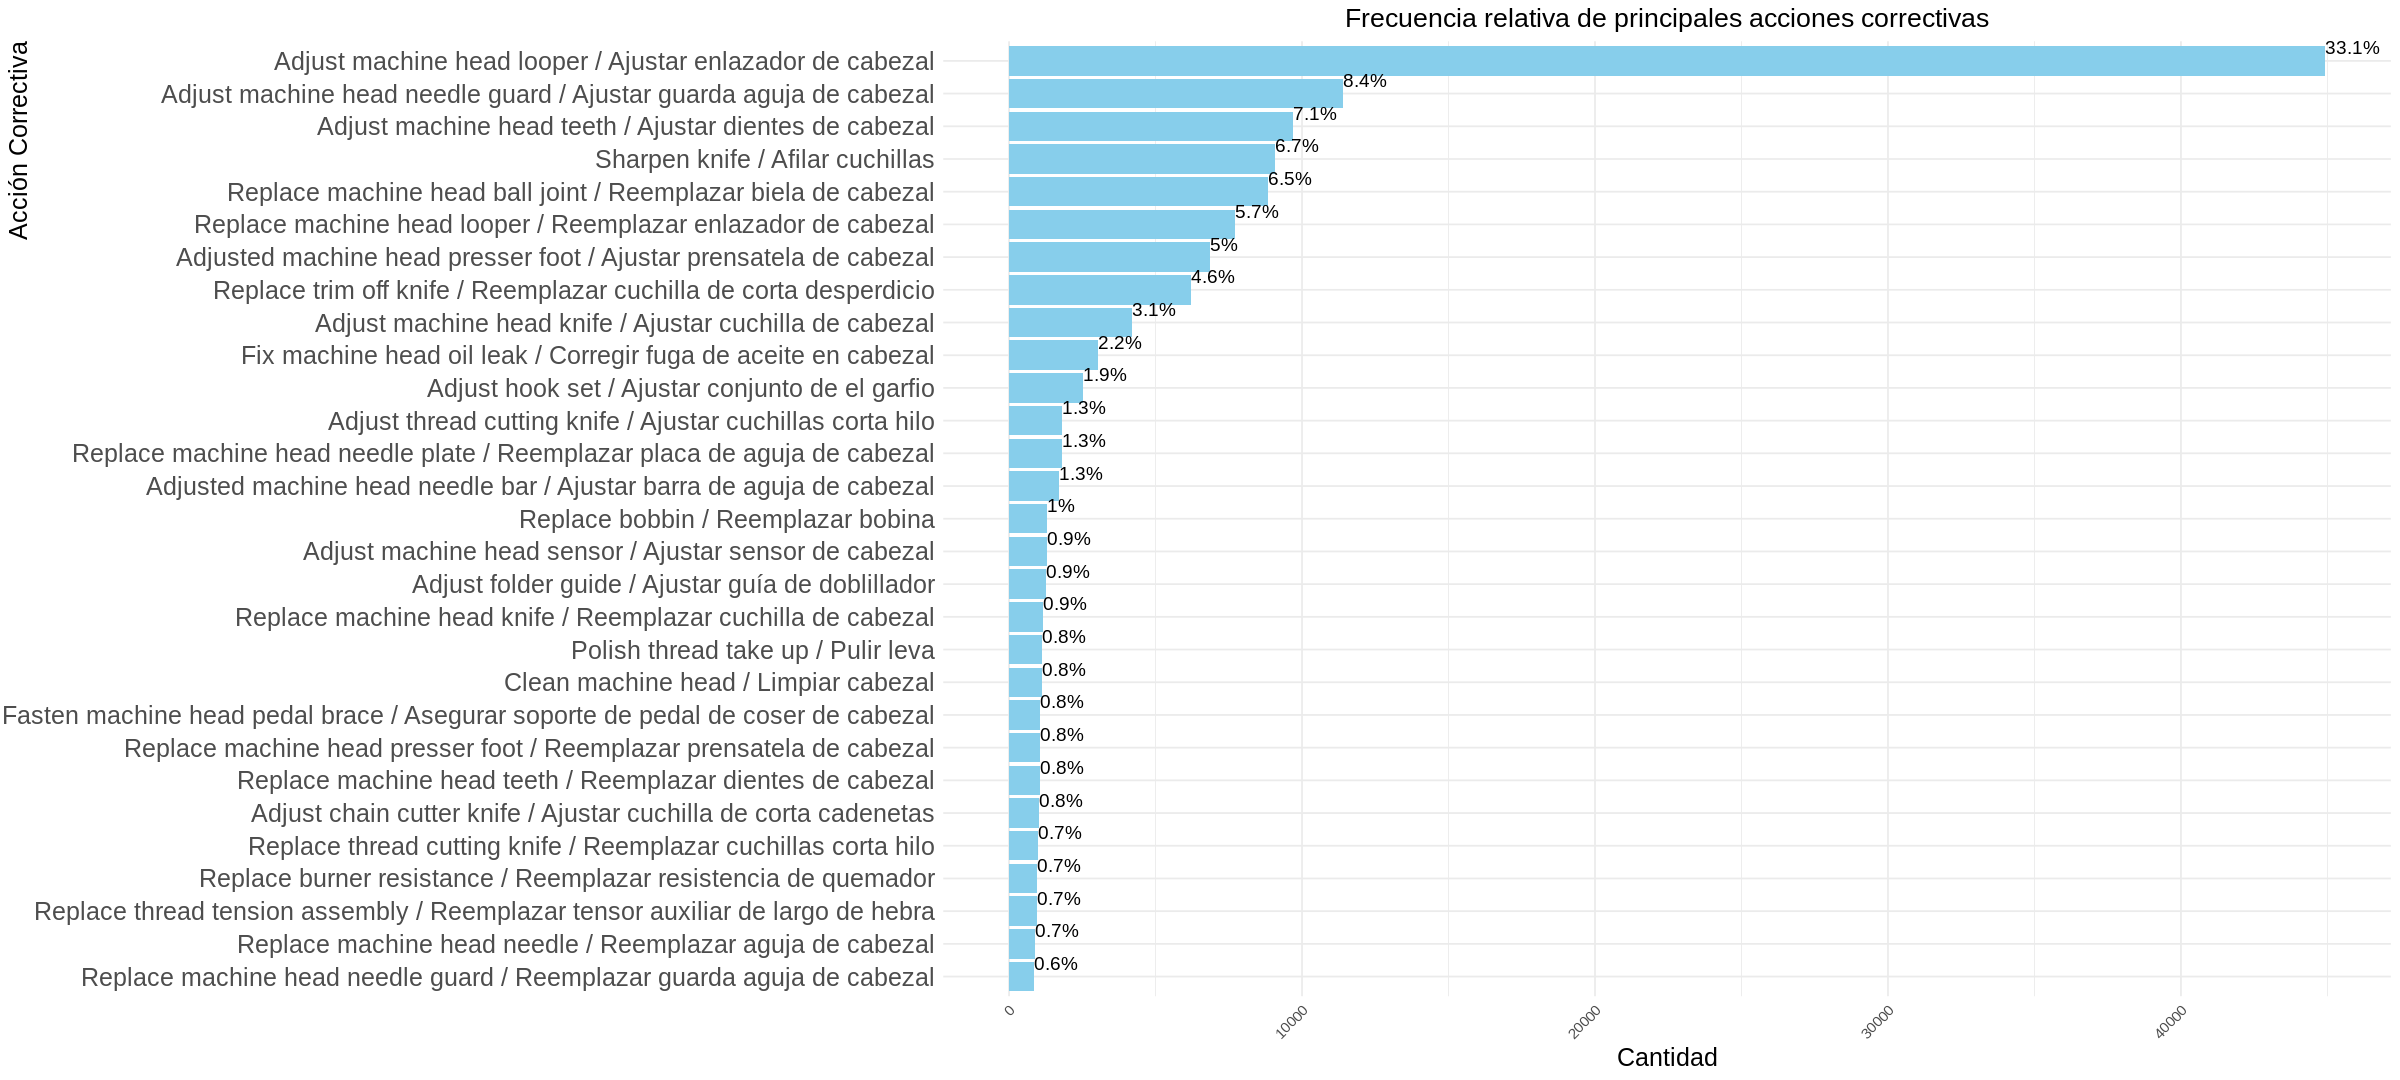

In [180]:
# Ordenar los datos por frecuencia descendente
action_freq <- action_freq %>%
  arrange(desc(count))

options(repr.plot.width=20, repr.plot.height=9)

ggplot(action_freq, aes(y = reorder(action_desc, count), x = count)) +
  geom_bar(stat = "identity", fill = 'skyblue') +
  geom_text(aes(label = paste0(round(relative_freq * 100, 1), "%")),
            vjust = -0.5, hjust = 0, size = 4) +  # Ajuste del tamaño del texto
  labs(title = "Frecuencia relativa de principales acciones correctivas",
       y = "Acción Correctiva",
       x = "Cantidad") +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    axis.text.y = element_text(size = 15),
    axis.title.x = element_text(size = 15),
    axis.title.y = element_text(size = 15, hjust = 1),
    plot.title = element_text(size = 16, hjust = 0.5)
  )

**Variable "parts cost"**

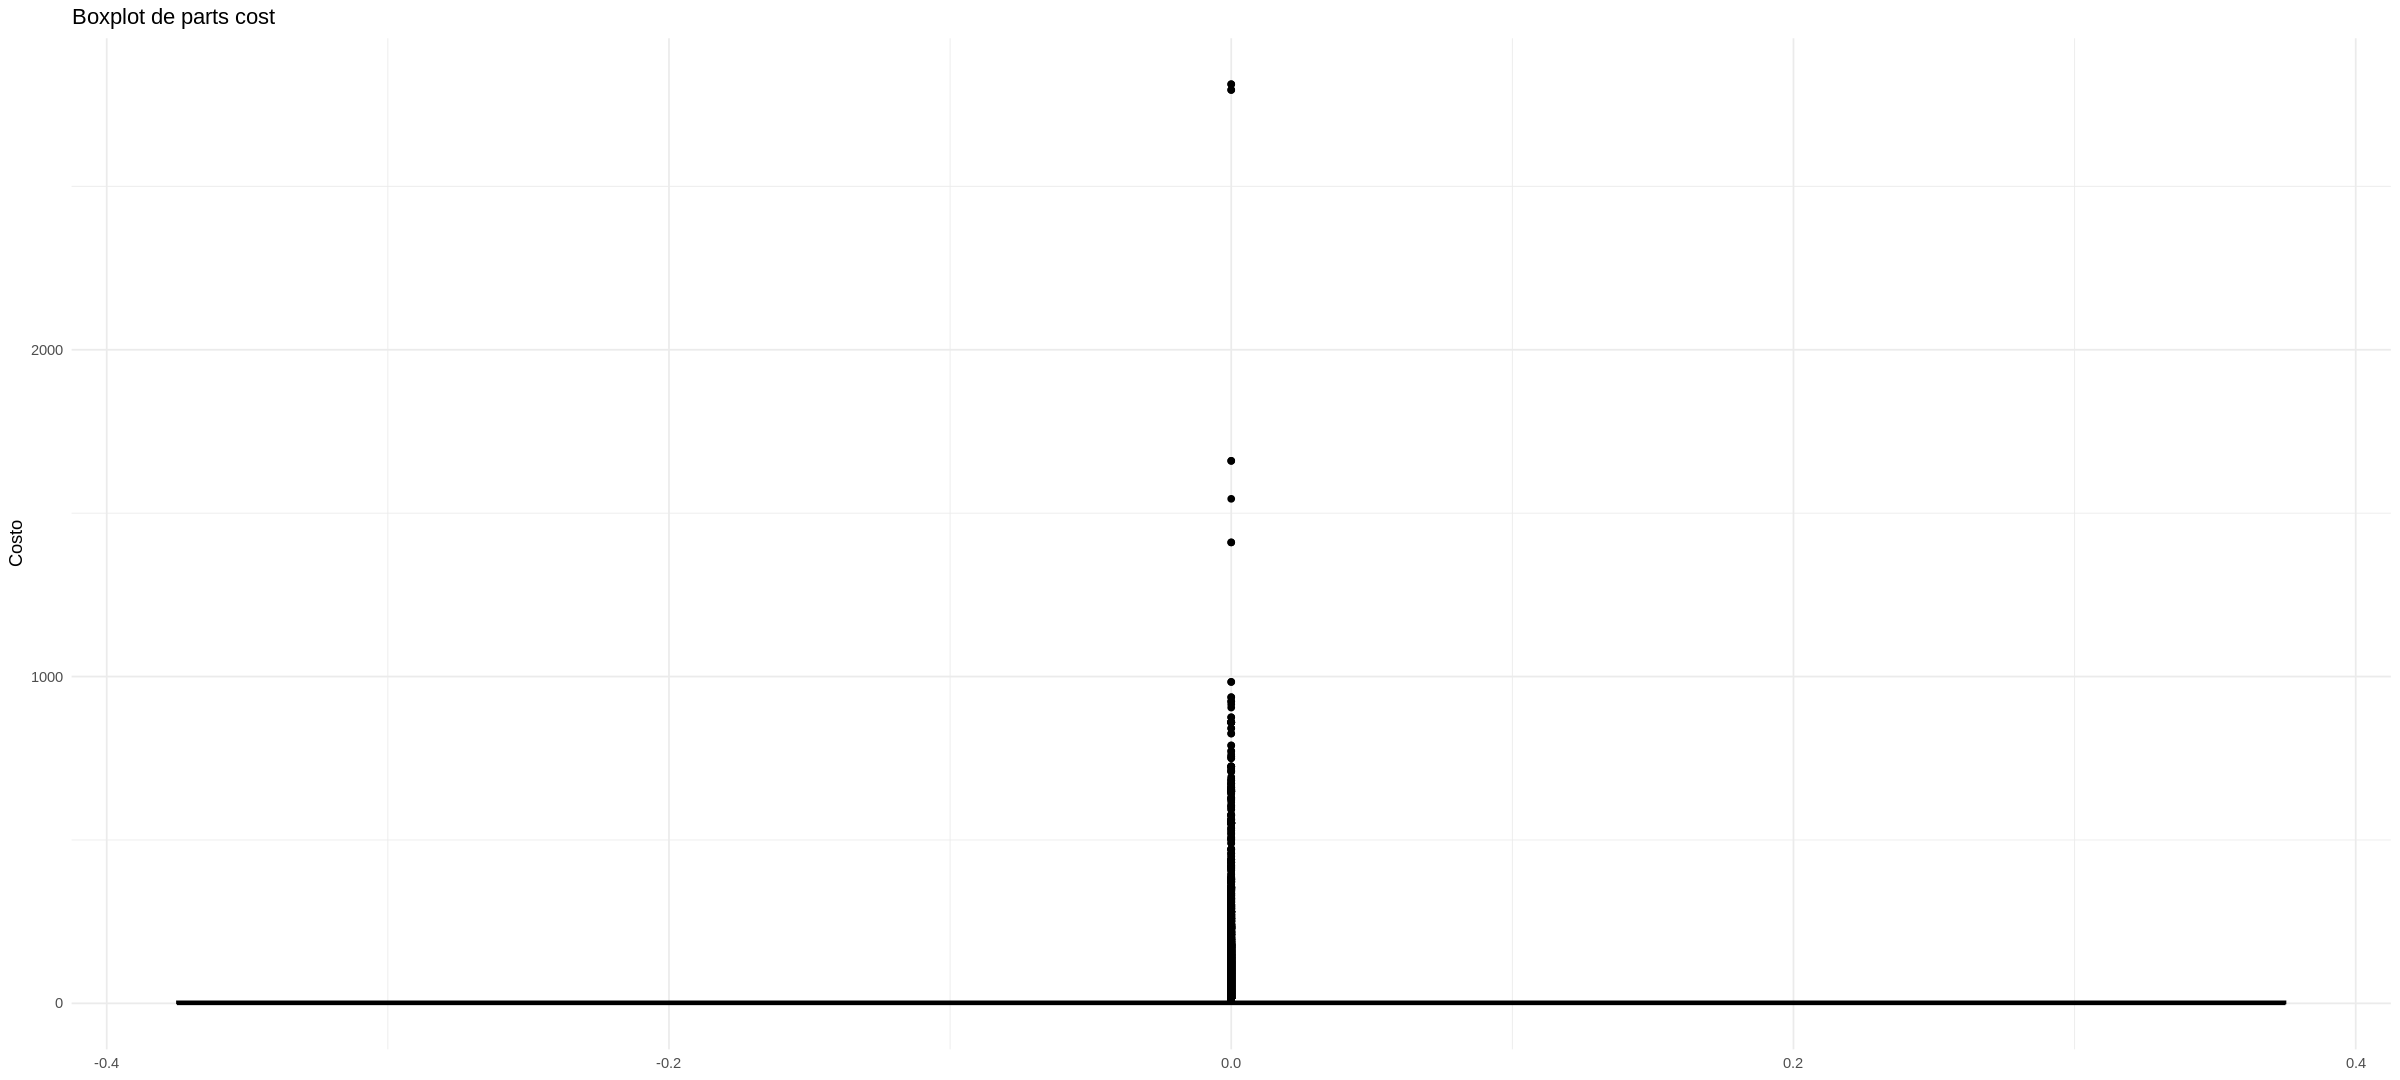

In [181]:
# Crear el boxplot de costo de partes
ggplot(df, aes(y = parts_cost)) +
  geom_boxplot(fill = 'skyblue', color = 'black') +
  labs(title = 'Boxplot de parts cost',
       y = 'Costo') +
  theme_minimal()

Warning message:
“Removed 2344 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


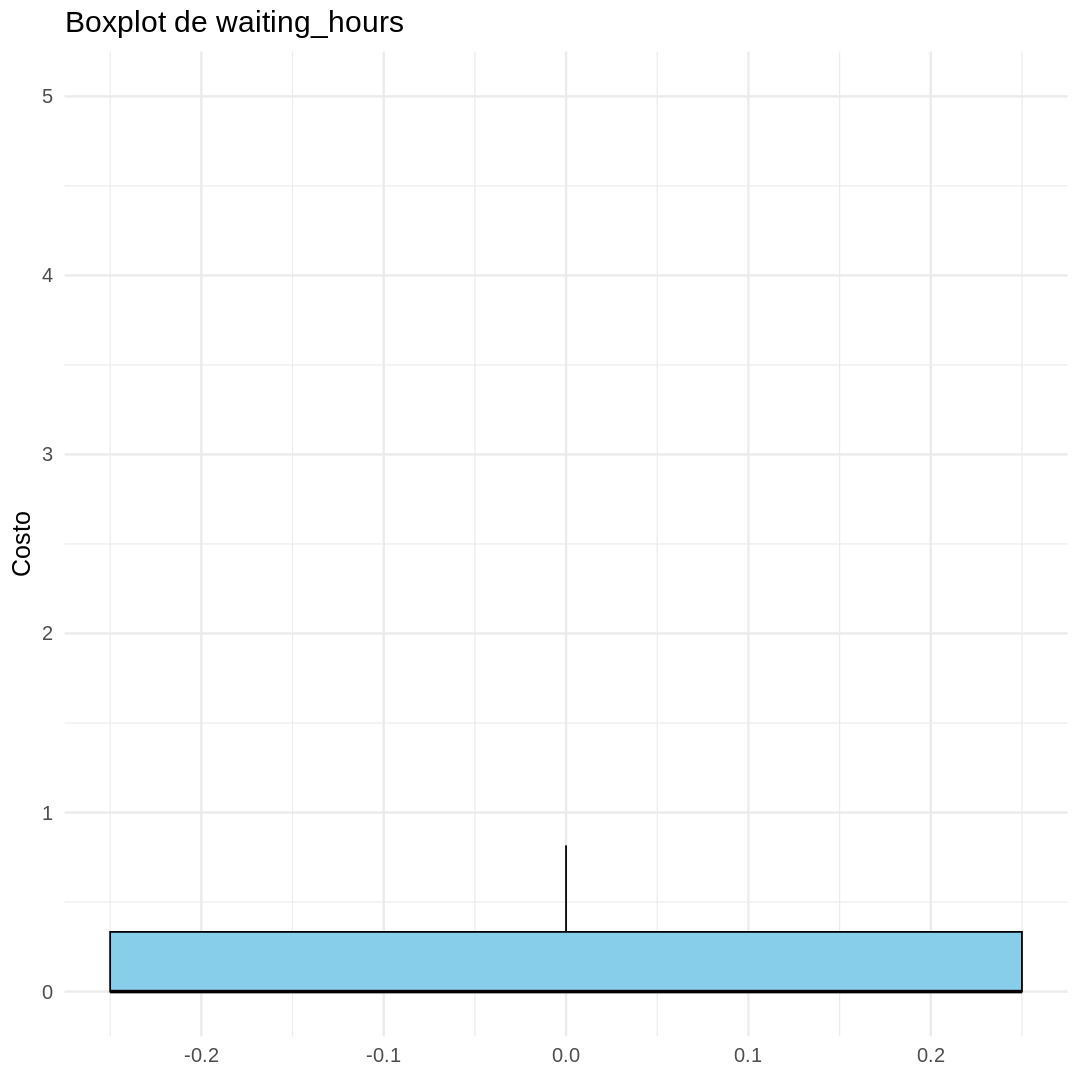

In [205]:
ggplot(df, aes(y = waiting_hours)) +
  geom_boxplot(fill = 'skyblue', color = 'black', outlier.shape = NA, width = 0.5) +
  labs(title = 'Boxplot de waiting_hours',
       y = 'Costo') +
  theme_minimal(base_size = 15) +
  ylim(0, 5)

In [183]:
mean(df$parts_cost, na.rm = TRUE)      # Media
median(df$parts_cost, na.rm = TRUE)    # Mediana
sd(df$parts_cost, na.rm = TRUE)        # Desviación estándar
var(df$parts_cost, na.rm = TRUE)        # Varianza
range(df$parts_cost, na.rm = TRUE)      # Rango

[1] 12.11324

[1] 0

[1] 41.73935

[1] 1742.173

[1]    0.00 2812.49

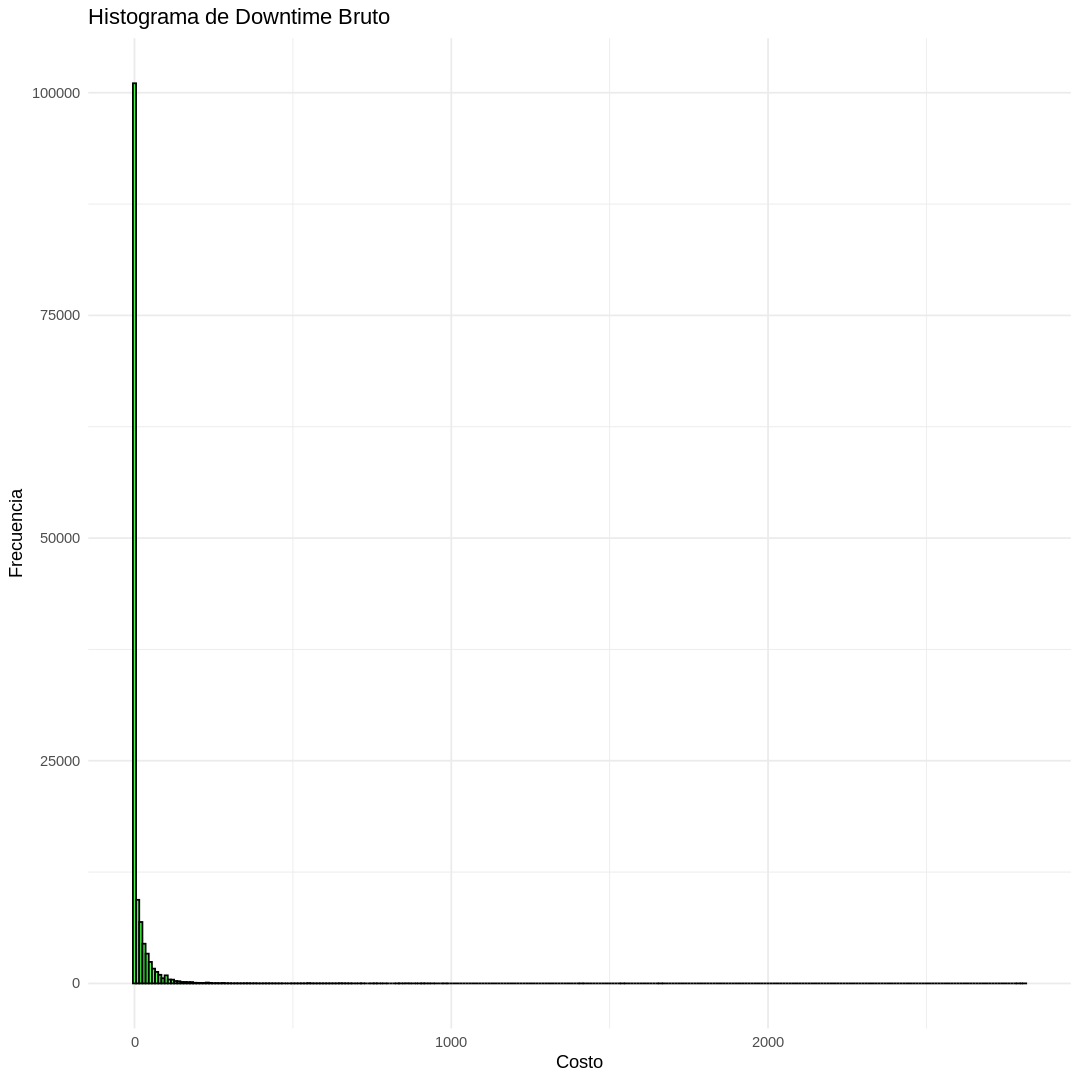

In [184]:
# Histograma de 'parts cost'
options(repr.plot.width=9, repr.plot.height=9)

hist_parts <- ggplot(df, aes(x = parts_cost)) +
  geom_histogram(binwidth = 10, fill = "green", color = "black", alpha = 0.7) +
  labs(title = "Histograma de Downtime Bruto",
       x = "Costo",
       y = "Frecuencia") +
  theme_minimal()

# Mostrar histogramas
print(hist_parts)

**Variable waiting_hours**

Warning message:
“Removed 2344 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


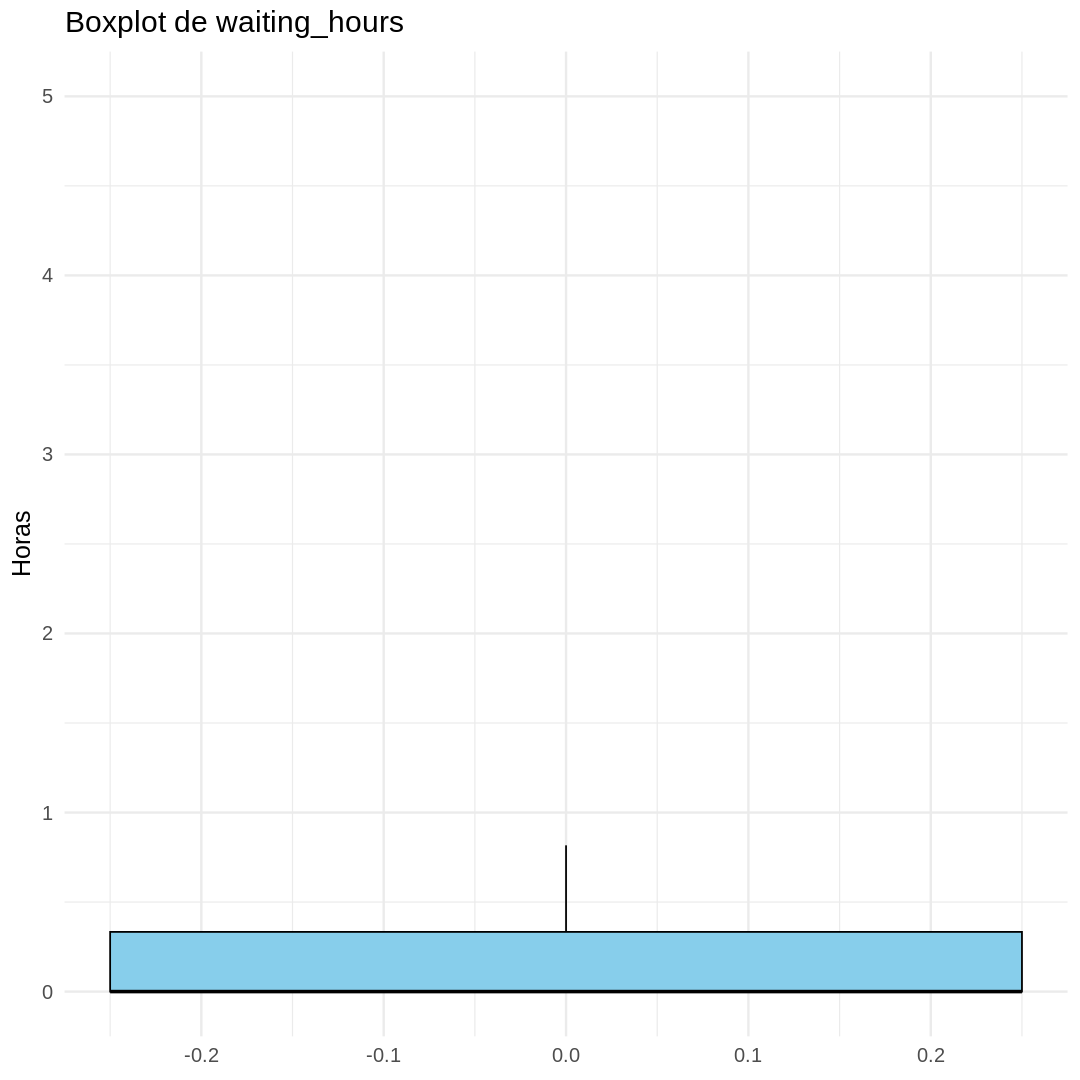

In [201]:
ggplot(df, aes(y = waiting_hours)) +
  geom_boxplot(fill = 'skyblue', color = 'black', outlier.shape = NA, width = 0.5) +
  labs(title = 'Boxplot de waiting_hours',
       y = 'Horas') +
  theme_minimal(base_size = 15) +
  ylim(0, 5)

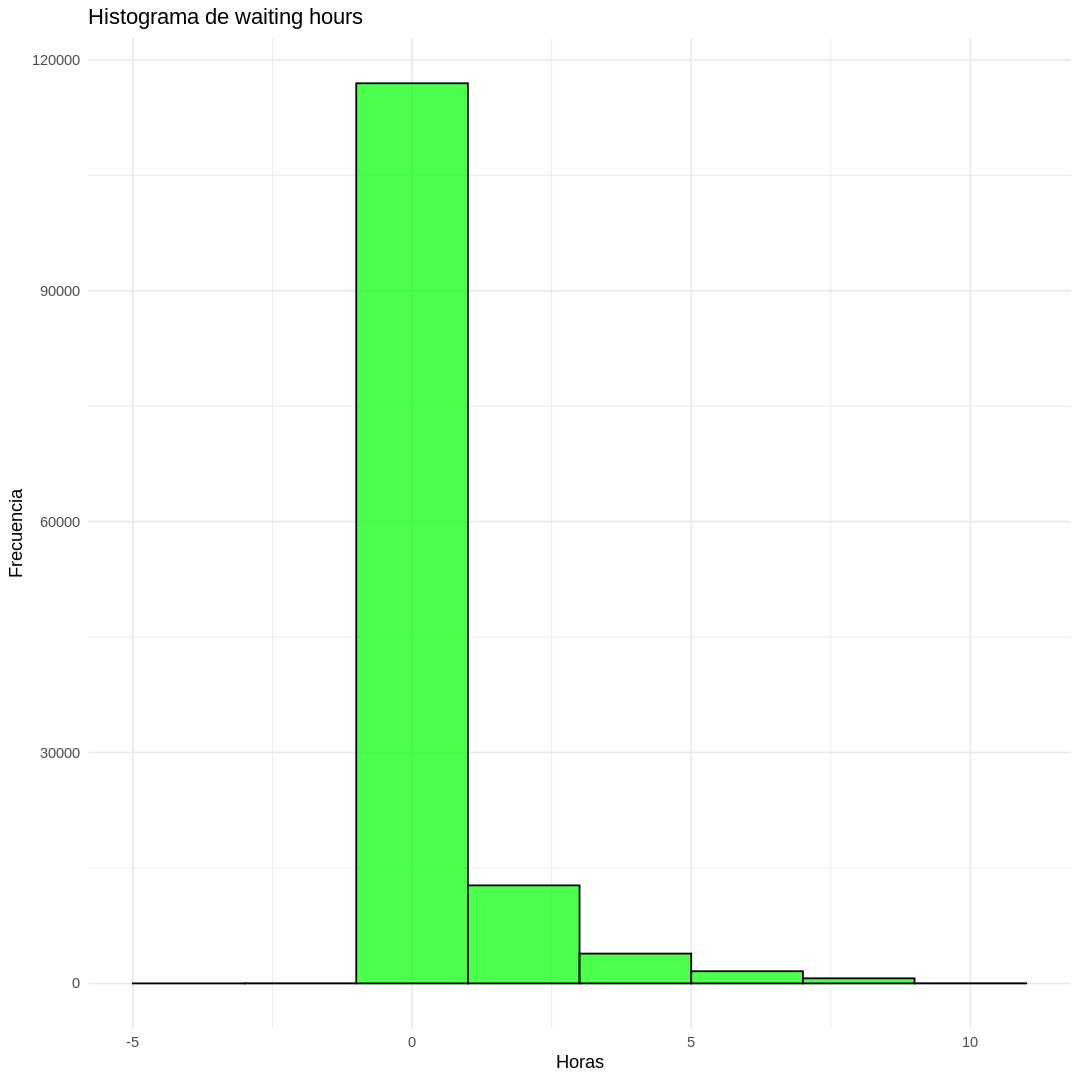

In [197]:
# Histograma de 'parts cost'
options(repr.plot.width=9, repr.plot.height=9)

hist_wait <- ggplot(df, aes(x = waiting_hours)) +
  geom_histogram(binwidth = 2, fill = "green", color = "black", alpha = 0.7) +
  labs(title = "Histograma de waiting hours",
       x = "Horas",
       y = "Frecuencia") +
  theme_minimal()

# Mostrar histogramas
print(hist_wait)

# **ANALISIS DE VARIABLE OBJETIVO "DOWNTIME GROSS"**

In [186]:
summary(df$downtime_gross)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   25.00   50.00   87.97  110.00  835.00 

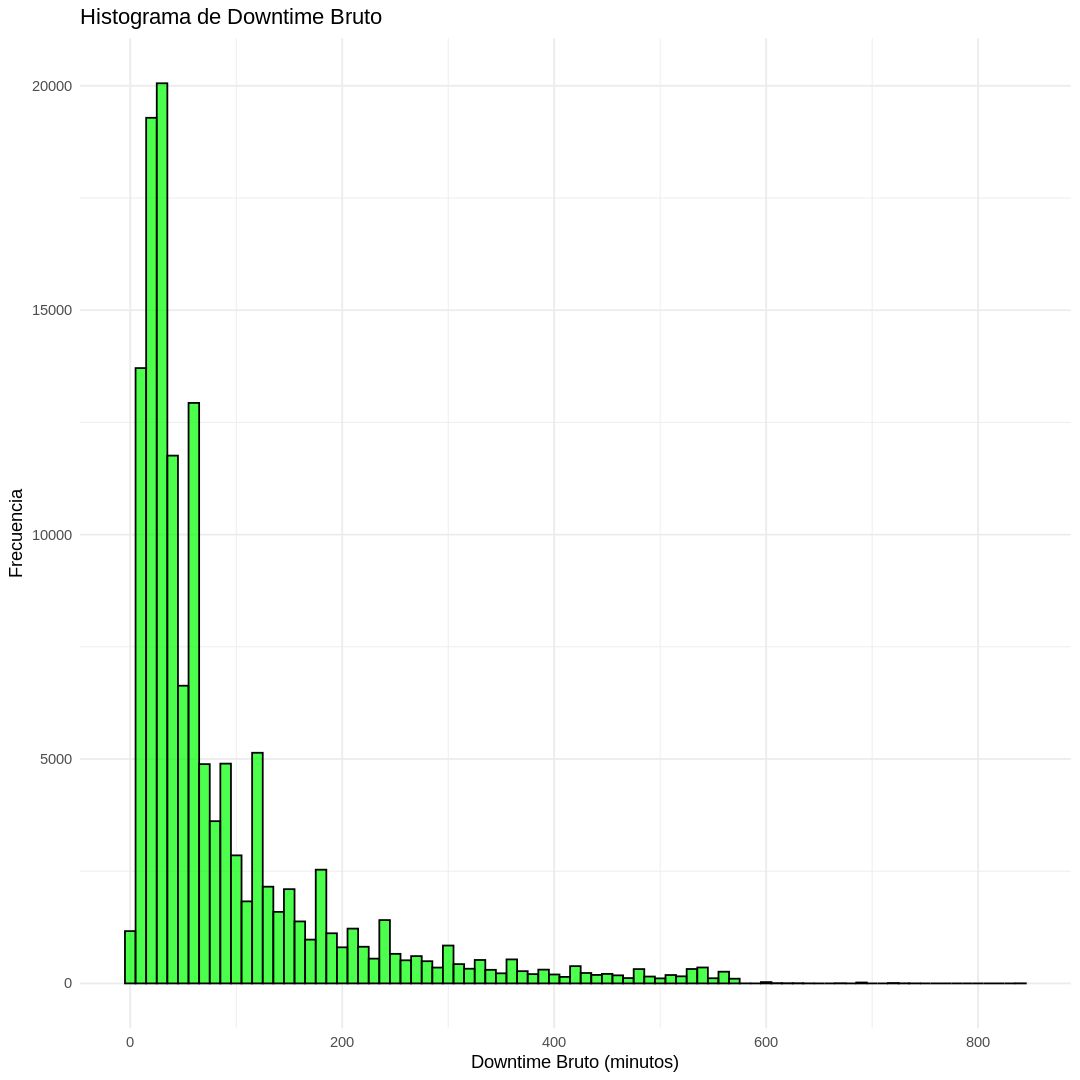

In [187]:
# Histograma de 'downtimeGross'
hist_downtimeGross <- ggplot(df, aes(x = downtime_gross)) +
  geom_histogram(binwidth = 10, fill = "green", color = "black", alpha = 0.7) +
  labs(title = "Histograma de Downtime Bruto",
       x = "Downtime Bruto (minutos)",
       y = "Frecuencia") +
  theme_minimal()

# Mostrar histogramas
print(hist_downtimeGross)

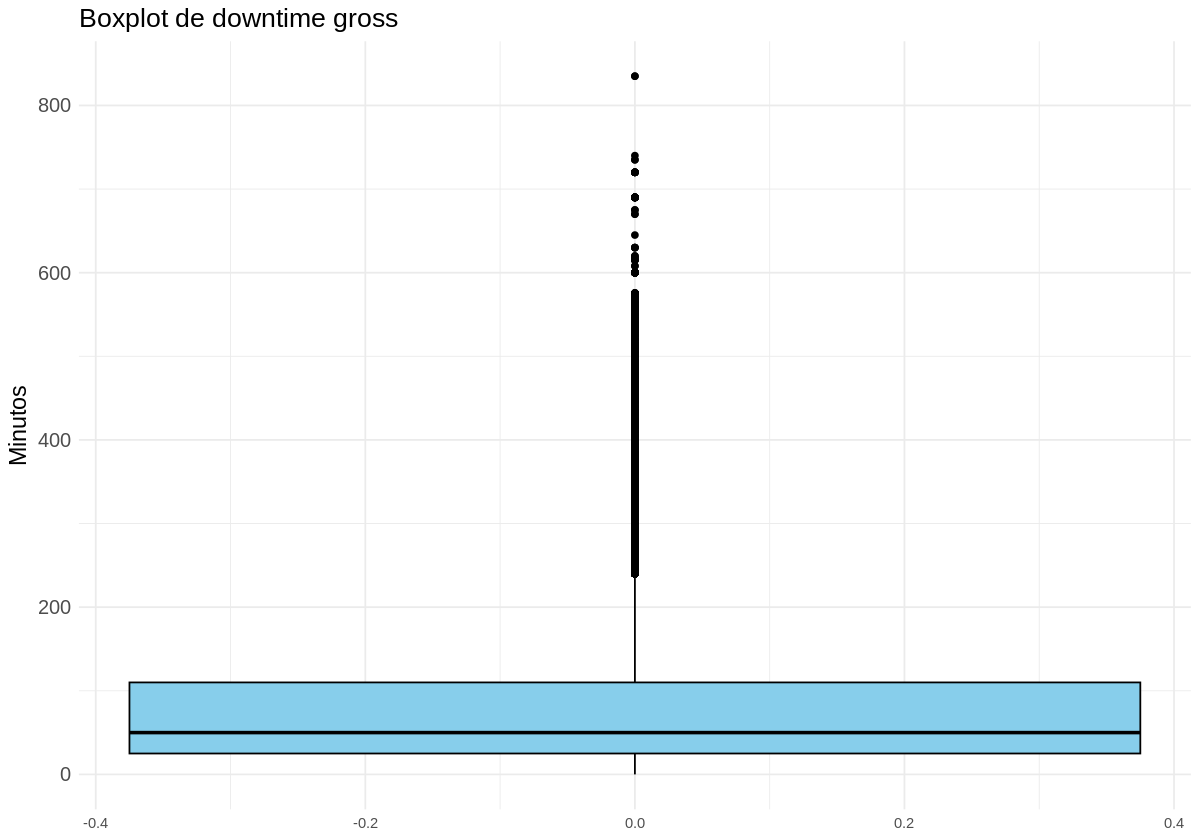

In [188]:
# Crear el boxplot de downtime gross
options(repr.plot.width=10, repr.plot.height=7)
ggplot(df, aes(y = downtime_gross)) +
  geom_boxplot(fill = 'skyblue', color = 'black') +
  labs(title = 'Boxplot de downtime gross',
       y = 'Minutos') +
  theme_minimal() +
  theme(
    axis.text.y = element_text(size = 12), # Tamaño del texto del eje y
    axis.title.y = element_text(size = 14), # Tamaño del título del eje y
    plot.title = element_text(size = 16)    # Tamaño del título del gráfico
  )

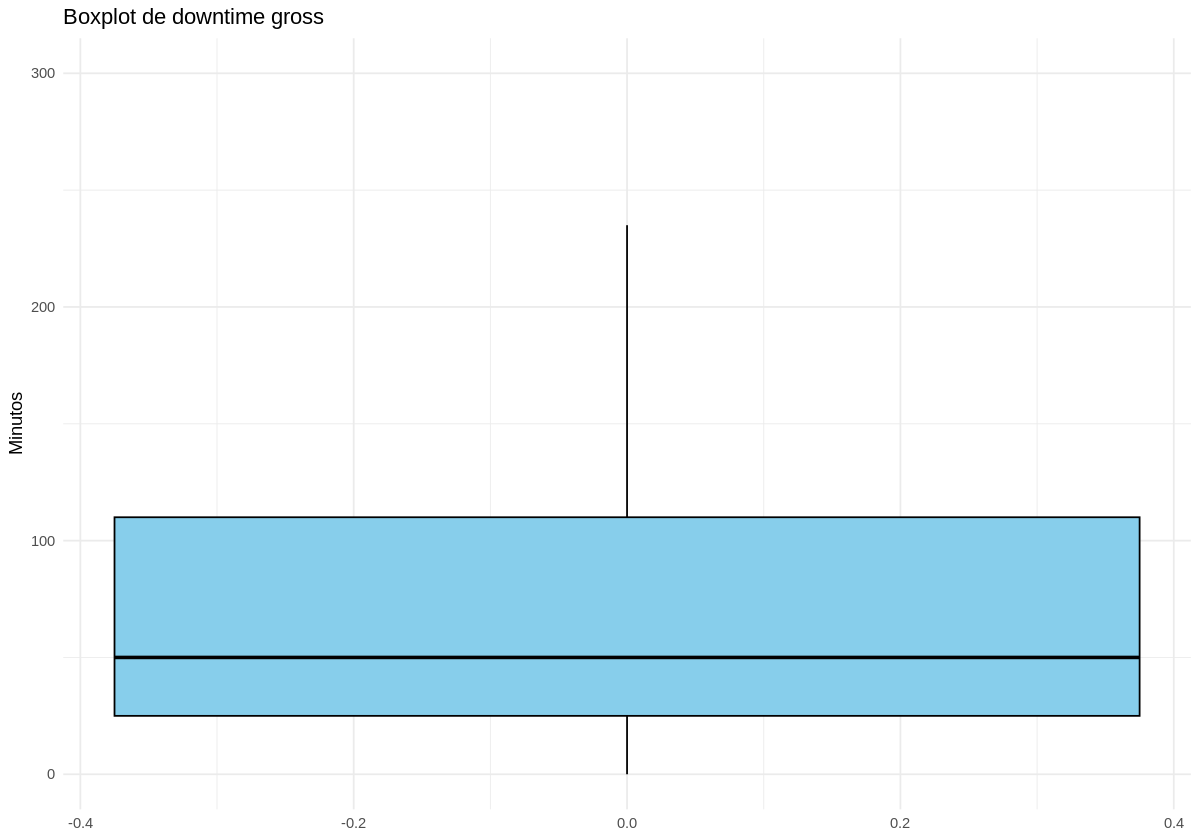

In [189]:
# Crear el boxplot de downtime gross
ggplot(df, aes(y = downtime_gross)) +
  geom_boxplot(fill = 'skyblue', color = 'black', outlier.shape = NA) +
  labs(title = 'Boxplot de downtime gross',
       y = 'Minutos') +
  theme_minimal() + coord_cartesian(ylim = c(0, 300))

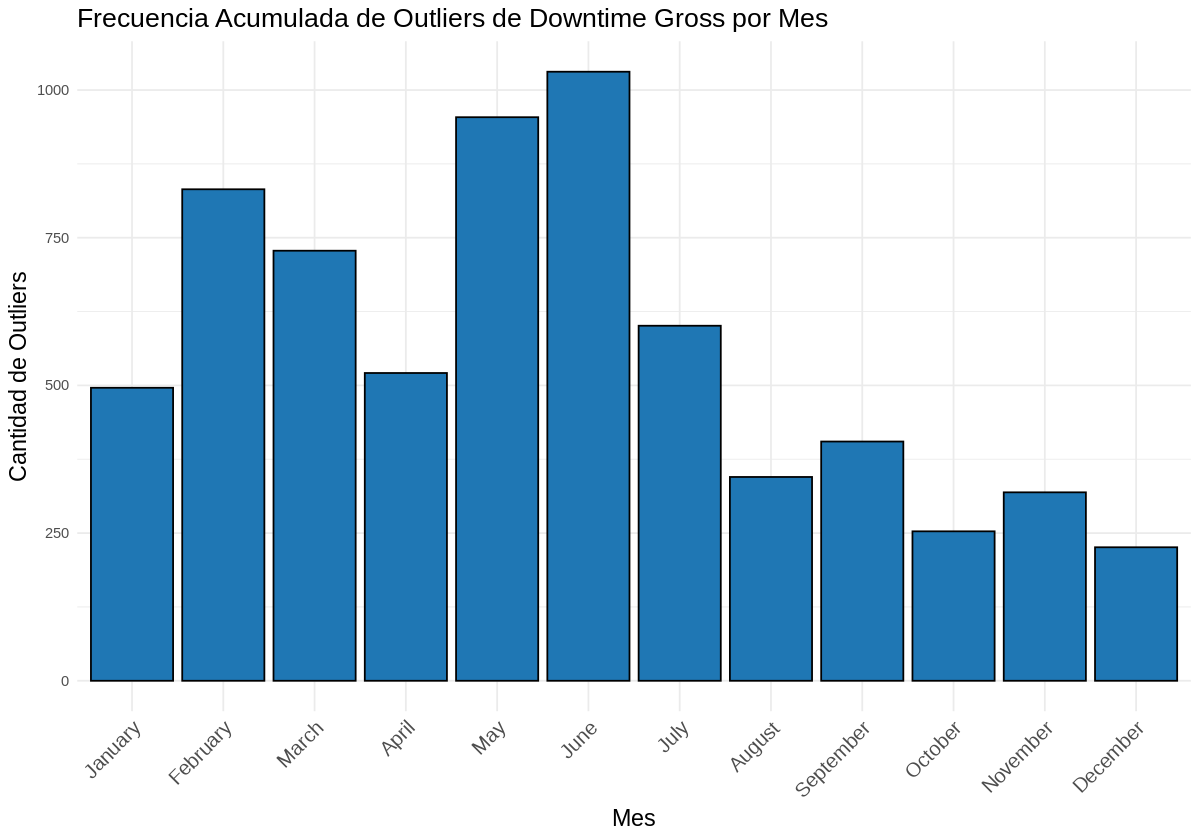

In [190]:
# Calcular el umbral de outliers (95% percentil)
outlier_threshold <- quantile(df$downtime_gross, 0.95)

# Identificar outliers
df$outlier <- ifelse(df$downtime_gross > outlier_threshold, TRUE, FALSE)

# Convertir la columna 'Date' a formato de fecha
df$date <- as.Date(df$date)

# Extraer solo el mes (sin el año) de la fecha
df <- df %>%
  mutate(Month = format(date, "%B")) # Nombre del mes

# Agrupar por mes y calcular la frecuencia acumulada de outliers
df_outliers <- df %>%
  group_by(Month) %>%
  summarise(Outliers = sum(outlier), .groups = 'drop') %>%
  arrange(match(Month, month.name)) # Ordenar por el orden de los meses

# Convertir la columna 'Month' a factor con el orden correcto
df_outliers$Month <- factor(df_outliers$Month, levels = month.name)

# Crear un gráfico de barras de la frecuencia acumulada de outliers por mes
ggplot(df_outliers, aes(x = Month, y = Outliers)) +
  geom_bar(stat = "identity", fill = "#1f77b4", color = 'black') + # Usar un color fijo
  labs(title = 'Frecuencia Acumulada de Outliers de Downtime Gross por Mes',
       x = 'Mes',
       y = 'Cantidad de Outliers') +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, size = 12), # Tamaño y ángulo del texto del eje x
    axis.title.x = element_text(size = 14),                      # Tamaño del título del eje x
    axis.title.y = element_text(size = 14),                      # Tamaño del título del eje y
    plot.title = element_text(size = 16)                         # Tamaño del título del gráfico
  )

In [191]:
# Calcular el umbral de outliers (95% percentil)
outlier_threshold <- quantile(df$downtime_gross, 0.95)

# Identificar outliers en el conjunto de datos original
df$outlier <- ifelse(df$downtime_gross > outlier_threshold, TRUE, FALSE)

# Filtrar por la operación "Hem Sleeve"
df_hem_sleeve <- df %>% filter(operation == "HEM SLEEVE")

# Contar los outliers para la operación "Hem Sleeve"
outliers_count <- sum(df_hem_sleeve$outlier)

# Imprimir el resultado
print(outliers_count)

[1] 2951


In [192]:
# Calcular el umbral de outliers (95% percentil)
outlier_threshold <- quantile(df$downtime_gross, 0.95)

# Identificar outliers en el conjunto de datos original
df$outlier <- ifelse(df$downtime_gross > outlier_threshold, TRUE, FALSE)

# Filtrar por la operación "Hem Sleeve"
df_hem_sleeve <- df %>% filter(operation == "HEM SLEEVE")

# Contar los outliers para la operación "Hem Sleeve"
hem_sleeve_outliers_count <- sum(df_hem_sleeve$outlier)

# Contar el total de outliers en el DataFrame original
total_outliers_count <- sum(df$outlier)

# Calcular el porcentaje de outliers de "Hem Sleeve" respecto al total de outliers
percentage_hem_sleeve_outliers <- (hem_sleeve_outliers_count / total_outliers_count) * 100

# Imprimir el resultado
print(paste("El porcentaje de outliers de 'Hem Sleeve' respecto al total es:", round(percentage_hem_sleeve_outliers, 2), "%"))

[1] "El porcentaje de outliers de 'Hem Sleeve' respecto al total es: 43.97 %"


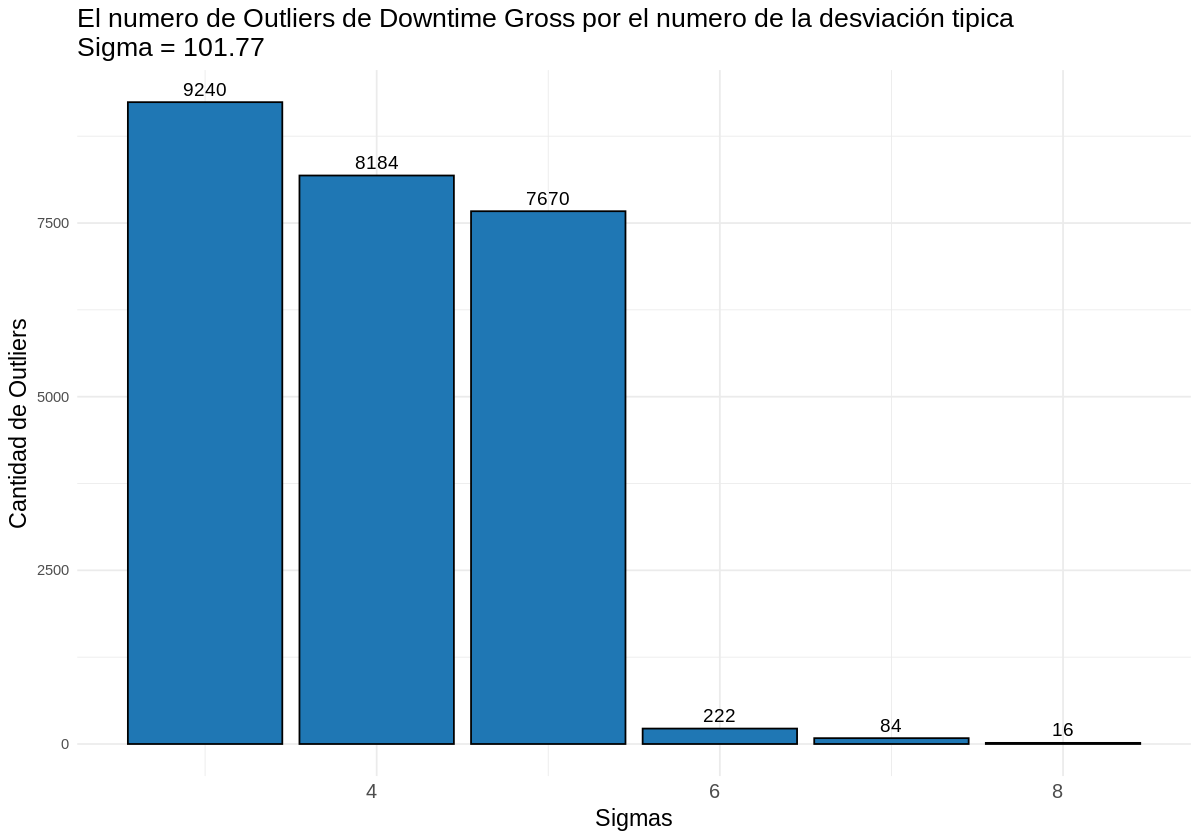

In [194]:
# Calcular el umbral de outliers (95% percentil)
outlier_threshold <- quantile(df$downtime_gross, 0.95)

# Identificar outliers en el conjunto de datos original
df$outlier <- ifelse(df$downtime_gross > outlier_threshold, TRUE, FALSE)

# Calculamos la desviación tipica de la variable downtime_gross
sigma_dg = sd(df$downtime_gross)

# Calculamos el máximo de la variable downtime_gross
max_dg = max(df$downtime_gross)

# Agrupamos outliers por el numero de la desviación tipica
df_outliers <- df %>% filter(outlier == TRUE) %>%
                      #select(downtime_gross) %>%
                      mutate(num_sigma = floor(downtime_gross/sigma_dg)) %>%
                      group_by(num_sigma) %>%
                      summarise(num_outliers = sum(num_sigma), .groups = 'drop')

# Crear un gráfico de barras de outliers por el numero de sigmas
ggplot(df_outliers, aes(x = num_sigma, y = num_outliers)) +
  geom_bar(stat = "identity", fill = "#1f77b4", color = 'black') + # Usar un color fijo
  geom_text(aes(label = num_outliers),vjust = -0.5, hjust = +0.5, size = 4) +  # Ajuste del tamaño del texto
  labs(title = paste0('El numero de Outliers de Downtime Gross por el numero de la desviación tipica\nSigma = ', round(sigma_dg,2) ),
       x = 'Sigmas',
       y = 'Cantidad de Outliers') +
  theme_minimal() +
  theme(
    axis.text.x = element_text(hjust = 1, size = 12), # Tamaño del texto del eje x
    axis.title.x = element_text(size = 14),           # Tamaño del título del eje x
    axis.title.y = element_text(size = 14),           # Tamaño del título del eje y
    plot.title = element_text(size = 16)              # Tamaño del título del gráfico
  )

# **PRUEBA DE HIPOTESIS**

In [66]:
# Instalar e importar el paquete nortest
if (!require(nortest)) install.packages("nortest")
library(nortest)

In [17]:
ad_test <- ad.test(df$downtime_gross)
print(ad_test)

ERROR: Error in df$downtime_gross: object of type 'closure' is not subsettable


In [ ]:
# Crear un gráfico Q-Q
qqnorm(df$downtime_gross)
qqline(df$downtime_gross)

In [ ]:
kruskal.test(downtime_gross ~ failure_desc, data = df)

In [ ]:
install.packages("dunn.test")
library(dunn.test)

# Realizar la prueba de Dunn
dunn.test(df$downtime_gross, df$failure_desc, kw = TRUE)

In [ ]:
# Calcular la mediana de downtime_gross por cada categoría de failure_desc
median_values <- df %>%
  group_by(failure_desc) %>%
  summarise(median_downtime = median(downtime_gross))

# Mostrar los resultados
print(median_values)

In [ ]:
# Crear un gráfico de barras de las medianas
ggplot(median_values, aes(x = reorder(failure_desc, -median_downtime), y = median_downtime)) +
  geom_bar(stat = "identity") +
  xlab("Categoría de Falla") +
  ylab("Mediana del Tiempo de Inactividad") +
  ggtitle("Mediana del Tiempo de Inactividad por Categoría de Falla") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# **MODELOS GLM**



In [59]:
df <- select(df, -wo_type, -outlier, -Month)
#Comparar con un glm

In [60]:
head(df,5)

equipment,operation,base_model,problem_desc,failure_desc,cause_desc,action_desc,mechanic,date,downtime_gross,parts_cost,waiting_hours,changed_pcs,Days_Between_Failures
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1011144,HEM SLEEVE,VC2700,Otros,Trim off device failure / Falla dispositivo corta desperdicio,Damaged trim off system knife / Cuchilla de corta desperdicio en mal estado,Sharpen knife / Afilar cuchillas,DIEGO CUELLAR,2023-01-03,10,51.00,0,0,2
1013453,TOP STITCH,VC2713,It sews with defect / Cose con defecto,Machine head failure stopping sewing / Falla cabezal dejando de coser,Misadjusted machine head needle guard / Guarda aguja de cabezal desajustada,Adjust machine head needle guard / Ajustar guarda aguja de cabezal,Adalberto Jeremias Rodriguez Zometa,2023-01-03,60,19.20,0,1,2
1013453,TOP STITCH,VC2713,It sews with defect / Cose con defecto,Machine head failure stopping sewing / Falla cabezal dejando de coser,Misadjusted machine head needle guard / Guarda aguja de cabezal desajustada,Adjust machine head needle guard / Ajustar guarda aguja de cabezal,Adalberto Jeremias Rodriguez Zometa,2023-01-03,60,19.20,0,1,0
1027243,SET SLEEVE,VC2700,It sews with defect / Cose con defecto,Machine head failure sewing with defect / Falla cabezal cosiendo con defecto,Oil leak in machine head / Fuga de aceite lubricante en cabezal,Fix machine head oil leak / Corregir fuga de aceite en cabezal,Otros,2023-01-03,30,60.69,0,1,2
1027243,SET SLEEVE,VC2700,It sews with defect / Cose con defecto,Machine head failure sewing with defect / Falla cabezal cosiendo con defecto,Oil leak in machine head / Fuga de aceite lubricante en cabezal,Fix machine head oil leak / Corregir fuga de aceite en cabezal,Otros,2023-01-03,30,60.69,0,1,0


In [61]:
# Establecer una semilla para reproducibilidad
set.seed(123)

# Definir proporciones para entrenamiento, validación y prueba
train_proportion <- 0.70
validation_proportion <- 0.20
test_proportion <- 0.10

# Calcular tamaños de cada conjunto
n <- nrow(df)
n_train <- floor(train_proportion * n)
n_validation <- floor(validation_proportion * n)
n_test <- n - n_train - n_validation  # El resto para prueba

# Crear índices para conjunto de entrenamiento, validación y prueba
trainIndex <- sample(1:n, n_train)
remaining <- setdiff(1:n, trainIndex)
validationIndex <- sample(remaining, n_validation)
testIndex <- setdiff(remaining, validationIndex)

# Crear conjuntos de entrenamiento, validación y prueba
train_data1 <- df[trainIndex, ]
validation_data1 <- df[validationIndex, ]
test_data1 <- df[testIndex, ]

# Comprobar las dimensiones de cada conjunto
cat("Dimensiones del conjunto de entrenamiento: ", dim(train_data1), "\n")
cat("Dimensiones del conjunto de validación: ", dim(validation_data1), "\n")
cat("Dimensiones del conjunto de prueba: ", dim(test_data1), "\n")

Dimensiones del conjunto de entrenamiento:  95100 14 
Dimensiones del conjunto de validación:  27171 14 
Dimensiones del conjunto de prueba:  13587 14 


In [62]:
# Inicializar y ajustar el modelo de regresión lineal
#Dividir en entrenamiento, test, validación por ejemplo 70,20,10
start_time <- Sys.time()
model1 <- glm(downtime_gross~. -equipment -downtime_gross -Days_Between_Failures -date -changed_pcs, data = train_data1)
end_time <- Sys.time()
training_time1 <- end_time - start_time
training_time1
# Resumen del modelo
summary(model1)

Time difference of 7.693047 secs


Call:
glm(formula = downtime_gross ~ . - equipment - downtime_gross - 
    Days_Between_Failures - date - changed_pcs, data = train_data1)

Coefficients:
                                                                                             Estimate
(Intercept)                                                                                 17.010838
operationBARTACK                                                                             3.916412
operationBIND ARM                                                                           -5.673010
operationBIND LEG                                                                            2.637063
operationBIND NECK                                                                          -5.634968
operationCLOSE SLEEVE                                                                        4.823515
operationFLAT LOCK                                                                           1.430791
operationFLAT SEAM           

In [63]:
# Predecir con el conjunto de validación
validation_predictions <- predict(model1, newdata = validation_data1)

# Calcular métricas de rendimiento para el conjunto de validación
validation_actuals <- validation_data1$downtime_gross
validation_rmse <- sqrt(mean((validation_predictions - validation_actuals)^2))
validation_mae <- mean(abs(validation_predictions - validation_actuals))
validation_r2 <- 1 - (sum((validation_predictions - validation_actuals)^2) / sum((validation_actuals - mean(validation_actuals))^2))

cat("Validation RMSE: ", validation_rmse, "\n")
cat("Validation MAE: ", validation_mae, "\n")
cat("Validation R-squared: ", validation_r2, "\n")

Validation RMSE:  67.07267 
Validation MAE:  39.48481 
Validation R-squared:  0.5589545 


In [64]:
# Predecir con el conjunto de prueba
test_predictions <- predict(model1, newdata = test_data1)

# Calcular métricas de rendimiento para el conjunto de prueba
test_actuals <- test_data1$downtime_gross
test_rmse <- sqrt(mean((test_predictions - test_actuals)^2))
test_mae <- mean(abs(test_predictions - test_actuals))
test_r2 <- 1 - (sum((test_predictions - test_actuals)^2) / sum((test_actuals - mean(test_actuals))^2))

cat("Test RMSE: ", test_rmse, "\n")
cat("Test MAE: ", test_mae, "\n")
cat("Test R-squared: ", test_r2, "\n")

Test RMSE:  66.92019 
Test MAE:  39.54054 
Test R-squared:  0.5657469 


**CALCULO DE VARIABLES**

In [65]:
#Calcular los fallos acumulativos
df <- df %>%
  group_by(equipment) %>%
  mutate(Cumulative_Failure_Count = row_number())

In [66]:
# Calcular el costo acumulado de mantenimiento
df <- df %>%
  group_by(equipment) %>%
  mutate(Cumulative_Maintenance_Cost = cumsum(parts_cost))

In [67]:
# Establecer una semilla para reproducibilidad
set.seed(123)

# Definir proporciones para entrenamiento, validación y prueba
train_proportion <- 0.70
validation_proportion <- 0.20
test_proportion <- 0.10

# Calcular tamaños de cada conjunto
n <- nrow(df)
n_train <- floor(train_proportion * n)
n_validation <- floor(validation_proportion * n)
n_test <- n - n_train - n_validation  # El resto para prueba

# Crear índices para conjunto de entrenamiento, validación y prueba
trainIndex <- sample(1:n, n_train)
remaining <- setdiff(1:n, trainIndex)
validationIndex <- sample(remaining, n_validation)
testIndex <- setdiff(remaining, validationIndex)

# Crear conjuntos de entrenamiento, validación y prueba
train_data2 <- df[trainIndex, ]
validation_data2 <- df[validationIndex, ]
test_data2 <- df[testIndex, ]

# Comprobar las dimensiones de cada conjunto
cat("Dimensiones del conjunto de entrenamiento: ", dim(train_data2), "\n")
cat("Dimensiones del conjunto de validación: ", dim(validation_data2), "\n")
cat("Dimensiones del conjunto de prueba: ", dim(test_data2), "\n")

Dimensiones del conjunto de entrenamiento:  95100 16 
Dimensiones del conjunto de validación:  27171 16 
Dimensiones del conjunto de prueba:  13587 16 


**GLM PARA PREDECIR DOWNTIME CON VARIABLES CALCULADAS**

In [68]:
# Inicializar y ajustar el modelo de regresión lineal
start_time <- Sys.time()
model2 <- glm(downtime_gross~. -equipment -downtime_gross -date -changed_pcs, data = train_data2)
end_time <- Sys.time()
training_time2 <- end_time - start_time
training_time2
# Resumen del modelo
summary(model2)

Time difference of 7.158427 secs


Call:
glm(formula = downtime_gross ~ . - equipment - downtime_gross - 
    date - changed_pcs, data = train_data2)

Coefficients:
                                                                                             Estimate
(Intercept)                                                                                 1.963e+01
operationBARTACK                                                                            3.825e+00
operationBIND ARM                                                                          -5.856e+00
operationBIND LEG                                                                           2.342e+00
operationBIND NECK                                                                         -5.626e+00
operationCLOSE SLEEVE                                                                       4.889e+00
operationFLAT LOCK                                                                          1.204e+00
operationFLAT SEAM                                   

In [69]:
# Predecir con el conjunto de validación
validation_predictions <- predict(model2, newdata = validation_data2)

# Calcular métricas de rendimiento para el conjunto de validación
validation_actuals <- validation_data2$downtime_gross
validation_rmse <- sqrt(mean((validation_predictions - validation_actuals)^2))
validation_mae <- mean(abs(validation_predictions - validation_actuals))
validation_r2 <- 1 - (sum((validation_predictions - validation_actuals)^2) / sum((validation_actuals - mean(validation_actuals))^2))

cat("Validation RMSE: ", validation_rmse, "\n")
cat("Validation MAE: ", validation_mae, "\n")
cat("Validation R-squared: ", validation_r2, "\n")

Validation RMSE:  67.0423 
Validation MAE:  39.46484 
Validation R-squared:  0.5593538 


In [70]:
# Predecir con el conjunto de prueba (ya calculado, pero repitiendo para claridad)
test_predictions <- predict(model2, newdata = test_data2)

# Calcular métricas de rendimiento para el conjunto de prueba
test_actuals <- test_data2$downtime_gross
test_rmse <- sqrt(mean((test_predictions - test_actuals)^2))
test_mae <- mean(abs(test_predictions - test_actuals))
test_r2 <- 1 - (sum((test_predictions - test_actuals)^2) / sum((test_actuals - mean(test_actuals))^2))

cat("Test RMSE: ", test_rmse, "\n")
cat("Test MAE: ", test_mae, "\n")
cat("Test R-squared: ", test_r2, "\n")

Test RMSE:  66.86983 
Test MAE:  39.51634 
Test R-squared:  0.5664002 


**MODELO INCLUYENDO LA VARIABLE "MACHINE AGE"**

In [71]:
# Renombrar la columna 'Equipment' a 'equipment' en df_age
df_age <- df_age %>% rename(equipment = Equipment)

In [72]:
df_merged <- df %>%
  left_join(df_age %>% select(equipment, Age), by = "equipment")

In [73]:
head(df_merged,3)

equipment,operation,base_model,problem_desc,failure_desc,cause_desc,action_desc,mechanic,date,downtime_gross,parts_cost,waiting_hours,changed_pcs,Days_Between_Failures,Cumulative_Failure_Count,Cumulative_Maintenance_Cost,Age
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
1011144,HEM SLEEVE,VC2700,Otros,Trim off device failure / Falla dispositivo corta desperdicio,Damaged trim off system knife / Cuchilla de corta desperdicio en mal estado,Sharpen knife / Afilar cuchillas,DIEGO CUELLAR,2023-01-03,10,51.0,0,0,2,1,51.0,26
1013453,TOP STITCH,VC2713,It sews with defect / Cose con defecto,Machine head failure stopping sewing / Falla cabezal dejando de coser,Misadjusted machine head needle guard / Guarda aguja de cabezal desajustada,Adjust machine head needle guard / Ajustar guarda aguja de cabezal,Adalberto Jeremias Rodriguez Zometa,2023-01-03,60,19.2,0,1,2,1,19.2,23
1013453,TOP STITCH,VC2713,It sews with defect / Cose con defecto,Machine head failure stopping sewing / Falla cabezal dejando de coser,Misadjusted machine head needle guard / Guarda aguja de cabezal desajustada,Adjust machine head needle guard / Ajustar guarda aguja de cabezal,Adalberto Jeremias Rodriguez Zometa,2023-01-03,60,19.2,0,1,0,2,38.4,23


In [74]:
# Establecer una semilla para reproducibilidad
set.seed(123)

# Definir proporciones para entrenamiento, validación y prueba
train_proportion <- 0.70
validation_proportion <- 0.20
test_proportion <- 0.10

# Calcular tamaños de cada conjunto
n <- nrow(df_merged)
n_train <- floor(train_proportion * n)
n_validation <- floor(validation_proportion * n)
n_test <- n - n_train - n_validation  # El resto para prueba

# Crear índices para conjunto de entrenamiento, validación y prueba
trainIndex <- sample(1:n, n_train)
remaining <- setdiff(1:n, trainIndex)
validationIndex <- sample(remaining, n_validation)
testIndex <- setdiff(remaining, validationIndex)

# Crear conjuntos de entrenamiento, validación y prueba
train_data3 <- df_merged[trainIndex, ]
validation_data3 <- df_merged[validationIndex, ]
test_data3 <- df_merged[testIndex, ]

# Comprobar las dimensiones de cada conjunto
cat("Dimensiones del conjunto de entrenamiento: ", dim(train_data3), "\n")
cat("Dimensiones del conjunto de validación: ", dim(validation_data3), "\n")
cat("Dimensiones del conjunto de prueba: ", dim(test_data3), "\n")

Dimensiones del conjunto de entrenamiento:  95100 17 
Dimensiones del conjunto de validación:  27171 17 
Dimensiones del conjunto de prueba:  13587 17 


In [75]:
# Inicializar y ajustar el modelo de regresión lineal
start_time <- Sys.time()
model3 <- glm(downtime_gross~. -equipment -downtime_gross -date -changed_pcs, data = train_data3)
end_time <- Sys.time()
training_time3 <- end_time - start_time
training_time3
# Resumen del modelo
summary(model3)

Time difference of 7.471777 secs


Call:
glm(formula = downtime_gross ~ . - equipment - downtime_gross - 
    date - changed_pcs, data = train_data3)

Coefficients:
                                                                                             Estimate
(Intercept)                                                                                 1.357e+01
operationBARTACK                                                                            4.893e+00
operationBIND ARM                                                                          -5.516e+00
operationBIND LEG                                                                           2.977e+00
operationBIND NECK                                                                         -5.032e+00
operationCLOSE SLEEVE                                                                       5.701e+00
operationFLAT LOCK                                                                          2.303e+00
operationFLAT SEAM                                   

In [76]:
# Predecir con el conjunto de validación
validation_predictions <- predict(model3, newdata = validation_data3)

# Calcular métricas de rendimiento para el conjunto de validación
validation_actuals <- validation_data3$downtime_gross
validation_rmse <- sqrt(mean((validation_predictions - validation_actuals)^2))
validation_mae <- mean(abs(validation_predictions - validation_actuals))
validation_r2 <- 1 - (sum((validation_predictions - validation_actuals)^2) / sum((validation_actuals - mean(validation_actuals))^2))

cat("Validation RMSE: ", validation_rmse, "\n")
cat("Validation MAE: ", validation_mae, "\n")
cat("Validation R-squared: ", validation_r2, "\n")

Validation RMSE:  67.01504 
Validation MAE:  39.44415 
Validation R-squared:  0.5597121 


In [77]:
# Predecir con el conjunto de prueba
test_predictions <- predict(model3, newdata = test_data3)

# Calcular métricas de rendimiento para el conjunto de prueba
test_actuals <- test_data3$downtime_gross
test_rmse <- sqrt(mean((test_predictions - test_actuals)^2))
test_mae <- mean(abs(test_predictions - test_actuals))
test_r2 <- 1 - (sum((test_predictions - test_actuals)^2) / sum((test_actuals - mean(test_actuals))^2))

cat("Test RMSE: ", test_rmse, "\n")
cat("Test MAE: ", test_mae, "\n")
cat("Test R-squared: ", test_r2, "\n")

Test RMSE:  66.84893 
Test MAE:  39.49358 
Test R-squared:  0.5666711 


**MODELO INCLUYENDO LA VARIABLE "MECHANIC ANTIQUITY"**

In [78]:
# Primero, calcula la media de antiquity
mean_antiquity <- mean(df_mechanic$antiquity, na.rm = TRUE)

# Realiza el left join y luego reemplaza los NA en antiquity con la media calculada
df_merged2 <- df_merged %>%
  left_join(df_mechanic %>% select(mechanic, antiquity), by = "mechanic") %>%
  mutate(antiquity = ifelse(is.na(antiquity), mean_antiquity, antiquity))

In [79]:
# Establecer una semilla para reproducibilidad
set.seed(123)

# Definir proporciones para entrenamiento, validación y prueba
train_proportion <- 0.70
validation_proportion <- 0.20
test_proportion <- 0.10

# Calcular tamaños de cada conjunto
n <- nrow(df_merged2)
n_train <- floor(train_proportion * n)
n_validation <- floor(validation_proportion * n)
n_test <- n - n_train - n_validation  # El resto para prueba

# Crear índices para conjunto de entrenamiento, validación y prueba
trainIndex <- sample(1:n, n_train)
remaining <- setdiff(1:n, trainIndex)
validationIndex <- sample(remaining, n_validation)
testIndex <- setdiff(remaining, validationIndex)

# Crear conjuntos de entrenamiento, validación y prueba
train_data4 <- df_merged2[trainIndex, ]
validation_data4 <- df_merged2[validationIndex, ]
test_data4 <- df_merged2[testIndex, ]

# Comprobar las dimensiones de cada conjunto
cat("Dimensiones del conjunto de entrenamiento: ", dim(train_data4), "\n")
cat("Dimensiones del conjunto de validación: ", dim(validation_data4), "\n")
cat("Dimensiones del conjunto de prueba: ", dim(test_data4), "\n")

Dimensiones del conjunto de entrenamiento:  95100 18 
Dimensiones del conjunto de validación:  27171 18 
Dimensiones del conjunto de prueba:  13587 18 


In [80]:
# Inicializar y ajustar el modelo de regresión lineal
start_time <- Sys.time()
model4 <- glm(downtime_gross~. -equipment -downtime_gross -date -changed_pcs, data = train_data4)
end_time <- Sys.time()
training_time4 <- end_time - start_time
training_time4
# Resumen del modelo
summary(model4)

Time difference of 7.321262 secs


Call:
glm(formula = downtime_gross ~ . - equipment - downtime_gross - 
    date - changed_pcs, data = train_data4)

Coefficients: (1 not defined because of singularities)
                                                                                             Estimate
(Intercept)                                                                                 1.357e+01
operationBARTACK                                                                            4.893e+00
operationBIND ARM                                                                          -5.516e+00
operationBIND LEG                                                                           2.977e+00
operationBIND NECK                                                                         -5.032e+00
operationCLOSE SLEEVE                                                                       5.701e+00
operationFLAT LOCK                                                                          2.303e+00
operationFLA

In [81]:
# Predecir con el conjunto de validación
validation_predictions <- predict(model4, newdata = validation_data4)

# Calcular métricas de rendimiento para el conjunto de validación
validation_actuals <- validation_data4$downtime_gross
validation_rmse <- sqrt(mean((validation_predictions - validation_actuals)^2))
validation_mae <- mean(abs(validation_predictions - validation_actuals))
validation_r2 <- 1 - (sum((validation_predictions - validation_actuals)^2) / sum((validation_actuals - mean(validation_actuals))^2))

cat("Validation RMSE: ", validation_rmse, "\n")
cat("Validation MAE: ", validation_mae, "\n")
cat("Validation R-squared: ", validation_r2, "\n")

Validation RMSE:  67.01504 
Validation MAE:  39.44415 
Validation R-squared:  0.5597121 


In [82]:
# Predecir con el conjunto de prueba
test_predictions <- predict(model4, newdata = test_data4)

# Calcular métricas de rendimiento para el conjunto de prueba
test_actuals <- test_data4$downtime_gross
test_rmse <- sqrt(mean((test_predictions - test_actuals)^2))
test_mae <- mean(abs(test_predictions - test_actuals))
test_r2 <- 1 - (sum((test_predictions - test_actuals)^2) / sum((test_actuals - mean(test_actuals))^2))

cat("Test RMSE: ", test_rmse, "\n")
cat("Test MAE: ", test_mae, "\n")
cat("Test R-squared: ", test_r2, "\n")

Test RMSE:  66.84893 
Test MAE:  39.49358 
Test R-squared:  0.5666711 


**MODELO INCLUYENDO LA VARIABLE "CHANGED_PCS"**

In [83]:
# Inicializar y ajustar el modelo de regresión lineal
start_time <- Sys.time()
model5 <- glm(downtime_gross~. -equipment -downtime_gross -date -antiquity, data = train_data4)
end_time <- Sys.time()
training_time5 <- end_time - start_time
training_time5
# Resumen del modelo
summary(model5)

Time difference of 7.311018 secs


Call:
glm(formula = downtime_gross ~ . - equipment - downtime_gross - 
    date - antiquity, data = train_data4)

Coefficients:
                                                                                             Estimate
(Intercept)                                                                                 1.409e+00
operationBARTACK                                                                            4.406e-02
operationBIND ARM                                                                          -7.398e-01
operationBIND LEG                                                                          -1.162e+00
operationBIND NECK                                                                         -4.564e-01
operationCLOSE SLEEVE                                                                       5.049e-01
operationFLAT LOCK                                                                          5.458e-01
operationFLAT SEAM                                     

In [84]:
# Predecir con el conjunto de validación
validation_predictions <- predict(model5, newdata = validation_data4)

# Calcular métricas de rendimiento para el conjunto de validación
validation_actuals <- validation_data4$downtime_gross
validation_rmse <- sqrt(mean((validation_predictions - validation_actuals)^2))
validation_mae <- mean(abs(validation_predictions - validation_actuals))
validation_r2 <- 1 - (sum((validation_predictions - validation_actuals)^2) / sum((validation_actuals - mean(validation_actuals))^2))

cat("Validation RMSE: ", validation_rmse, "\n")
cat("Validation MAE: ", validation_mae, "\n")
cat("Validation R-squared: ", validation_r2, "\n")

Validation RMSE:  17.72352 
Validation MAE:  14.92842 
Validation R-squared:  0.9692041 


In [85]:
# Predecir con el conjunto de prueba
test_predictions <- predict(model5, newdata = test_data4)

# Calcular métricas de rendimiento para el conjunto de prueba
test_actuals <- test_data4$downtime_gross
test_rmse <- sqrt(mean((test_predictions - test_actuals)^2))
test_mae <- mean(abs(test_predictions - test_actuals))
test_r2 <- 1 - (sum((test_predictions - test_actuals)^2) / sum((test_actuals - mean(test_actuals))^2))

cat("Test RMSE: ", test_rmse, "\n")
cat("Test MAE: ", test_mae, "\n")
cat("Test R-squared: ", test_r2, "\n")

Test RMSE:  17.56808 
Test MAE:  14.76287 
Test R-squared:  0.970072 


**IMPLEMENTACION DE FRONTWARD**

In [86]:
sapply(df_merged2, function(x) sum(is.na(x)))

equipment                   operation 
                          0                           0 
                 base_model                problem_desc 
                          0                           0 
               failure_desc                  cause_desc 
                          0                           0 
                action_desc                    mechanic 
                          0                           0 
                       date              downtime_gross 
                          0                           0 
                 parts_cost               waiting_hours 
                          0                           0 
                changed_pcs       Days_Between_Failures 
                          0                           0 
   Cumulative_Failure_Count Cumulative_Maintenance_Cost 
                          0                           0 
                        Age                   antiquity 
                          0                           0

In [87]:
# Realizar frontward elimination
model_null <- lm(downtime_gross ~ 1, data = train_data4)
model_forward <- step(model_null,
                      scope = list(lower = model_null, upper = model5),
                      direction = "forward")
model_forward$anova

Start:  AIC=879713.1
downtime_gross ~ 1

                              Df Sum of Sq       RSS    AIC
+ waiting_hours                1 506148508 483701696 811615
+ changed_pcs                  1 500060218 489789987 812805
+ mechanic                    85 132541098 857309106 866212
+ operation                   24  37878912 951971293 876050
+ base_model                  21  31230275 958619930 876706
+ action_desc                 28  27301122 962549082 877109
+ cause_desc                  28  25936370 963913834 877244
+ problem_desc                 2  23905344 965944861 877392
+ parts_cost                   1   9364447 980485758 878811
+ failure_desc                 3   7565519 982284685 878989
+ Age                          1   5831346 984018859 879153
+ Days_Between_Failures        1   3883037 985967168 879341
+ Cumulative_Maintenance_Cost  1   3396562 986453643 879388
+ Cumulative_Failure_Count     1   1080976 988769228 879611
<none>                                     989850205 879713

Step,Df,Deviance,Resid. Df,Resid. Dev,AIC
<I<chr>>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
,NA,NA,95099,989850205,879713.1
+ waiting_hours,-1,5.061485e+08,95098,483701696,811615.4
+ changed_pcs,-1,4.527020e+08,95097,30999742,550331.2
+ mechanic,-85,1.099658e+06,95012,29900084,547066.4
+ action_desc,-28,5.859497e+04,94984,29841489,546935.8
+ parts_cost,-1,1.690838e+04,94983,29824581,546883.9
+ base_model,-21,2.132620e+04,94962,29803254,546857.9
+ cause_desc,-28,2.668795e+04,94934,29776566,546828.7
+ failure_desc,-3,6.760718e+03,94931,29769806,546813.1


In [88]:
formula = as.formula("downtime_gross ~ waiting_hours + changed_pcs + mechanic + action_desc +
    parts_cost + base_model + cause_desc + failure_desc + Cumulative_Maintenance_Cost +
    Cumulative_Failure_Count")

In [89]:
# Inicializar y ajustar el modelo de regresión lineal
start_time <- Sys.time()
model6 <- glm(formula = formula, data = train_data4)
end_time <- Sys.time()
training_time6 <- end_time - start_time
training_time6
# Resumen del modelo
summary(model6)

Time difference of 5.320372 secs


Call:
glm(formula = formula, data = train_data4)

Coefficients:
                                                                                             Estimate
(Intercept)                                                                                 1.382e+00
waiting_hours                                                                               5.991e+01
changed_pcs                                                                                 5.490e+01
mechanicAdalberto Jeremias Rodriguez Zometa                                                -6.288e-01
mechanicAlfonso Escobar                                                                    -2.490e+00
mechanicAnthony Murillo                                                                     1.101e+01
mechanicAntony Ulloa                                                                        1.131e+01
mechanicCain Alfredo Ramirez                                                                1.297e+00
mechanicCarlos Al

In [90]:
# Predecir con el conjunto de prueba
test_predictions <- predict(model6, newdata = test_data4)

# Calcular métricas de rendimiento para el conjunto de prueba
test_actuals <- test_data4$downtime_gross
test_rmse <- sqrt(mean((test_predictions - test_actuals)^2))
test_mae <- mean(abs(test_predictions - test_actuals))
test_r2 <- 1 - (sum((test_predictions - test_actuals)^2) / sum((test_actuals - mean(test_actuals))^2))

cat("Test RMSE: ", test_rmse, "\n")
cat("Test MAE: ", test_mae, "\n")
cat("Test R-squared: ", test_r2, "\n")

Test RMSE:  17.56432 
Test MAE:  14.7602 
Test R-squared:  0.9700848 


In [91]:
formula2 = as.formula("downtime_gross ~ waiting_hours + changed_pcs*mechanic + action_desc +
    parts_cost + base_model + cause_desc + failure_desc + Cumulative_Maintenance_Cost +
    Cumulative_Failure_Count")

**MODELO CON INTERACCIÓN DE MECHANIC Y CHANGED PIECES**

In [92]:
# Inicializar y ajustar el modelo de regresión lineal
# Medir el tiempo de entrenamiento
start_time <- Sys.time()
model7 <- glm(formula = formula2, data = train_data4)
end_time <- Sys.time()
training_time8 <- end_time - start_time
training_time8
# Resumen del modelo
summary(model7)

Time difference of 11.55823 secs


Call:
glm(formula = formula2, data = train_data4)

Coefficients:
                                                                                             Estimate
(Intercept)                                                                                 1.332e+00
waiting_hours                                                                               5.999e+01
changed_pcs                                                                                 5.514e+01
mechanicAdalberto Jeremias Rodriguez Zometa                                                 8.376e+00
mechanicAlfonso Escobar                                                                    -5.780e+00
mechanicAnthony Murillo                                                                     1.564e+01
mechanicAntony Ulloa                                                                        1.227e+01
mechanicCain Alfredo Ramirez                                                                2.813e+00
mechanicCarlos A

In [93]:
# Predecir con el conjunto de prueba
test_predictions <- predict(model7, newdata = test_data4)

# Calcular métricas de rendimiento para el conjunto de prueba
test_actuals <- test_data4$downtime_gross
test_rmse <- sqrt(mean((test_predictions - test_actuals)^2))
test_mae <- mean(abs(test_predictions - test_actuals))
test_r2 <- 1 - (sum((test_predictions - test_actuals)^2) / sum((test_actuals - mean(test_actuals))^2))

cat("Test RMSE: ", test_rmse, "\n")
cat("Test MAE: ", test_mae, "\n")
cat("Test R-squared: ", test_r2, "\n")

Test RMSE:  17.13446 
Test MAE:  14.13176 
Test R-squared:  0.9715312 


In [94]:
# Predecir con el conjunto de validación
validation_predictions <- predict(model7, newdata = validation_data4)

# Calcular métricas de rendimiento para el conjunto de validación
validation_actuals <- validation_data4$downtime_gross
validation_rmse <- sqrt(mean((validation_predictions - validation_actuals)^2))
validation_mae <- mean(abs(validation_predictions - validation_actuals))
validation_r2 <- 1 - (sum((validation_predictions - validation_actuals)^2) / sum((validation_actuals - mean(validation_actuals))^2))

cat("Validation RMSE: ", validation_rmse, "\n")
cat("Validation MAE: ", validation_mae, "\n")
cat("Validation R-squared: ", validation_r2, "\n")

Validation RMSE:  17.33637 
Validation MAE:  14.3182 
Validation R-squared:  0.9705348 


In [95]:
# Lista de todas las variables independientes disponibles
variables <- c("changed_pcs", "mechanic", "operation", "cause_desc",
               "problem_desc", "Age", "base_model", "action_desc",
               "failure_desc", "Days_Between_Failures",
               "Cumulative_Maintenance_Cost", "parts_cost", "waiting_hours")

# Crear una lista para almacenar los modelos y un data frame para los resultados
modelos <- list()
resultados <- data.frame(Modelo = character(), Variables = character(), Error = numeric(), R_Squared = numeric(), stringsAsFactors = FALSE)

set.seed(123)  # Fijar semilla para reproducibilidad

# Bucle para iterar y ajustar 50 modelos
for (i in 1:50) {
  # Seleccionar aleatoriamente un subconjunto de variables
  selected_vars <- sample(variables, size = sample(1:length(variables), 1))  # Tamaño del subconjunto también aleatorio

  # Definir la fórmula del modelo usando las variables seleccionadas
  formula <- as.formula(paste("downtime_gross ~", paste(selected_vars, collapse = " + ")))

  # Ajustar el modelo GLM
  modelo <- glm(formula, data = train_data4, family = gaussian())

  # Almacenar el modelo en la lista
  modelos[[paste("modelo", i, sep = "_")]] <- modelo

  # Calcular el Error Absoluto Medio (MAE)
  predicciones <- predict(modelo, validation_data4)
  mae <- mean(abs(validation_data4$downtime_gross - predicciones))

  # Calcular el R cuadrado
  ss_total <- sum((validation_data4$downtime_gross - mean(validation_data4$downtime_gross))^2)
  ss_residual <- sum((validation_data4$downtime_gross - predicciones)^2)
  r_squared <- 1 - (ss_residual / ss_total)

  # Almacenar los resultados en el data frame
  resultados <- rbind(resultados, data.frame(Modelo = paste("Modelo", i), Variables = paste(selected_vars, collapse = ", "), Error = mae, R_Squared = r_squared))
}

# Ver los resultados
resultados

Modelo,Variables,Error,R_Squared
<chr>,<chr>,<dbl>,<dbl>
Modelo 1,"operation, Days_Between_Failures, mechanic",62.22792,0.132524802
Modelo 2,"Cumulative_Maintenance_Cost, problem_desc, cause_desc, Age, failure_desc, mechanic",61.85195,0.134522757
Modelo 3,"problem_desc, operation, Cumulative_Maintenance_Cost, failure_desc, Days_Between_Failures, changed_pcs, waiting_hours, parts_cost, mechanic, Age, base_model",14.95328,0.969148763
Modelo 4,"operation, cause_desc, changed_pcs, base_model, problem_desc, parts_cost, Days_Between_Failures, mechanic, failure_desc",39.73778,0.562541911
Modelo 5,"failure_desc, waiting_hours, Days_Between_Failures, base_model, problem_desc, Cumulative_Maintenance_Cost, parts_cost",41.91838,0.526518419
Modelo 6,"Age, failure_desc, mechanic, problem_desc, action_desc, cause_desc, base_model, Days_Between_Failures, Cumulative_Maintenance_Cost, changed_pcs, parts_cost",39.74948,0.560026717
Modelo 7,"failure_desc, Age, problem_desc, waiting_hours, cause_desc, parts_cost, action_desc, operation, changed_pcs, mechanic, Days_Between_Failures",14.92947,0.969201221
Modelo 8,mechanic,62.37292,0.120730628
Modelo 9,"waiting_hours, problem_desc, Age, operation",42.49031,0.518645473


In [96]:
write.csv(resultados, "resultados.csv", row.names = TRUE)

In [97]:
residuals <- residuals(model6)

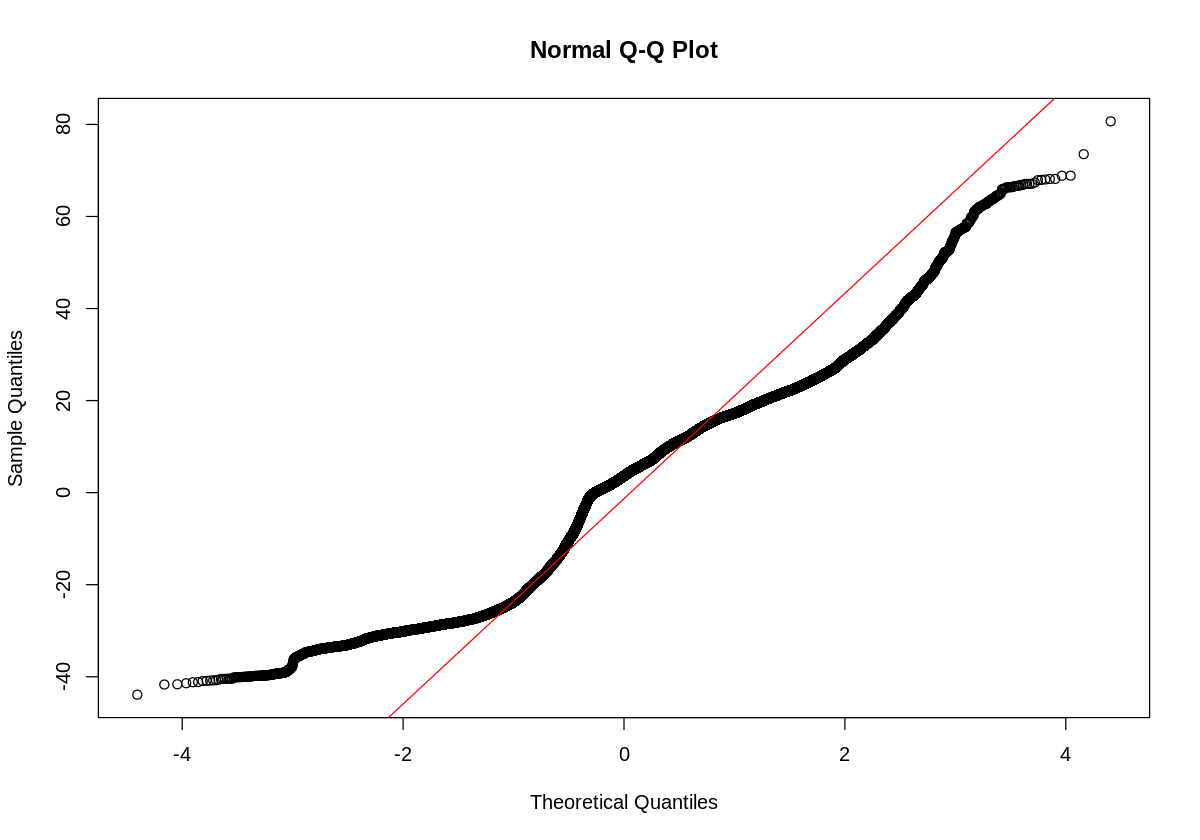

In [98]:
qqnorm(residuals)
qqline(residuals, col = "red")

In [99]:
install.packages("nortest")
library(nortest)
ad_test <- ad.test(residuals)
print(ad_test)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




	Anderson-Darling normality test

data:  residuals
A = 1805.7, p-value < 2.2e-16



# **MODELO RANDOM FOREST**

In [ ]:
# Entrenar el modelo de Random Forest
start_time <- Sys.time()
model_rf <- randomForest(downtime_gross ~ waiting_hours + changed_pcs + mechanic + action_desc +
    parts_cost + base_model + cause_desc + failure_desc + Cumulative_Maintenance_Cost +
    Cumulative_Failure_Count, data = train_data4, importance = TRUE)
end_time <- Sys.time()
training_time7 <- end_time - start_time
training_time7
# Ver el resumen del modelo
print(model_rf)

Time difference of 58.32582 mins


Call:
 randomForest(formula = downtime_gross ~ waiting_hours + changed_pcs +      mechanic + action_desc + parts_cost + base_model + cause_desc +      failure_desc + Cumulative_Maintenance_Cost + Cumulative_Failure_Count,      data = train_data4, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 3

          Mean of squared residuals: 134.1744
                    % Var explained: 98.71


In [ ]:
# Predecir con el conjunto de validación
validation_predictions <- predict(model_rf, newdata = validation_data4)

# Calcular métricas de rendimiento para el conjunto de validación
validation_actuals <- validation_data4$downtime_gross
validation_rmse <- sqrt(mean((validation_predictions - validation_actuals)^2))
validation_mae <- mean(abs(validation_predictions - validation_actuals))
validation_r2 <- 1 - (sum((validation_predictions - validation_actuals)^2) / sum((validation_actuals - mean(validation_actuals))^2))

cat("Validation RMSE: ", validation_rmse, "\n")
cat("Validation MAE: ", validation_mae, "\n")
cat("Validation R-squared: ", validation_r2, "\n")

Validation RMSE:  11.47622 
Validation MAE:  8.354358 
Validation R-squared:  0.9870881 


In [ ]:
# Predecir con el conjunto de prueba
test_predictions <- predict(model_rf, newdata = test_data4)

# Calcular métricas de rendimiento para el conjunto de prueba
test_actuals <- test_data4$downtime_gross
test_rmse <- sqrt(mean((test_predictions - test_actuals)^2))
test_mae <- mean(abs(test_predictions - test_actuals))
test_r2 <- 1 - (sum((test_predictions - test_actuals)^2) / sum((test_actuals - mean(test_actuals))^2))

cat("Test RMSE: ", test_rmse, "\n")
cat("Test MAE: ", test_mae, "\n")
cat("Test R-squared: ", test_r2, "\n")

Test RMSE:  11.27007 
Test MAE:  8.209747 
Test R-squared:  0.9876837 


In [ ]:
residuals <- test_data4$downtime_gross - test_predictions

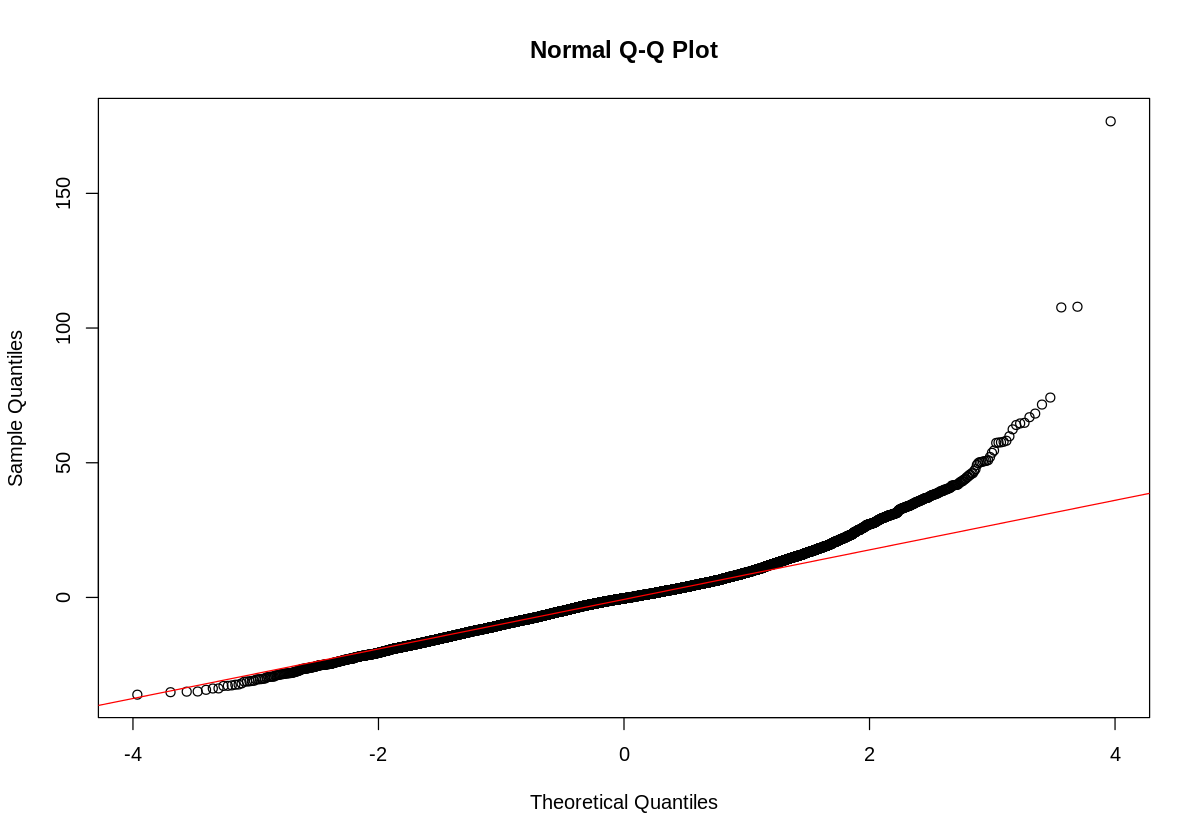

In [ ]:
qqnorm(residuals)
qqline(residuals, col = "red")

,%IncMSE,IncNodePurity
waiting_hours,741.67870,477860614
changed_pcs,672.94543,450513424
mechanic,36.77166,10517527
action_desc,29.09862,4184402
parts_cost,18.96908,10697667
base_model,36.10069,5669347
cause_desc,29.33269,5847152
failure_desc,33.18387,2170247
Cumulative_Maintenance_Cost,25.14931,9514549
Cumulative_Failure_Count,30.85235,7424983


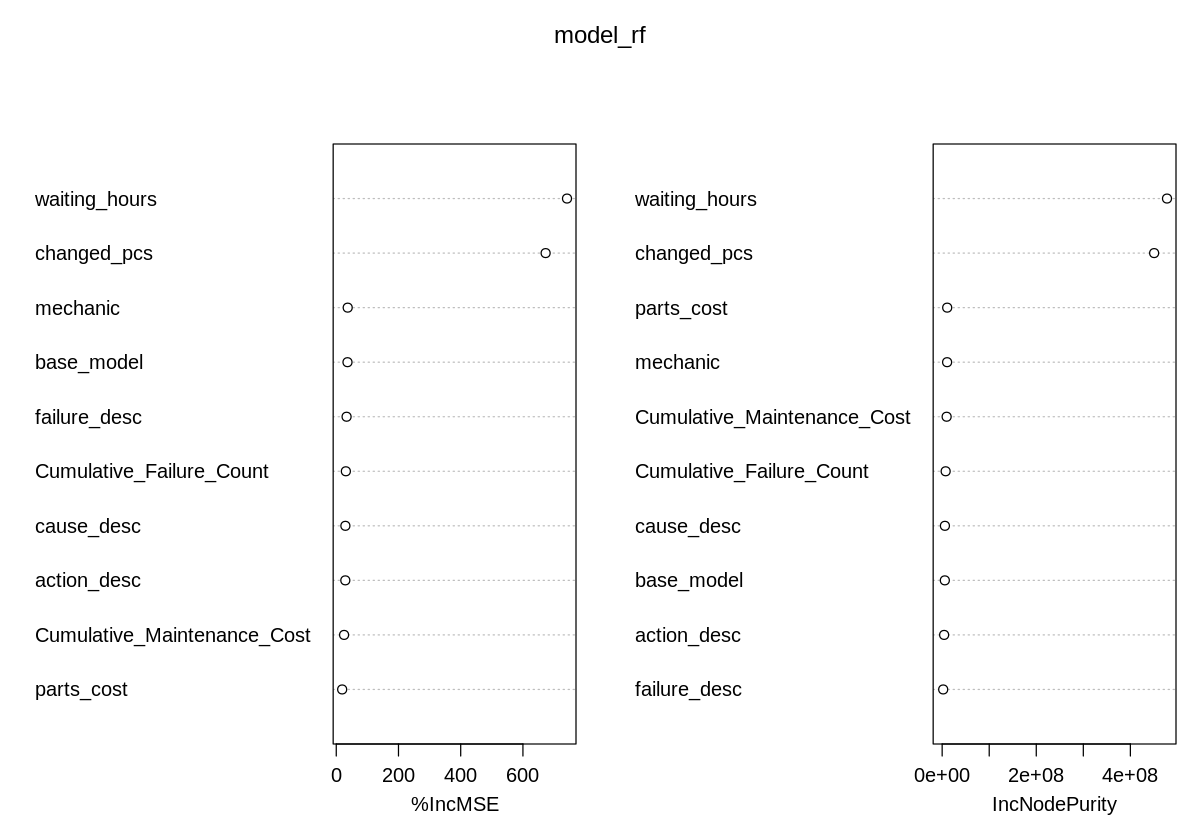

In [ ]:
# Ver la importancia de las variables
importance(model_rf)
varImpPlot(model_rf)

In [ ]:
install.packages("nortest")
library(nortest)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
ad_test <- ad.test(residuals)
print(ad_test)


	Anderson-Darling normality test

data:  residuals
A = 90.865, p-value < 2.2e-16



# MODELO SVM

In [ ]:
# Instalar el paquete e1071 si no lo tienes
install.packages("e1071")

# Cargar el paquete
library(e1071)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Medir el tiempo de entrenamiento
start_time <- Sys.time()

# Ajustar el modelo SVM
model_svm <- svm(downtime_gross ~ waiting_hours + changed_pcs + mechanic + action_desc +
    parts_cost + base_model + cause_desc + failure_desc + Cumulative_Maintenance_Cost +
    Cumulative_Failure_Count, data = train_data4, kernel = "radial", cost = 1, gamma = 0.1)

end_time <- Sys.time()
training_time_svm <- end_time - start_time

# Mostrar el tiempo de entrenamiento
print(training_time_svm)

# Ver el resumen del modelo SVM
print(model_svm)

Time difference of 1.150458 hours

Call:
svm(formula = downtime_gross ~ waiting_hours + changed_pcs + mechanic + 
    action_desc + parts_cost + base_model + cause_desc + failure_desc + 
    Cumulative_Maintenance_Cost + Cumulative_Failure_Count, data = train_data4, 
    kernel = "radial", cost = 1, gamma = 0.1)


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.1 
    epsilon:  0.1 


Number of Support Vectors:  37835



In [ ]:
# Predecir con el conjunto de validación usando el modelo SVM
validation_predictions_svm <- predict(model_svm, newdata = validation_data4)

# Calcular métricas de rendimiento para el conjunto de validación
validation_actuals <- validation_data4$downtime_gross
validation_rmse_svm <- sqrt(mean((validation_predictions_svm - validation_actuals)^2))
validation_mae_svm <- mean(abs(validation_predictions_svm - validation_actuals))
validation_r2_svm <- 1 - (sum((validation_predictions_svm - validation_actuals)^2) / sum((validation_actuals - mean(validation_actuals))^2))

cat("Validation RMSE (SVM): ", validation_rmse_svm, "\n")
cat("Validation MAE (SVM): ", validation_mae_svm, "\n")
cat("Validation R-squared (SVM): ", validation_r2_svm, "\n")

Validation RMSE (SVM):  12.85015 
Validation MAE (SVM):  9.856853 
Validation R-squared (SVM):  0.9838114 


In [ ]:
# Predecir con el conjunto de prueba usando el modelo SVM
test_predictions_svm <- predict(model_svm, newdata = test_data4)

# Calcular métricas de rendimiento para el conjunto de prueba
test_actuals <- test_data4$downtime_gross
test_rmse_svm <- sqrt(mean((test_predictions_svm - test_actuals)^2))
test_mae_svm <- mean(abs(test_predictions_svm - test_actuals))
test_r2_svm <- 1 - (sum((test_predictions_svm - test_actuals)^2) / sum((test_actuals - mean(test_actuals))^2))

cat("Test RMSE (SVM): ", test_rmse_svm, "\n")
cat("Test MAE (SVM): ", test_mae_svm, "\n")
cat("Test R-squared (SVM): ", test_r2_svm, "\n")

Test RMSE (SVM):  12.6631 
Test MAE (SVM):  9.743881 
Test R-squared (SVM):  0.9844508 


# **MODELO GRADIENT BOOSTING**

**Cargamos la librería gbm**

In [ ]:
install.packages('gbm')
library(gbm)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loaded gbm 2.2.2

This version of gbm is no longer under development. Consider transitioning to gbm3, https://github.com/gbm-developers/gbm3



In [ ]:
dim(train_data4)
dim(validation_data4)
dim(test_data4)

[1] 95100    18

[1] 27171    18

[1] 13587    18

In [ ]:
glimpse(test_data4)

Rows: 13,587
Columns: 18
Groups: equipment [4,253]
$ equipment                   <dbl> 1013453, 1027243, 1111960, 1111952, 113265…
$ operation                   <chr> "TOP STITCH", "SET SLEEVE", "TAPE SHOULDER…
$ base_model                  <chr> "VC2713", "VC2700", "LDA-L26", "LDA-L26", …
$ problem_desc                <chr> "It sews with defect / Cose con defecto", …
$ failure_desc                <chr> "Machine head failure stopping sewing  / F…
$ cause_desc                  <chr> "Misadjusted machine head needle guard / G…
$ action_desc                 <chr> "Adjust machine head needle guard / Ajusta…
$ mechanic                    <chr> "Adalberto Jeremias Rodriguez Zometa", "Ot…
$ date                        <date> 2023-01-03, 2023-01-03, 2023-01-03, 2023-…
$ downtime_gross              <dbl> 60, 30, 20, 20, 20, 20, 120, 65, 65, 15, 1…
$ parts_cost                  <dbl> 19.20, 60.69, 8.60, 75.22, 2.48, 0.00, 1.1…
$ waiting_hours               <dbl> 0.00000000, 0.00000000, 0.0000000

**Numerización**

Convertimos a numérico las variables **operation, base_model, problem_desc, failure_desc, cause_desc, action_desc, mechanic** que contienen datos textuales.

In [ ]:
install.packages("superml")
library(superml)
library(scales)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘assertthat’, ‘Metrics’, ‘BH’, ‘RcppArmadillo’


Loading required package: R6


Attaching package: ‘scales’


The following object is masked from ‘package:readr’:

    col_factor




In [ ]:
encoder1 <- LabelEncoder$new()
encoder2 <- LabelEncoder$new()
encoder3 <- LabelEncoder$new()
encoder4 <- LabelEncoder$new()
encoder5 <- LabelEncoder$new()
encoder6 <- LabelEncoder$new()
encoder7 <- LabelEncoder$new()

data_for_gb <- rbind(rbind(train_data4, validation_data4), test_data4)

data_for_gb$operation <- encoder1$fit_transform(data_for_gb$operation)
data_for_gb$base_model <- encoder2$fit_transform(data_for_gb$base_model)
data_for_gb$problem_desc <- encoder3$fit_transform(data_for_gb$problem_desc)
data_for_gb$failure_desc <- encoder4$fit_transform(data_for_gb$failure_desc)
data_for_gb$cause_desc <- encoder5$fit_transform(data_for_gb$cause_desc)
data_for_gb$action_desc <- encoder6$fit_transform(data_for_gb$action_desc)
data_for_gb$mechanic <- encoder7$fit_transform(data_for_gb$mechanic)

data_for_gb$changed_pcs <- rescale(data_for_gb$changed_pcs)
data_for_gb$mechanic <- rescale(data_for_gb$mechanic)
data_for_gb$operation <- rescale(data_for_gb$operation)
data_for_gb$cause_desc <- rescale(data_for_gb$cause_desc)
data_for_gb$problem_desc <- rescale(data_for_gb$problem_desc)
data_for_gb$Age <- rescale(data_for_gb$Age)
data_for_gb$base_model <- rescale(data_for_gb$base_model)
data_for_gb$action_desc <- rescale(data_for_gb$action_desc)
data_for_gb$failure_desc <- rescale(data_for_gb$failure_desc)
data_for_gb$Days_Between_Failures <- rescale(data_for_gb$Days_Between_Failures)
data_for_gb$Cumulative_Maintenance_Cost <- rescale(data_for_gb$Cumulative_Maintenance_Cost)
data_for_gb$parts_cost <- rescale(data_for_gb$parts_cost)

head(data_for_gb, 6)

equipment,operation,base_model,problem_desc,failure_desc,cause_desc,action_desc,mechanic,date,downtime_gross,parts_cost,waiting_hours,changed_pcs,Days_Between_Failures,Cumulative_Failure_Count,Cumulative_Maintenance_Cost,Age,antiquity
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1053182,0.00000000,0.00000000,0,0.0000000,0.00000000,0.00000000,0.00000000,2024-06-13,65,0.00000000,0.6666667,0.00000000,0.003703704,8,0.009118865,0.2083333,4
1166559,0.04166667,0.04761905,0,0.3333333,0.03571429,0.03571429,0.01176471,2024-04-15,30,0.00000000,0.0000000,0.07142857,0.000000000,9,0.001610208,0.9166667,6
1098111,0.08333333,0.09523810,0,0.3333333,0.07142857,0.07142857,0.02352941,2023-12-06,15,0.02612632,0.0000000,0.00000000,0.068518519,41,0.125397709,0.7916667,10
156969,0.12500000,0.04761905,0,0.0000000,0.03571429,0.07142857,0.00000000,2024-04-18,25,0.00000000,0.0000000,0.00000000,0.064814815,27,0.085688515,1.0000000,4
1074713,0.16666667,0.00000000,0,0.6666667,0.07142857,0.10714286,0.03529412,2023-05-25,115,0.00000000,1.5000000,0.00000000,0.000000000,25,0.018075498,0.8333333,1
1058856,0.20833333,0.14285714,0,0.6666667,0.10714286,0.00000000,0.04705882,2023-07-18,15,0.00000000,0.1666667,0.00000000,0.027777778,24,0.005133296,0.8750000,8


In [ ]:
# Crear conjuntos de entrenamiento, validación y prueba para el modelo de Gradient Boosting

train_data5 <- data_for_gb[1:nrow(train_data4),]
validation_data5 <- data_for_gb[(nrow(train_data4)+1):(nrow(train_data4) + nrow(validation_data4)),]
test_data5 <- data_for_gb[(nrow(train_data4) + nrow(validation_data4)+1):(nrow(train_data4) + nrow(validation_data4)+nrow(test_data4)),]

dim(train_data5)
dim(validation_data5)
dim(test_data5)

[1] 95100    18

[1] 27171    18

[1] 13587    18

In [ ]:
formula

downtime_gross ~ waiting_hours + changed_pcs + mechanic + action_desc + 
    parts_cost + base_model + cause_desc + failure_desc + Cumulative_Maintenance_Cost + 
    Cumulative_Failure_Count

**Modelización y Evaluación**

Entrenamos el modelo para varios valores de la máxima profundidad de árboles (max_depth) de 1 a 30.

In [ ]:
n_estimators <- 100
learning_rate <-  0.01

max_depth_list <- c()
train_rmse_list <- c()
train_mae_list <- c()
train_r2_list <- c()
val_rmse_list <-c()
val_mae_list <- c()
val_r2_list <- c()

for (max_depth in 1:30) {
 cat("\nLa profundidad maxima de árboles: ", max_depth, "\n")
 start_time <- Sys.time()
 model_gbm = gbm(downtime_gross ~ waiting_hours + changed_pcs + mechanic + action_desc +
    parts_cost + base_model + cause_desc + failure_desc + Cumulative_Maintenance_Cost +
    Cumulative_Failure_Count, data = train_data5,
                 distribution = "gaussian",
                # cv.folds = 10,
                 shrinkage = learning_rate,
                 n.trees = n_estimators,
                 interaction.depth = max_depth)
 end_time <- Sys.time()
 training_time8 <- end_time - start_time
 training_time8

 # Predecir con el conjunto de entrenamiento
 train_predictions <- predict(model_gbm, newdata = train_data5)

 # Calcular métricas de rendimiento para el conjunto de entrenamiento
 train_actuals <- train_data5$downtime_gross
 train_rmse <- sqrt(mean((train_predictions - train_actuals)^2))
 train_mae <- mean(abs(train_predictions - train_actuals))
 train_r2 <- 1 - (sum((train_predictions - train_actuals)^2) / sum((train_actuals - mean(train_actuals))^2))

 cat("Train RMSE: ", train_rmse, "\n")
 cat("Train MAE: ", train_mae, "\n")
 cat("Train R-squared: ", train_r2, "\n\n")

 # Predecir con el conjunto de validación
 validation_predictions <- predict(model_gbm, newdata = validation_data5)

 # Calcular métricas de rendimiento para el conjunto de validación
 validation_actuals <- validation_data5$downtime_gross
 validation_rmse <- sqrt(mean((validation_predictions - validation_actuals)^2))
 validation_mae <- mean(abs(validation_predictions - validation_actuals))
 validation_r2 <- 1 - (sum((validation_predictions - validation_actuals)^2) / sum((validation_actuals - mean(validation_actuals))^2))

 cat("Validation RMSE: ", validation_rmse, "\n")
 cat("Validation MAE: ", validation_mae, "\n")
 cat("Validation R-squared: ", validation_r2, "\n")

 max_depth_list[max_depth] <- max_depth
 train_rmse_list[max_depth] <- train_rmse
 train_mae_list[max_depth] <- train_mae
 train_r2_list[max_depth] <- train_r2
 val_rmse_list[max_depth] <-validation_rmse
 val_mae_list[max_depth] <- validation_mae
 val_r2_list[max_depth] <- validation_r2

}



La profundidad maxima de árboles:  1 


Using 100 trees...




Train RMSE:  73.54452 
Train MAE:  49.35809 
Train R-squared:  0.4803491 



Using 100 trees...




Validation RMSE:  72.9416 
Validation MAE:  48.97508 
Validation R-squared:  0.4783937 

La profundidad maxima de árboles:  2 


Using 100 trees...




Train RMSE:  58.62831 
Train MAE:  38.13272 
Train R-squared:  0.6697629 



Using 100 trees...




Validation RMSE:  57.91284 
Validation MAE:  37.75553 
Validation R-squared:  0.6711924 

La profundidad maxima de árboles:  3 


Using 100 trees...




Train RMSE:  53.51849 
Train MAE:  35.16317 
Train R-squared:  0.7248188 



Using 100 trees...




Validation RMSE:  52.96531 
Validation MAE:  34.84066 
Validation R-squared:  0.7249731 

La profundidad maxima de árboles:  4 


Using 100 trees...




Train RMSE:  49.79197 
Train MAE:  33.51177 
Train R-squared:  0.7618066 



Using 100 trees...




Validation RMSE:  49.4685 
Validation MAE:  33.26737 
Validation R-squared:  0.7600892 

La profundidad maxima de árboles:  5 


Using 100 trees...




Train RMSE:  47.24229 
Train MAE:  31.69324 
Train R-squared:  0.7855762 



Using 100 trees...




Validation RMSE:  46.88986 
Validation MAE:  31.44335 
Validation R-squared:  0.784449 

La profundidad maxima de árboles:  6 


Using 100 trees...




Train RMSE:  45.52059 
Train MAE:  30.90799 
Train R-squared:  0.8009203 



Using 100 trees...




Validation RMSE:  45.18818 
Validation MAE:  30.67173 
Validation R-squared:  0.7998103 

La profundidad maxima de árboles:  7 


Using 100 trees...




Train RMSE:  44.21774 
Train MAE:  30.20968 
Train R-squared:  0.8121531 



Using 100 trees...




Validation RMSE:  43.96098 
Validation MAE:  30.00257 
Validation R-squared:  0.8105359 

La profundidad maxima de árboles:  8 


Using 100 trees...




Train RMSE:  43.51529 
Train MAE:  29.73991 
Train R-squared:  0.818074 



Using 100 trees...




Validation RMSE:  43.26337 
Validation MAE:  29.53109 
Validation R-squared:  0.8165014 

La profundidad maxima de árboles:  9 


Using 100 trees...




Train RMSE:  42.90797 
Train MAE:  29.4375 
Train R-squared:  0.8231166 



Using 100 trees...




Validation RMSE:  42.69937 
Validation MAE:  29.24552 
Validation R-squared:  0.8212545 

La profundidad maxima de árboles:  10 


Using 100 trees...




Train RMSE:  42.47938 
Train MAE:  29.18743 
Train R-squared:  0.8266326 



Using 100 trees...




Validation RMSE:  42.2842 
Validation MAE:  29.00227 
Validation R-squared:  0.8247135 

La profundidad maxima de árboles:  11 


Using 100 trees...




Train RMSE:  42.06737 
Train MAE:  29.06541 
Train R-squared:  0.8299793 



Using 100 trees...




Validation RMSE:  41.8822 
Validation MAE:  28.88613 
Validation R-squared:  0.8280306 

La profundidad maxima de árboles:  12 


Using 100 trees...




Train RMSE:  41.74293 
Train MAE:  28.93382 
Train R-squared:  0.8325917 



Using 100 trees...




Validation RMSE:  41.5524 
Validation MAE:  28.74814 
Validation R-squared:  0.8307283 

La profundidad maxima de árboles:  13 


Using 100 trees...




Train RMSE:  41.50728 
Train MAE:  28.79455 
Train R-squared:  0.8344765 



Using 100 trees...




Validation RMSE:  41.30275 
Validation MAE:  28.60151 
Validation R-squared:  0.8327561 

La profundidad maxima de árboles:  14 


Using 100 trees...




Train RMSE:  41.28064 
Train MAE:  28.64318 
Train R-squared:  0.8362792 



Using 100 trees...




Validation RMSE:  41.06906 
Validation MAE:  28.44478 
Validation R-squared:  0.8346433 

La profundidad maxima de árboles:  15 


Using 100 trees...




Train RMSE:  41.07618 
Train MAE:  28.52756 
Train R-squared:  0.8378969 



Using 100 trees...




Validation RMSE:  40.86698 
Validation MAE:  28.32707 
Validation R-squared:  0.8362666 

La profundidad maxima de árboles:  16 


Using 100 trees...




Train RMSE:  40.93367 
Train MAE:  28.44229 
Train R-squared:  0.8390198 



Using 100 trees...




Validation RMSE:  40.72273 
Validation MAE:  28.24253 
Validation R-squared:  0.8374205 

La profundidad maxima de árboles:  17 


Using 100 trees...




Train RMSE:  40.79755 
Train MAE:  28.3921 
Train R-squared:  0.8400887 



Using 100 trees...




Validation RMSE:  40.57042 
Validation MAE:  28.19009 
Validation R-squared:  0.8386343 

La profundidad maxima de árboles:  18 


Using 100 trees...




Train RMSE:  40.70448 
Train MAE:  28.33807 
Train R-squared:  0.8408174 



Using 100 trees...




Validation RMSE:  40.48282 
Validation MAE:  28.13785 
Validation R-squared:  0.8393304 

La profundidad maxima de árboles:  19 


Using 100 trees...




Train RMSE:  40.6054 
Train MAE:  28.29546 
Train R-squared:  0.8415914 



Using 100 trees...




Validation RMSE:  40.38422 
Validation MAE:  28.09402 
Validation R-squared:  0.8401121 

La profundidad maxima de árboles:  20 


Using 100 trees...




Train RMSE:  40.52049 
Train MAE:  28.26883 
Train R-squared:  0.8422533 



Using 100 trees...




Validation RMSE:  40.30225 
Validation MAE:  28.06744 
Validation R-squared:  0.8407605 

La profundidad maxima de árboles:  21 


Using 100 trees...




Train RMSE:  40.43613 
Train MAE:  28.21944 
Train R-squared:  0.8429094 



Using 100 trees...




Validation RMSE:  40.21496 
Validation MAE:  28.01835 
Validation R-squared:  0.8414495 

La profundidad maxima de árboles:  22 


Using 100 trees...




Train RMSE:  40.35858 
Train MAE:  28.19286 
Train R-squared:  0.8435114 



Using 100 trees...




Validation RMSE:  40.13531 
Validation MAE:  27.99114 
Validation R-squared:  0.842077 

La profundidad maxima de árboles:  23 


Using 100 trees...




Train RMSE:  40.27839 
Train MAE:  28.15502 
Train R-squared:  0.8441326 



Using 100 trees...




Validation RMSE:  40.05164 
Validation MAE:  27.95269 
Validation R-squared:  0.8427348 

La profundidad maxima de árboles:  24 


Using 100 trees...




Train RMSE:  40.20525 
Train MAE:  28.11869 
Train R-squared:  0.8446982 



Using 100 trees...




Validation RMSE:  39.96165 
Validation MAE:  27.91464 
Validation R-squared:  0.8434407 

La profundidad maxima de árboles:  25 


Using 100 trees...




Train RMSE:  40.14936 
Train MAE:  28.08727 
Train R-squared:  0.8451296 



Using 100 trees...




Validation RMSE:  39.90801 
Validation MAE:  27.88399 
Validation R-squared:  0.8438607 

La profundidad maxima de árboles:  26 


Using 100 trees...




Train RMSE:  40.10204 
Train MAE:  28.06253 
Train R-squared:  0.8454945 



Using 100 trees...




Validation RMSE:  39.8695 
Validation MAE:  27.85935 
Validation R-squared:  0.8441619 

La profundidad maxima de árboles:  27 


Using 100 trees...




Train RMSE:  40.03452 
Train MAE:  28.03029 
Train R-squared:  0.8460143 



Using 100 trees...




Validation RMSE:  39.80115 
Validation MAE:  27.82946 
Validation R-squared:  0.8446957 

La profundidad maxima de árboles:  28 


Using 100 trees...




Train RMSE:  39.99495 
Train MAE:  28.01696 
Train R-squared:  0.8463186 



Using 100 trees...




Validation RMSE:  39.76656 
Validation MAE:  27.82007 
Validation R-squared:  0.8449655 

La profundidad maxima de árboles:  29 


Using 100 trees...




Train RMSE:  39.95756 
Train MAE:  27.99342 
Train R-squared:  0.8466058 



Using 100 trees...




Validation RMSE:  39.7418 
Validation MAE:  27.80095 
Validation R-squared:  0.8451585 

La profundidad maxima de árboles:  30 


Using 100 trees...




Train RMSE:  39.91434 
Train MAE:  27.98096 
Train R-squared:  0.8469375 



Using 100 trees...




Validation RMSE:  39.69223 
Validation MAE:  27.78727 
Validation R-squared:  0.8455446 


In [ ]:
df_metricas <- data.frame(max_depth_list, train_rmse_list, train_mae_list, train_r2_list, val_rmse_list,val_mae_list, val_r2_list)
colnames(df_metricas) <- c("max_depth", "train_rmse", "train_mae", "train_r2", "val_rmse", "val_mae", "val_r2")
df_metricas

max_depth,train_rmse,train_mae,train_r2,val_rmse,val_mae,val_r2
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,73.54452,49.35809,0.4803491,72.94160,48.97508,0.4783937
2,58.62831,38.13272,0.6697629,57.91284,37.75553,0.6711924
3,53.51849,35.16317,0.7248188,52.96531,34.84066,0.7249731
4,49.79197,33.51177,0.7618066,49.46850,33.26737,0.7600892
5,47.24229,31.69324,0.7855762,46.88986,31.44335,0.7844490
6,45.52059,30.90799,0.8009203,45.18818,30.67173,0.7998103
7,44.21774,30.20968,0.8121531,43.96098,30.00257,0.8105359
8,43.51529,29.73991,0.8180740,43.26337,29.53109,0.8165014
9,42.90797,29.43750,0.8231166,42.69937,29.24552,0.8212545


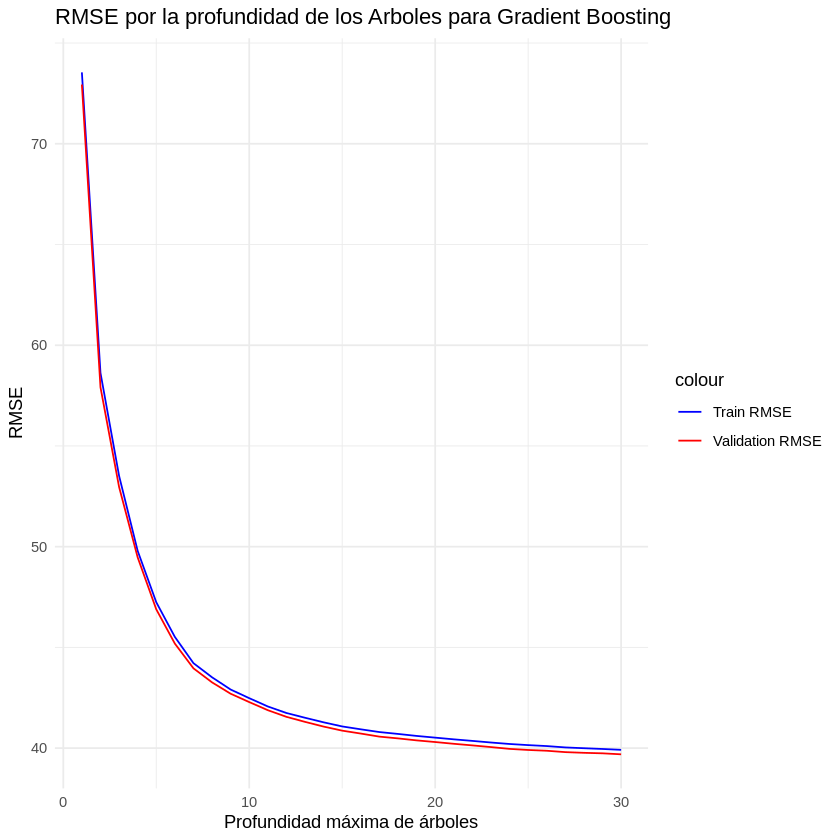

In [ ]:
ggplot(df_metricas, aes(x = max_depth)) +
    geom_line(aes(y = train_rmse, color = "Train RMSE")) +
    geom_line(aes(y = val_rmse, color = "Validation RMSE")) +
    labs(title = "RMSE por la profundidad de los Arboles para Gradient Boosting",
         x = "Profundidad máxima de árboles",
         y = "RMSE") +
    scale_color_manual(values = c("Train RMSE" = "blue", "Validation RMSE" = "red")) +
    theme_minimal()

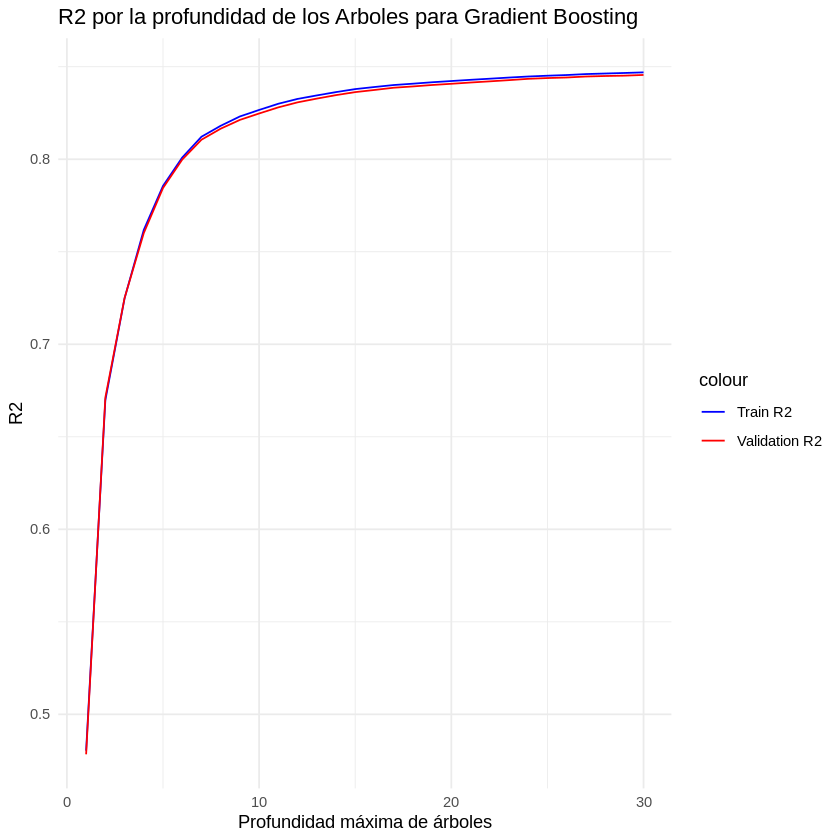

In [ ]:
ggplot(df_metricas, aes(x = max_depth)) +
    geom_line(aes(y = train_r2, color = "Train R2")) +
    geom_line(aes(y = val_r2, color = "Validation R2")) +
    labs(title = "R2 por la profundidad de los Arboles para Gradient Boosting",
         x = "Profundidad máxima de árboles",
         y = "R2") +
    scale_color_manual(values = c("Train R2" = "blue", "Validation R2" = "red")) +
    theme_minimal()

Entrenamos el modelo con valor optimo de max_depth = 7 para diferentes valores dl numero de árboles (n_estimators)

In [ ]:
learning_rate <-  0.01
max_depth <- 7

n_estimators_list <- c()
train_rmse_list <- c()
train_mae_list <- c()
train_r2_list <- c()
val_rmse_list <-c()
val_mae_list <- c()
val_r2_list <- c()
i <- 1

for (n_estimators in seq(100, 2000, by=100)) {
 cat("\nEl numero árboles: ", n_estimators, "\n")
 start_time <- Sys.time()
 model_gbm = gbm(downtime_gross ~ waiting_hours + changed_pcs + mechanic + action_desc +
    parts_cost + base_model + cause_desc + failure_desc + Cumulative_Maintenance_Cost +
    Cumulative_Failure_Count, data = train_data5,
                 distribution = "gaussian",
                # cv.folds = 10,
                 shrinkage = learning_rate,
                 n.trees = n_estimators,
                 interaction.depth = max_depth)
 end_time <- Sys.time()
 training_time8 <- end_time - start_time
 cat("Training time: ", training_time8, "\n")

 # Predecir con el conjunto de entrenamiento
 train_predictions <- predict(model_gbm, newdata = train_data5)

 # Calcular métricas de rendimiento para el conjunto de entrenamiento
 train_actuals <- train_data5$downtime_gross
 train_rmse <- sqrt(mean((train_predictions - train_actuals)^2))
 train_mae <- mean(abs(train_predictions - train_actuals))
 train_r2 <- 1 - (sum((train_predictions - train_actuals)^2) / sum((train_actuals - mean(train_actuals))^2))

 cat("Train RMSE: ", train_rmse, "\n")
 cat("Train MAE: ", train_mae, "\n")
 cat("Train R-squared: ", train_r2, "\n\n")

 # Predecir con el conjunto de validación
 validation_predictions <- predict(model_gbm, newdata = validation_data5)

 # Calcular métricas de rendimiento para el conjunto de validación
 validation_actuals <- validation_data5$downtime_gross
 validation_rmse <- sqrt(mean((validation_predictions - validation_actuals)^2))
 validation_mae <- mean(abs(validation_predictions - validation_actuals))
 validation_r2 <- 1 - (sum((validation_predictions - validation_actuals)^2) / sum((validation_actuals - mean(validation_actuals))^2))

 cat("Validation RMSE: ", validation_rmse, "\n")
 cat("Validation MAE: ", validation_mae, "\n")
 cat("Validation R-squared: ", validation_r2, "\n")

 n_estimators_list[i] <- n_estimators
 train_rmse_list[i] <- train_rmse
 train_mae_list[i] <- train_mae
 train_r2_list[i] <- train_r2
 val_rmse_list[i] <-validation_rmse
 val_mae_list[i] <- validation_mae
 val_r2_list[i] <- validation_r2
 i <- i + 1

}

df_metricas <- data.frame(n_estimators_list, train_rmse_list, train_mae_list, train_r2_list, val_rmse_list,val_mae_list, val_r2_list)
colnames(df_metricas) <- c("n_estimators", "train_rmse", "train_mae", "train_r2", "val_rmse", "val_mae", "val_r2")
df_metricas




El numero árboles:  100 
Training time:  12.85801 


Using 100 trees...




Train RMSE:  44.2382 
Train MAE:  30.24379 
Train R-squared:  0.8119792 



Using 100 trees...




Validation RMSE:  43.98359 
Validation MAE:  30.03848 
Validation R-squared:  0.8103409 

El numero árboles:  200 
Training time:  25.75138 


Using 200 trees...




Train RMSE:  23.1714 
Train MAE:  16.73727 
Train R-squared:  0.9484159 



Using 200 trees...




Validation RMSE:  23.1207 
Validation MAE:  16.65227 
Validation R-squared:  0.9475924 

El numero árboles:  300 
Training time:  37.71083 


Using 300 trees...




Train RMSE:  16.1042 
Train MAE:  12.20196 
Train R-squared:  0.9750834 



Using 300 trees...




Validation RMSE:  16.06335 
Validation MAE:  12.18208 
Validation R-squared:  0.9747033 

El numero árboles:  400 
Training time:  50.33917 


Using 400 trees...




Train RMSE:  13.9917 
Train MAE:  10.8822 
Train R-squared:  0.9811916 



Using 400 trees...




Validation RMSE:  13.96123 
Validation MAE:  10.89667 
Validation R-squared:  0.9808909 

El numero árboles:  500 
Training time:  1.048639 


Using 500 trees...




Train RMSE:  13.37167 
Train MAE:  10.51371 
Train R-squared:  0.9828216 



Using 500 trees...




Validation RMSE:  13.34482 
Validation MAE:  10.52308 
Validation R-squared:  0.9825411 

El numero árboles:  600 
Training time:  1.268269 


Using 600 trees...




Train RMSE:  13.15259 
Train MAE:  10.40457 
Train R-squared:  0.9833799 



Using 600 trees...




Validation RMSE:  13.13521 
Validation MAE:  10.41769 
Validation R-squared:  0.9830852 

El numero árboles:  700 
Training time:  1.483623 


Using 700 trees...




Train RMSE:  13.0524 
Train MAE:  10.33993 
Train R-squared:  0.9836321 



Using 700 trees...




Validation RMSE:  13.04364 
Validation MAE:  10.35453 
Validation R-squared:  0.9833202 

El numero árboles:  800 
Training time:  1.689365 


Using 800 trees...




Train RMSE:  12.98983 
Train MAE:  10.29775 
Train R-squared:  0.9837887 



Using 800 trees...




Validation RMSE:  12.99212 
Validation MAE:  10.32033 
Validation R-squared:  0.9834517 

El numero árboles:  900 
Training time:  1.88883 


Using 900 trees...




Train RMSE:  12.97407 
Train MAE:  10.28059 
Train R-squared:  0.983828 



Using 900 trees...




Validation RMSE:  12.97885 
Validation MAE:  10.3024 
Validation R-squared:  0.9834855 

El numero árboles:  1000 
Training time:  2.119235 


Using 1000 trees...




Train RMSE:  12.93282 
Train MAE:  10.25203 
Train R-squared:  0.9839307 



Using 1000 trees...




Validation RMSE:  12.95185 
Validation MAE:  10.2828 
Validation R-squared:  0.9835542 

El numero árboles:  1100 
Training time:  2.302208 


Using 1100 trees...




Train RMSE:  12.90746 
Train MAE:  10.23017 
Train R-squared:  0.9839936 



Using 1100 trees...




Validation RMSE:  12.92517 
Validation MAE:  10.258 
Validation R-squared:  0.9836219 

El numero árboles:  1200 
Training time:  2.518917 


Using 1200 trees...




Train RMSE:  12.88734 
Train MAE:  10.21496 
Train R-squared:  0.9840435 



Using 1200 trees...




Validation RMSE:  12.91225 
Validation MAE:  10.24852 
Validation R-squared:  0.9836546 

El numero árboles:  1300 
Training time:  2.685107 


Using 1300 trees...




Train RMSE:  12.8617 
Train MAE:  10.19858 
Train R-squared:  0.9841069 



Using 1300 trees...




Validation RMSE:  12.89658 
Validation MAE:  10.23704 
Validation R-squared:  0.9836942 

El numero árboles:  1400 
Training time:  2.914168 


Using 1400 trees...




Train RMSE:  12.83549 
Train MAE:  10.17897 
Train R-squared:  0.9841716 



Using 1400 trees...




Validation RMSE:  12.87724 
Validation MAE:  10.22167 
Validation R-squared:  0.9837431 

El numero árboles:  1500 
Training time:  3.058414 


Using 1500 trees...




Train RMSE:  12.81334 
Train MAE:  10.16278 
Train R-squared:  0.9842262 



Using 1500 trees...




Validation RMSE:  12.86134 
Validation MAE:  10.20997 
Validation R-squared:  0.9837832 

El numero árboles:  1600 
Training time:  3.269619 


Using 1600 trees...




Train RMSE:  12.79608 
Train MAE:  10.15153 
Train R-squared:  0.9842687 



Using 1600 trees...




Validation RMSE:  12.84671 
Validation MAE:  10.20173 
Validation R-squared:  0.9838201 

El numero árboles:  1700 
Training time:  3.427627 


Using 1700 trees...




Train RMSE:  12.77033 
Train MAE:  10.12967 
Train R-squared:  0.9843319 



Using 1700 trees...




Validation RMSE:  12.83003 
Validation MAE:  10.18959 
Validation R-squared:  0.9838621 

El numero árboles:  1800 
Training time:  3.641231 


Using 1800 trees...




Train RMSE:  12.76498 
Train MAE:  10.12508 
Train R-squared:  0.9843451 



Using 1800 trees...




Validation RMSE:  12.82364 
Validation MAE:  10.18031 
Validation R-squared:  0.9838782 

El numero árboles:  1900 
Training time:  3.863667 


Using 1900 trees...




Train RMSE:  12.74796 
Train MAE:  10.1107 
Train R-squared:  0.9843868 



Using 1900 trees...




Validation RMSE:  12.81909 
Validation MAE:  10.17212 
Validation R-squared:  0.9838896 

El numero árboles:  2000 
Training time:  4.064318 


Using 2000 trees...




Train RMSE:  12.73307 
Train MAE:  10.09972 
Train R-squared:  0.9844232 



Using 2000 trees...




Validation RMSE:  12.80881 
Validation MAE:  10.16548 
Validation R-squared:  0.9839154 


n_estimators,train_rmse,train_mae,train_r2,val_rmse,val_mae,val_r2
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
100,44.23820,30.24379,0.8119792,43.98359,30.03848,0.8103409
200,23.17140,16.73727,0.9484159,23.12070,16.65227,0.9475924
300,16.10420,12.20196,0.9750834,16.06335,12.18208,0.9747033
400,13.99170,10.88220,0.9811916,13.96123,10.89667,0.9808909
500,13.37167,10.51371,0.9828216,13.34482,10.52308,0.9825411
600,13.15259,10.40457,0.9833799,13.13521,10.41769,0.9830852
700,13.05240,10.33993,0.9836321,13.04364,10.35453,0.9833202
800,12.98983,10.29775,0.9837887,12.99212,10.32033,0.9834517
900,12.97407,10.28059,0.9838280,12.97885,10.30240,0.9834855


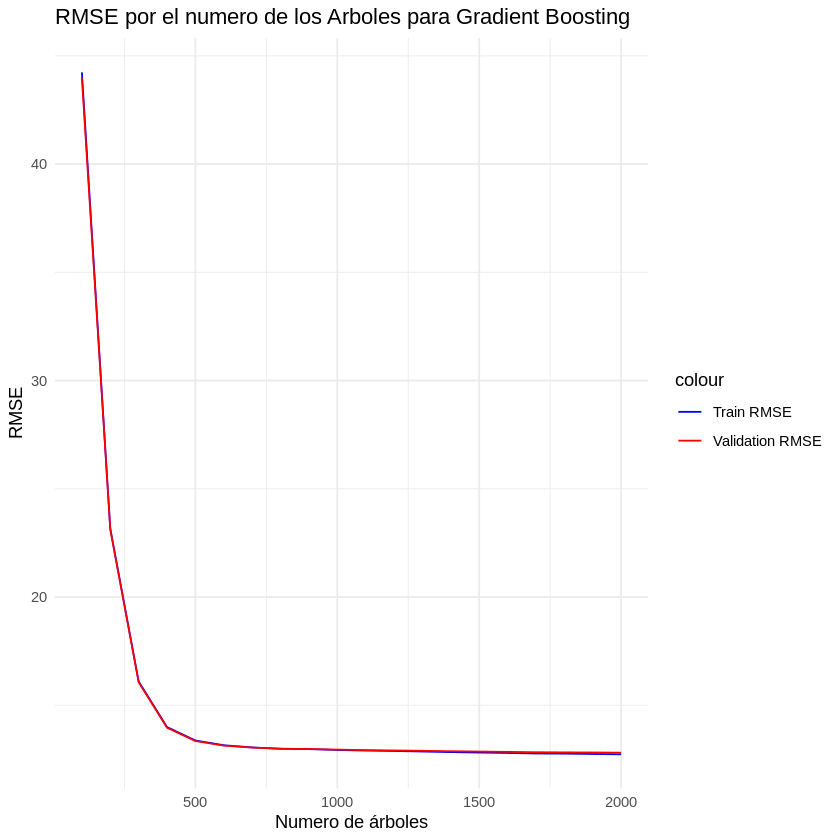

In [ ]:
ggplot(df_metricas, aes(x = n_estimators)) +
    geom_line(aes(y = train_rmse, color = "Train RMSE")) +
    geom_line(aes(y = val_rmse, color = "Validation RMSE")) +
    labs(title = "RMSE por el numero de los Arboles para Gradient Boosting",
         x = "Numero de árboles",
         y = "RMSE") +
    scale_color_manual(values = c("Train RMSE" = "blue", "Validation RMSE" = "red")) +
    theme_minimal()

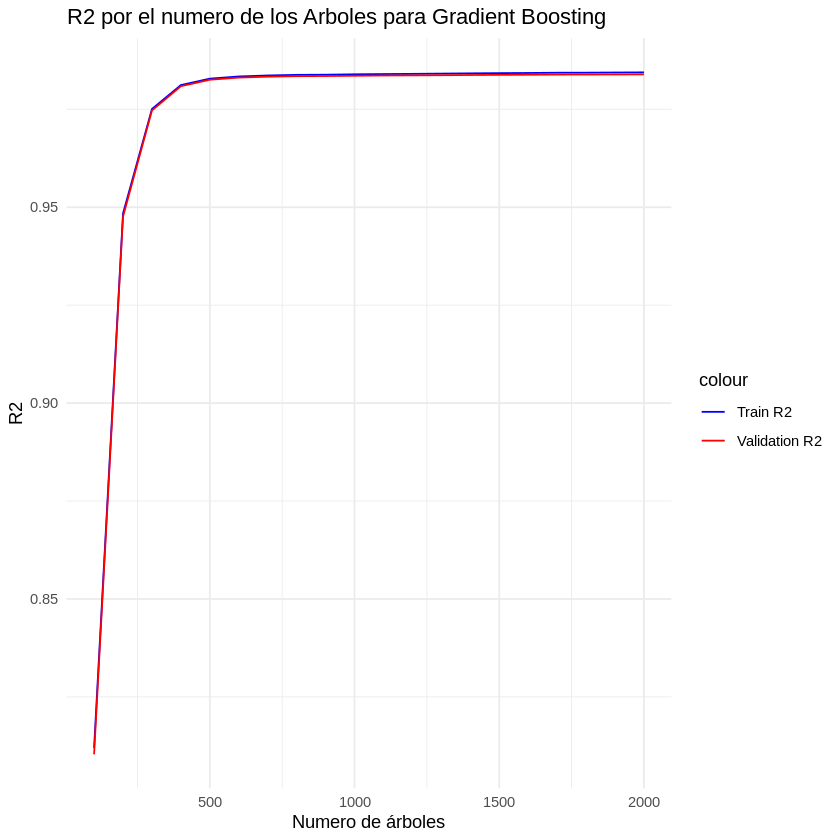

In [ ]:
ggplot(df_metricas, aes(x = n_estimators)) +
    geom_line(aes(y = train_r2, color = "Train R2")) +
    geom_line(aes(y = val_r2, color = "Validation R2")) +
    labs(title = "R2 por el numero de los Arboles para Gradient Boosting",
         x = "Numero de árboles",
         y = "R2") +
    scale_color_manual(values = c("Train R2" = "blue", "Validation R2" = "red")) +
    theme_minimal()

In [ ]:
df_metricas[df_metricas$n_estimators==500,]

,n_estimators,train_rmse,train_mae,train_r2,val_rmse,val_mae,val_r2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5,500,13.37167,10.51371,0.9828216,13.34482,10.52308,0.9825411


Entrenamos el modelo optimal con max_depth = 7 y n_estimators = 500

In [ ]:
formula

downtime_gross ~ waiting_hours + changed_pcs + mechanic + action_desc + 
    parts_cost + base_model + cause_desc + failure_desc + Cumulative_Maintenance_Cost + 
    Cumulative_Failure_Count

In [ ]:
learning_rate <-  0.01
max_depth <- 7
n_estimators <- 500

start_time <- Sys.time()
model_gbm = gbm(formula=formula, data = train_data5,
                 distribution = "gaussian",
                 #cv.folds = 10,
                 shrinkage = learning_rate,
                 n.trees = n_estimators,
                 interaction.depth = max_depth)
end_time <- Sys.time()
training_time8 <- end_time - start_time
cat("Training time: ", training_time8, "\n")

# Predecir con el conjunto de entrenamiento
train_predictions <- predict(model_gbm, newdata = train_data5)

# Calcular métricas de rendimiento para el conjunto de entrenamiento
train_actuals <- train_data5$downtime_gross
train_rmse <- sqrt(mean((train_predictions - train_actuals)^2))
train_mae <- mean(abs(train_predictions - train_actuals))
train_r2 <- 1 - (sum((train_predictions - train_actuals)^2) / sum((train_actuals - mean(train_actuals))^2))

cat("Train RMSE: ", train_rmse, "\n")
cat("Train MAE: ", train_mae, "\n")
cat("Train R-squared: ", train_r2, "\n\n")

# Predecir con el conjunto de validación
test_predictions <- predict(model_gbm, newdata = test_data5)

# Calcular métricas de rendimiento para el conjunto de validación
test_actuals <- test_data5$downtime_gross
test_rmse <- sqrt(mean((test_predictions - test_actuals)^2))
test_mae <- mean(abs(test_predictions - test_actuals))
test_r2 <- 1 - (sum((test_predictions - test_actuals)^2) / sum((test_actuals - mean(test_actuals))^2))

cat("Test RMSE: ", test_rmse, "\n")
cat("Test MAE: ", test_mae, "\n")
cat("Test R-squared: ", test_r2, "\n")

Training time:  1.617319 


Using 500 trees...




Train RMSE:  13.35294 
Train MAE:  10.5075 
Train R-squared:  0.9828697 



Using 500 trees...




Test RMSE:  13.33763 
Test MAE:  10.46641 
Test R-squared:  0.9827501 


# **MODELO RED NEURAL**

In [ ]:
install.packages("tensorflow")
library(tensorflow)
install.packages("keras3")
library(keras3)
install.packages("tidyverse")
library(tidyverse)
install.packages("tidymodels")
library(tidymodels)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘RcppTOML’, ‘here’, ‘png’, ‘config’, ‘reticulate’, ‘tfruns’, ‘tfautograph’



Attaching package: ‘tensorflow’


The following object is masked from ‘package:caret’:

    train


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘zeallot’



Attaching package: ‘keras3’


The following objects are masked from ‘package:tensorflow’:

    set_random_seed, shape


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats 1.0.0     ✔ tibble  3.2.1
✔ purrr   1.0.2     ✔ tidyr   1.3.1
✔ stringr 1.5.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ scales::col_factor()    masks readr::col_factor()
✖ randomForest::combine() masks dplyr::combine()
✖ purrr::discard()  

In [ ]:
dim(train_data4)
dim(validation_data4)
dim(test_data4)

[1] 95100    18

[1] 27171    18

[1] 13587    18

In [ ]:
formula

downtime_gross ~ waiting_hours + changed_pcs + mechanic + action_desc + 
    parts_cost + base_model + cause_desc + failure_desc + Cumulative_Maintenance_Cost + 
    Cumulative_Failure_Count

**Creamos el conjunto de datos del entrenamiento y de la evaluación**

In [ ]:
encoder1 <- LabelEncoder$new()
encoder2 <- LabelEncoder$new()
encoder3 <- LabelEncoder$new()
encoder4 <- LabelEncoder$new()
encoder5 <- LabelEncoder$new()
encoder6 <- LabelEncoder$new()
encoder7 <- LabelEncoder$new()

data_for_rn <- rbind(rbind(train_data4, validation_data4), test_data4)

data_for_rn$operation <- encoder1$fit_transform(data_for_rn$operation)
data_for_rn$base_model <- encoder2$fit_transform(data_for_rn$base_model)
data_for_rn$problem_desc <- encoder3$fit_transform(data_for_rn$problem_desc)
data_for_rn$failure_desc <- encoder4$fit_transform(data_for_rn$failure_desc)
data_for_rn$cause_desc <- encoder5$fit_transform(data_for_rn$cause_desc)
data_for_rn$action_desc <- encoder6$fit_transform(data_for_rn$action_desc)
data_for_rn$mechanic <- encoder7$fit_transform(data_for_rn$mechanic)

data_for_rn <- data_for_rn[, c("waiting_hours", "changed_pcs", "mechanic", "action_desc",
                               "parts_cost", "base_model", "cause_desc", "failure_desc",
                               "Cumulative_Maintenance_Cost", "Cumulative_Failure_Count",
                               "downtime_gross")]
head(data_for_rn, 6)


waiting_hours,changed_pcs,mechanic,action_desc,parts_cost,base_model,cause_desc,failure_desc,Cumulative_Maintenance_Cost,Cumulative_Failure_Count,downtime_gross
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
0.6666667,0,0,0,0.00,0,0,0,75.32,8,65
0.0000000,1,1,1,0.00,1,1,1,13.30,9,30
0.0000000,0,2,2,73.48,2,2,1,1035.76,41,15
0.0000000,0,0,2,0.00,1,1,0,707.77,27,25
1.5000000,0,3,3,0.00,0,2,2,149.30,25,115
0.1666667,0,4,0,0.00,3,3,2,42.40,24,15


In [ ]:
summary(data_for_rn)

 waiting_hours      changed_pcs        mechanic      action_desc    
 Min.   :-4.0000   Min.   : 0.000   Min.   : 0.00   Min.   : 0.000  
 1st Qu.: 0.0000   1st Qu.: 0.000   1st Qu.: 7.00   1st Qu.: 2.000  
 Median : 0.0000   Median : 1.000   Median :28.00   Median : 6.000  
 Mean   : 0.4955   Mean   : 0.999   Mean   :33.12   Mean   : 8.028  
 3rd Qu.: 0.3333   3rd Qu.: 1.000   3rd Qu.:54.00   3rd Qu.:12.000  
 Max.   :10.0000   Max.   :14.000   Max.   :85.00   Max.   :28.000  
   parts_cost        base_model       cause_desc      failure_desc  
 Min.   :   0.00   Min.   : 0.000   Min.   : 0.000   Min.   :0.000  
 1st Qu.:   0.00   1st Qu.: 1.000   1st Qu.: 2.000   1st Qu.:0.000  
 Median :   0.00   Median : 7.000   Median : 5.000   Median :2.000  
 Mean   :  12.11   Mean   : 6.874   Mean   : 7.908   Mean   :1.402  
 3rd Qu.:   6.00   3rd Qu.:12.000   3rd Qu.:10.000   3rd Qu.:2.000  
 Max.   :2812.49   Max.   :21.000   Max.   :28.000   Max.   :3.000  
 Cumulative_Maintenance_Cost Cumul

In [ ]:
# Cambiamos los valores NA de la variable Age por la mediana
#mediana_Age <- median(data_for_rn$Age, na.rm = TRUE)
#data_for_rn$Age[is.na(data_for_rn$Age)] <- mediana_Age
#summary(data_for_rn$Age)

In [ ]:
# Crear conjuntos de entrenamiento y de prueba para el modelo Red Neural

train_data6 <- data_for_rn[1:(nrow(train_data4) + nrow(validation_data4)),]
test_data6 <- data_for_rn[(nrow(train_data4) + nrow(validation_data4)+1):(nrow(train_data4) + nrow(validation_data4)+nrow(test_data4)),]

dim(train_data6)
dim(test_data6)

[1] 122271     11

[1] 13587    11

In [ ]:
# Dividimos datasets por características y etiquetas para entrenar luego el modelo

X_train <- as.matrix(select(train_data6, -downtime_gross))
Y_train <- as.matrix(select(train_data6, downtime_gross))

X_test <- as.matrix(select(test_data6, -downtime_gross))
Y_test <- as.matrix(select(test_data6, downtime_gross))

print("Dimenciones del conjunto de datos de entrenamiento: ")
dim(X_train)
dim(Y_train)

print("Dimenciones del conjunto de datos de prueba: ")
dim(X_test)
dim(Y_test)

[1] "Dimenciones del conjunto de datos de entrenamiento: "


[1] 122271     10

[1] 122271      1

[1] "Dimenciones del conjunto de datos de prueba: "


[1] 13587    10

[1] 13587     1

**Creamos el modelo optimo**

In [ ]:
normalizer <- layer_normalization(axis = -1L)
normalizer %>% adapt(X_train)

In [ ]:
print(normalizer$mean)

tf.Tensor(
[[  0.49508613   1.0002536   33.12217      8.02187     12.14835
    6.864023     7.900524     1.4026793  428.62332     35.278625  ]], shape=(1, 10), dtype=float32)


Dos capas leneales, epochs = 30

In [ ]:
model_rn_optimo <- keras_model_sequential(shape=c(10)) %>%
    normalizer() %>%
    layer_dense(64, activation = 'relu') %>%
    layer_dense(64, activation = 'relu') %>%
    layer_dense(1)

model_rn_optimo %>% compile(
    loss = 'mean_squared_error',
    optimizer = optimizer_adam(0.01),
    metrics = "r2_score")

summary(model_rn_optimo)

Model: "sequential"
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape           ┃     Param # ┃ Trai… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━┩
│ normalization (Normalization) │ (None, 10)             │          21 │   Y   │
├───────────────────────────────┼────────────────────────┼─────────────┼───────┤
│ dense (Dense)                 │ (None, 64)             │         704 │   Y   │
├───────────────────────────────┼────────────────────────┼─────────────┼───────┤
│ dense_1 (Dense)               │ (None, 64)             │       4,160 │   Y   │
├───────────────────────────────┼────────────────────────┼─────────────┼───────┤
│ dense_2 (Dense)               │ (None, 1)              │          65 │   Y   │
└───────────────────────────────┴────────────────────────┴─────────────┴───────┘
 Total params: 4,950 (19.34 KB)
 Trainable params: 4,929 (19.25 KB)
 Non-trainable params

In [ ]:
history <- model_rn_optimo %>% fit(
  x = X_train,
  y = Y_train,
  validation_split = 0.2,
  verbose = 2,
  epochs = 30)

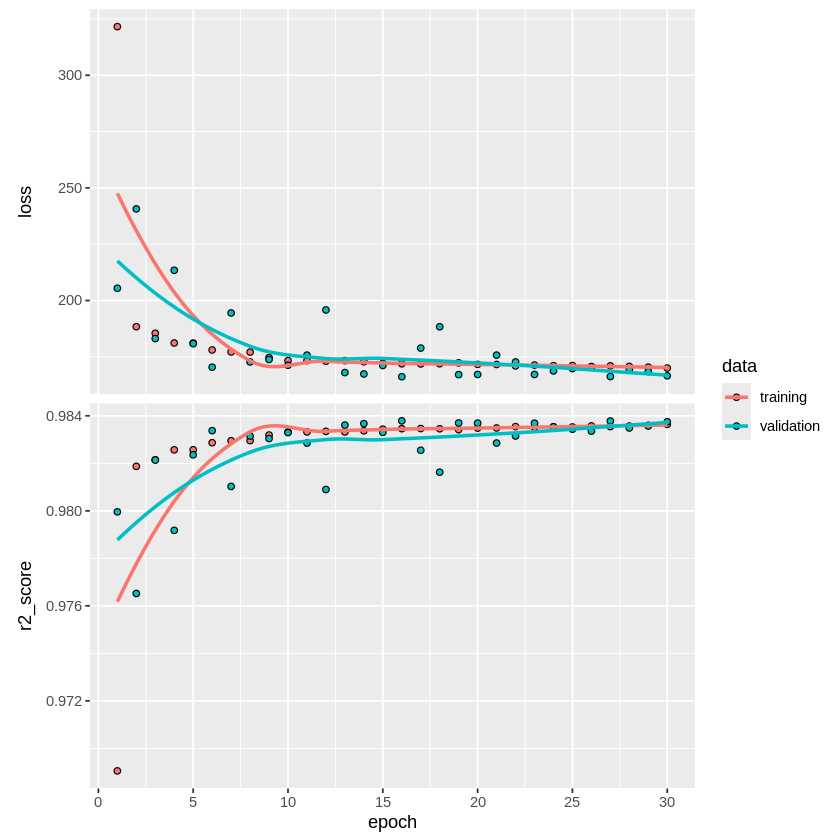

In [ ]:
plot(history)

In [ ]:
history


Final epoch (plot to see history):
        loss: 170
    r2_score: 0.9836
    val_loss: 166.6
val_r2_score: 0.9837 

In [ ]:
# Predecir con el conjunto de entrenamiento
train_predictions <- predict(model_rn_optimo, X_train)

# Calcular métricas de rendimiento para el conjunto de entrenamiento
train_actuals <- Y_train #train_data6$downtime_gross
train_rmse <- sqrt(mean((train_predictions - train_actuals)^2))
train_mae <- mean(abs(train_predictions - train_actuals))
train_r2 <- 1 - (sum((train_predictions - train_actuals)^2) / sum((train_actuals - mean(train_actuals))^2))

cat("Train RMSE: ", train_rmse, "\n")
cat("Train MAE: ", train_mae, "\n")
cat("Train R-squared: ", train_r2, "\n\n")

# Predecir con el conjunto de validación
test_predictions <- predict(model_rn_optimo, X_test)

# Calcular métricas de rendimiento para el conjunto de validación
test_actuals <- Y_test #test_data6$downtime_gross
test_rmse <- sqrt(mean((test_predictions - test_actuals)^2))
test_mae <- mean(abs(test_predictions - test_actuals))
test_r2 <- 1 - (sum((test_predictions - test_actuals)^2) / sum((test_actuals - mean(test_actuals))^2))

cat("Test RMSE: ", test_rmse, "\n")
cat("Test MAE: ", test_mae, "\n")
cat("Test R-squared: ", test_r2, "\n")

Train RMSE:  12.90847 
Train MAE:  10.20195 
Train R-squared:  0.9839197 

Test RMSE:  12.77814 
Test MAE:  10.09317 
Test R-squared:  0.984167 


**Pruebas de modelos con parametros diferentes**

Dos capas lineales, epochs = 100, loss = mean_squared_error, learning_rate = 0.01

In [ ]:
model_rn <- keras_model_sequential(shape=c(10)) %>%
    normalizer() %>%
    layer_dense(64, activation = 'relu') %>%
    layer_dense(64, activation = 'relu') %>%
    layer_dense(1)

model_rn %>% compile(
    loss = 'mean_squared_error',
    optimizer = optimizer_adam(0.01),
    metrics = "r2_score")

summary(model_rn)

Model: "sequential_2"
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape           ┃     Param # ┃ Trai… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━┩
│ normalization (Normalization) │ (None, 10)             │          21 │   Y   │
├───────────────────────────────┼────────────────────────┼─────────────┼───────┤
│ dense_6 (Dense)               │ (None, 64)             │         704 │   Y   │
├───────────────────────────────┼────────────────────────┼─────────────┼───────┤
│ dense_7 (Dense)               │ (None, 64)             │       4,160 │   Y   │
├───────────────────────────────┼────────────────────────┼─────────────┼───────┤
│ dense_8 (Dense)               │ (None, 1)              │          65 │   Y   │
└───────────────────────────────┴────────────────────────┴─────────────┴───────┘
 Total params: 4,950 (19.34 KB)
 Trainable params: 4,929 (19.25 KB)
 Non-trainable para

In [ ]:
history <- model_rn %>% fit(
  x = X_train,
  y = Y_train,
  validation_split = 0.2,
  verbose = 2,
  epochs = 100)

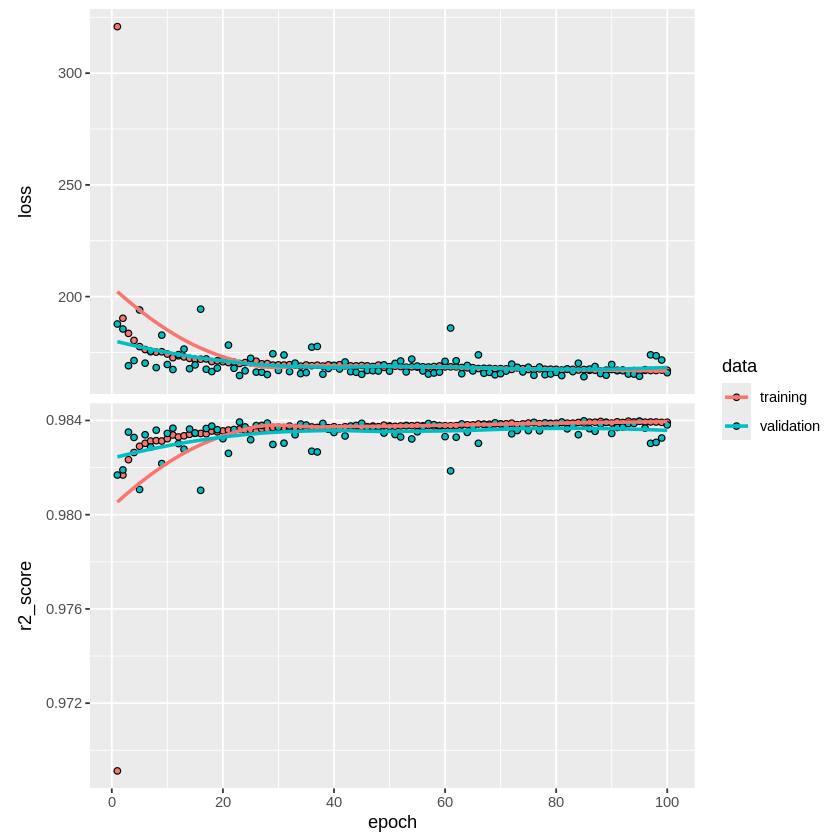

In [ ]:
plot(history)

In [ ]:
history


Final epoch (plot to see history):
        loss: 167
    r2_score: 0.9839
    val_loss: 165.9
val_r2_score: 0.9838 

Dos capas lineale, epochs = 30, loss = mean_absolute_error, learning_rate = 0.01

In [ ]:
model_rn1 <- keras_model_sequential(shape=c(10)) %>%
    normalizer() %>%
    layer_dense(64, activation = 'relu') %>%
    layer_dense(64, activation = 'relu') %>%
    layer_dense(1)

model_rn1 %>% compile(
    loss = 'mean_absolute_error',
    optimizer = optimizer_adam(0.01),
    metrics = "r2_score")

summary(model_rn1)

Model: "sequential_2"
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape           ┃     Param # ┃ Trai… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━┩
│ normalization (Normalization) │ (None, 10)             │          21 │   Y   │
├───────────────────────────────┼────────────────────────┼─────────────┼───────┤
│ dense_6 (Dense)               │ (None, 64)             │         704 │   Y   │
├───────────────────────────────┼────────────────────────┼─────────────┼───────┤
│ dense_7 (Dense)               │ (None, 64)             │       4,160 │   Y   │
├───────────────────────────────┼────────────────────────┼─────────────┼───────┤
│ dense_8 (Dense)               │ (None, 1)              │          65 │   Y   │
└───────────────────────────────┴────────────────────────┴─────────────┴───────┘
 Total params: 4,950 (19.34 KB)
 Trainable params: 4,929 (19.25 KB)
 Non-trainable para

In [ ]:
history1 <- model_rn1 %>% fit(
  x = X_train,
  y = Y_train,
  validation_split = 0.2,
  verbose = 2,
  epochs = 30)

In [ ]:
history1


Final epoch (plot to see history):
        loss: 10.11
    r2_score: 0.9827
    val_loss: 10.25
val_r2_score: 0.9819 

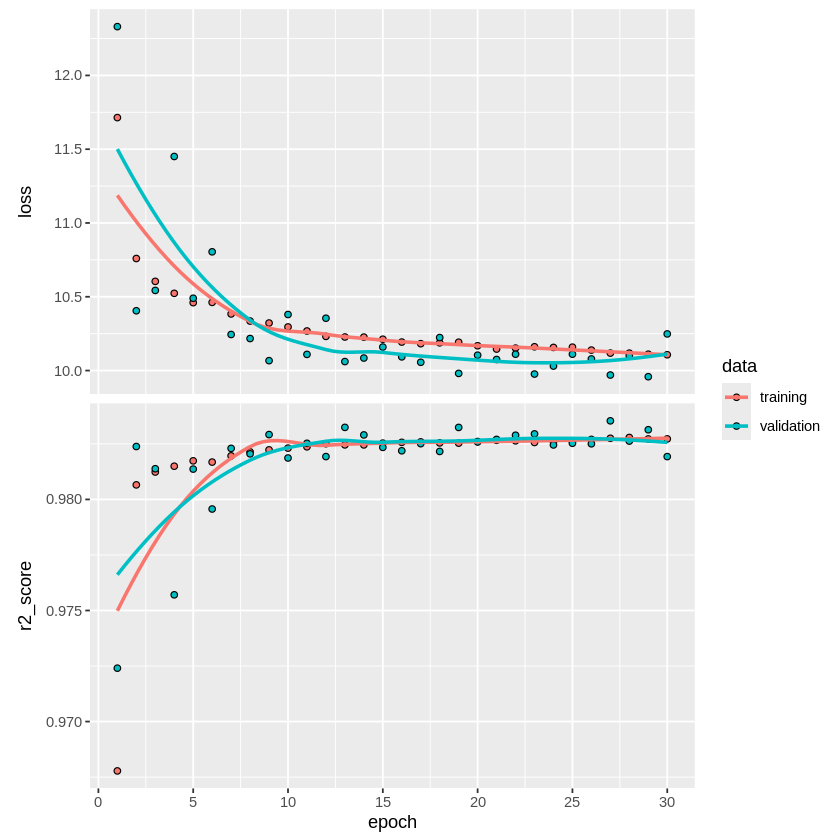

In [ ]:
plot(history1)

Una capa lineal, leraning_rate = 0.01

In [ ]:
model_rn2 <- keras_model_sequential(shape=c(10)) %>%
    normalizer() %>%
    layer_dense(1)

model_rn2 %>% compile(
    loss = 'mean_squared_error',
    optimizer = optimizer_adam(0.01),
    metrics = "r2_score")

summary(model_rn2)

Model: "sequential_3"
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape           ┃     Param # ┃ Trai… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━┩
│ normalization (Normalization) │ (None, 10)             │          21 │   Y   │
├───────────────────────────────┼────────────────────────┼─────────────┼───────┤
│ dense_9 (Dense)               │ (None, 1)              │          11 │   Y   │
└───────────────────────────────┴────────────────────────┴─────────────┴───────┘
 Total params: 32 (132.00 B)
 Trainable params: 11 (44.00 B)
 Non-trainable params: 21 (88.00 B)


In [ ]:
history2 <- model_rn2 %>% fit(
  x = X_train,
  y = Y_train,
  validation_split = 0.2,
  verbose = 2,
  epochs = 30)


Final epoch (plot to see history):
        loss: 325.3
    r2_score: 0.9687
    val_loss: 328.1
val_r2_score: 0.968 

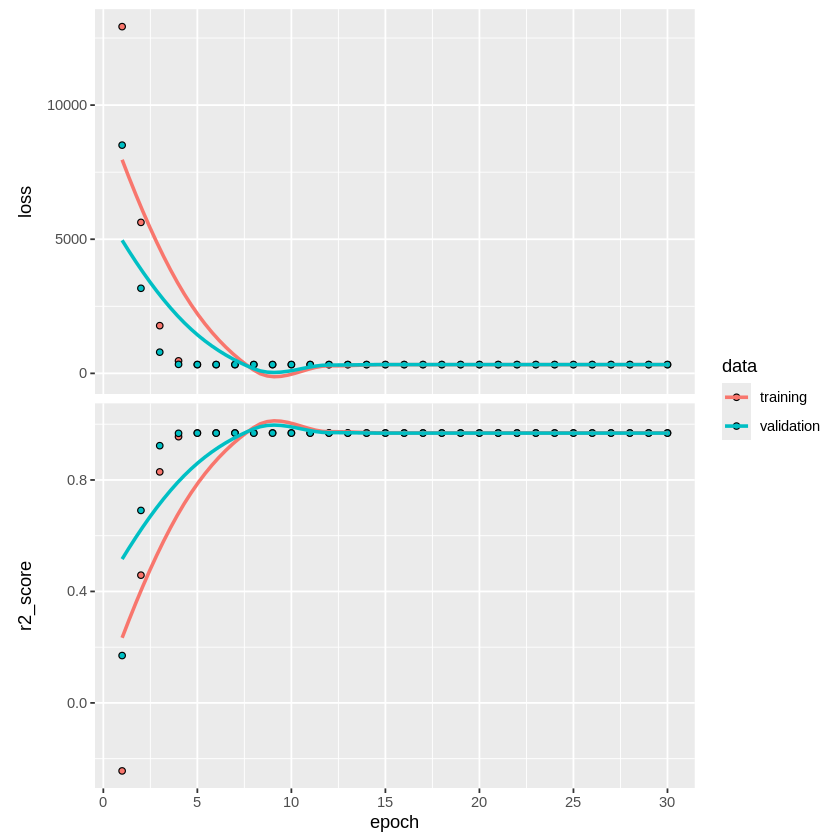

In [ ]:
plot(history2)
history2

Dos capas lineale, epochs = 30, loss = mean_squared_error, learning_rate = 0.001

In [ ]:
model_rn3 <- keras_model_sequential(shape=c(10)) %>%
    normalizer() %>%
    layer_dense(64, activation = 'relu') %>%
    layer_dense(64, activation = 'relu') %>%
    layer_dense(1)

model_rn3 %>% compile(
    loss = 'mean_squared_error',
    optimizer = optimizer_adam(0.001),
    metrics = "r2_score")

summary(model_rn3)

Model: "sequential_4"
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape           ┃     Param # ┃ Trai… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━┩
│ normalization (Normalization) │ (None, 10)             │          21 │   Y   │
├───────────────────────────────┼────────────────────────┼─────────────┼───────┤
│ dense_10 (Dense)              │ (None, 64)             │         704 │   Y   │
├───────────────────────────────┼────────────────────────┼─────────────┼───────┤
│ dense_11 (Dense)              │ (None, 64)             │       4,160 │   Y   │
├───────────────────────────────┼────────────────────────┼─────────────┼───────┤
│ dense_12 (Dense)              │ (None, 1)              │          65 │   Y   │
└───────────────────────────────┴────────────────────────┴─────────────┴───────┘
 Total params: 4,950 (19.34 KB)
 Trainable params: 4,929 (19.25 KB)
 Non-trainable para


Final epoch (plot to see history):
        loss: 162.5
    r2_score: 0.9844
    val_loss: 165.9
val_r2_score: 0.9838 

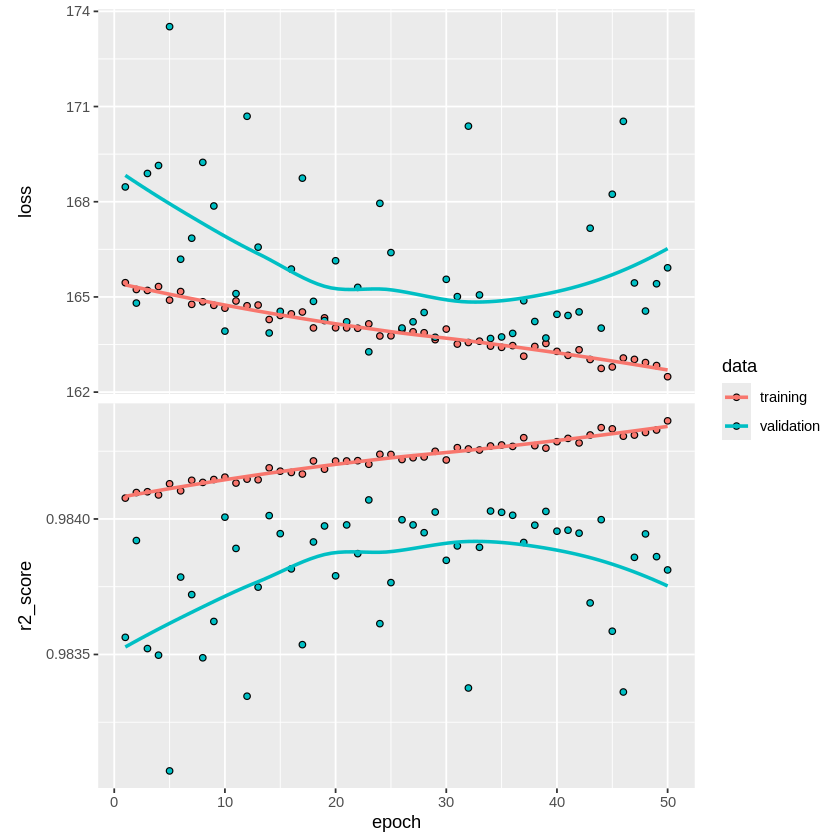

In [ ]:
history3 <- model_rn3 %>% fit(
  x = X_train,
  y = Y_train,
  validation_split = 0.2,
  verbose = 2,
  epochs = 50)

plot(history3)
history3

Una capa lineal, loss = mean_absolute_error, learning_rate = 0.001

In [ ]:
model_rn4 <- keras_model_sequential(shape=c(10)) %>%
    normalizer() %>%
    layer_dense(1)

model_rn4 %>% compile(
    loss = 'mean_absolute_error',
    optimizer = optimizer_adam(0.001),
    metrics = "r2_score")

summary(model_rn4)

Model: "sequential_7"
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape           ┃     Param # ┃ Trai… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━┩
│ normalization (Normalization) │ (None, 10)             │          21 │   Y   │
├───────────────────────────────┼────────────────────────┼─────────────┼───────┤
│ dense_15 (Dense)              │ (None, 1)              │          11 │   Y   │
└───────────────────────────────┴────────────────────────┴─────────────┴───────┘
 Total params: 32 (132.00 B)
 Trainable params: 11 (44.00 B)
 Non-trainable params: 21 (88.00 B)



Final epoch (plot to see history):
        loss: 14.43
    r2_score: 0.965
    val_loss: 14.46
val_r2_score: 0.9642 

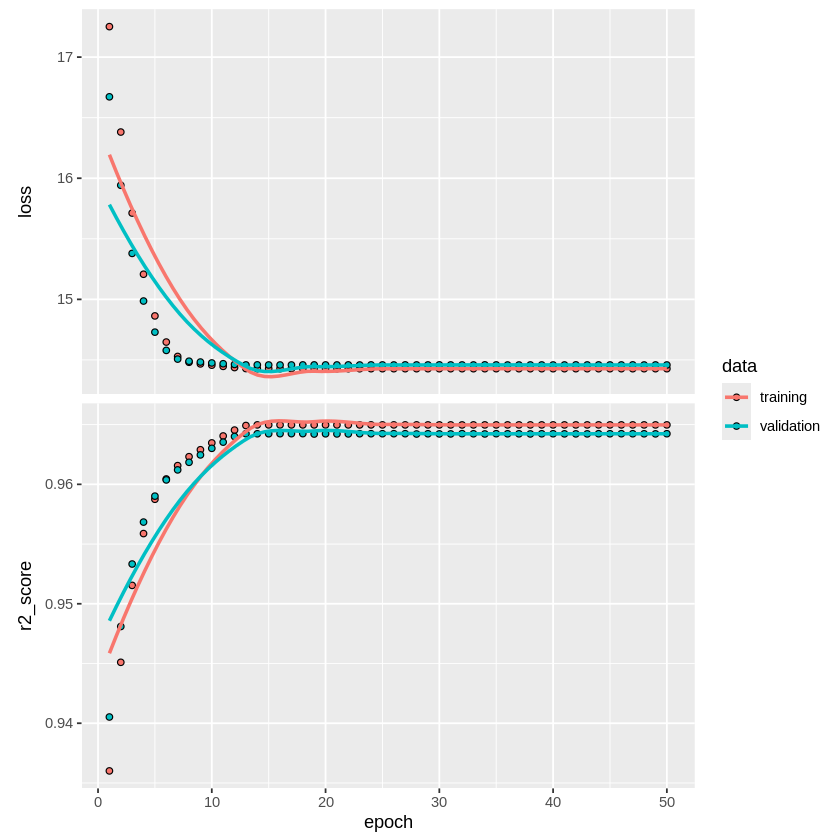

In [ ]:
history4 <- model_rn4 %>% fit(
  x = X_train,
  y = Y_train,
  validation_split = 0.2,
  verbose = 2,
  epochs = 50)

plot(history4)
history4

Dos capas lineales, epochs = 30, loss = mean_squared_error, learning_rate = 0.001

In [ ]:
model_rn5 <- keras_model_sequential(shape=c(10)) %>%
    normalizer() %>%
    layer_dense(64, activation = 'relu') %>%
    layer_dense(64, activation = 'relu') %>%
    layer_dense(1)

model_rn5 %>% compile(
    loss = 'mean_squared_error',
    optimizer = optimizer_adam(0.001),
    metrics = "r2_score")

summary(model_rn5)

Model: "sequential_8"
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape           ┃     Param # ┃ Trai… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━┩
│ normalization (Normalization) │ (None, 10)             │          21 │   Y   │
├───────────────────────────────┼────────────────────────┼─────────────┼───────┤
│ dense_16 (Dense)              │ (None, 64)             │         704 │   Y   │
├───────────────────────────────┼────────────────────────┼─────────────┼───────┤
│ dense_17 (Dense)              │ (None, 64)             │       4,160 │   Y   │
├───────────────────────────────┼────────────────────────┼─────────────┼───────┤
│ dense_18 (Dense)              │ (None, 1)              │          65 │   Y   │
└───────────────────────────────┴────────────────────────┴─────────────┴───────┘
 Total params: 4,950 (19.34 KB)
 Trainable params: 4,929 (19.25 KB)
 Non-trainable para


Final epoch (plot to see history):
        loss: 162.8
    r2_score: 0.9843
    val_loss: 163.2
val_r2_score: 0.9841 

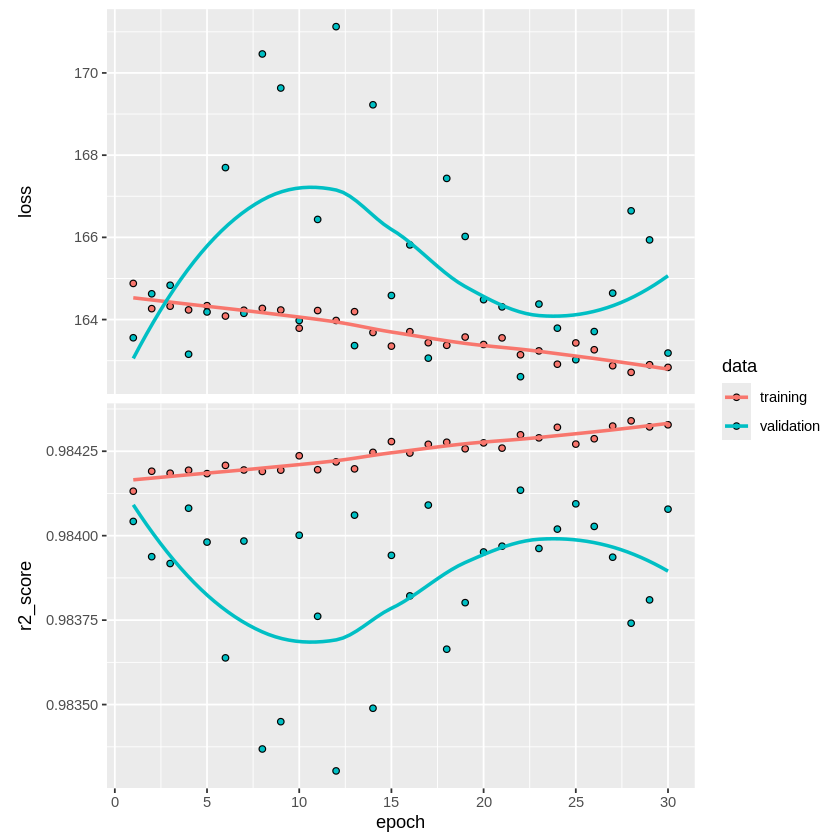

In [ ]:
history5 <- model_rn5 %>% fit(
  x = X_train,
  y = Y_train,
  validation_split = 0.2,
  verbose = 2,
  epochs = 30)

  plot(history5)
  history5

Tres capas lineales, loss = mean_squared_error, learning_rate = 0.01, epoch = 30

In [ ]:
model_rn6 <- keras_model_sequential(shape=c(10)) %>%
    normalizer() %>%
    layer_dense(64, activation = 'relu') %>%
    layer_dense(64, activation = 'relu') %>%
    layer_dense(64, activation = 'relu') %>%
    layer_dense(1)

model_rn6 %>% compile(
    loss = 'mean_squared_error',
    optimizer = optimizer_adam(0.01),
    metrics = "r2_score")

summary(model_rn6)

Model: "sequential_9"
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape           ┃     Param # ┃ Trai… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━┩
│ normalization (Normalization) │ (None, 10)             │          21 │   Y   │
├───────────────────────────────┼────────────────────────┼─────────────┼───────┤
│ dense_19 (Dense)              │ (None, 64)             │         704 │   Y   │
├───────────────────────────────┼────────────────────────┼─────────────┼───────┤
│ dense_20 (Dense)              │ (None, 64)             │       4,160 │   Y   │
├───────────────────────────────┼────────────────────────┼─────────────┼───────┤
│ dense_21 (Dense)              │ (None, 64)             │       4,160 │   Y   │
├───────────────────────────────┼────────────────────────┼─────────────┼───────┤
│ dense_22 (Dense)              │ (None, 1)              │          65 │   Y   │
└─────


Final epoch (plot to see history):
        loss: 171.7
    r2_score: 0.9835
    val_loss: 172.8
val_r2_score: 0.9831 

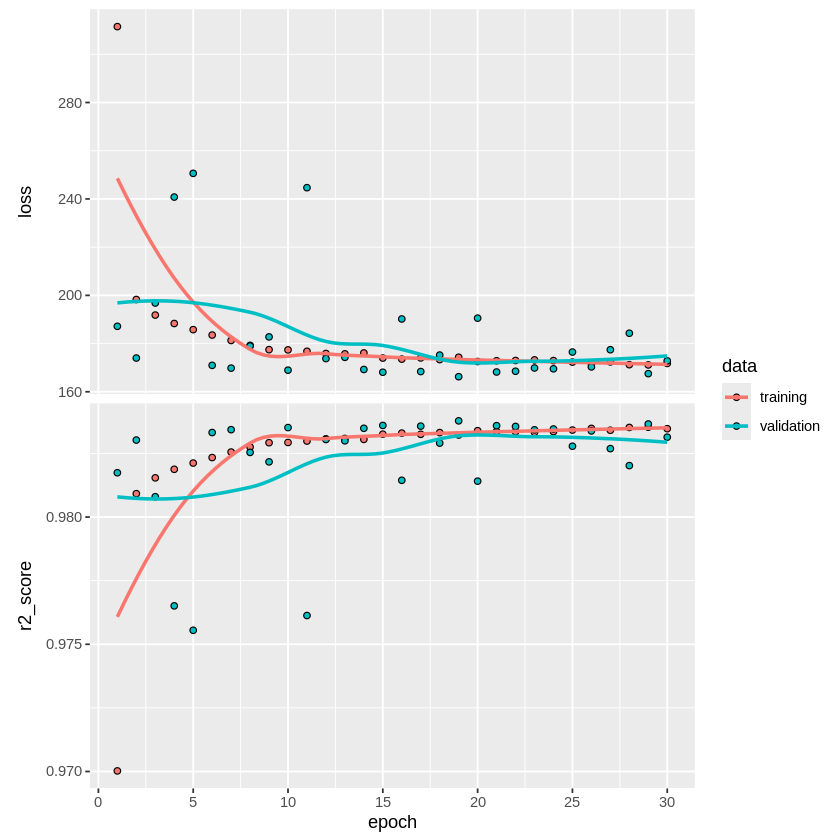

In [ ]:
history6 <- model_rn6 %>% fit(
  x = X_train,
  y = Y_train,
  validation_split = 0.2,
  verbose = 2,
  epochs = 30)

  plot(history6)
  history6

Tres capas lineales, loss = mean_squared_error, learning_rate = 0.001, epoch = 30

In [ ]:
model_rn7 <- keras_model_sequential(shape=c(10)) %>%
    normalizer() %>%
    layer_dense(64, activation = 'relu') %>%
    layer_dense(64, activation = 'relu') %>%
    layer_dense(64, activation = 'relu') %>%
    layer_dense(1)

model_rn7 %>% compile(
    loss = 'mean_squared_error',
    optimizer = optimizer_adam(0.001),
    metrics = "r2_score")

summary(model_rn7)

Model: "sequential_12"
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape           ┃     Param # ┃ Trai… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━┩
│ normalization (Normalization) │ (None, 10)             │          21 │   Y   │
├───────────────────────────────┼────────────────────────┼─────────────┼───────┤
│ dense_31 (Dense)              │ (None, 64)             │         704 │   Y   │
├───────────────────────────────┼────────────────────────┼─────────────┼───────┤
│ dense_32 (Dense)              │ (None, 64)             │       4,160 │   Y   │
├───────────────────────────────┼────────────────────────┼─────────────┼───────┤
│ dense_33 (Dense)              │ (None, 64)             │       4,160 │   Y   │
├───────────────────────────────┼────────────────────────┼─────────────┼───────┤
│ dense_34 (Dense)              │ (None, 1)              │          65 │   Y   │
└────


Final epoch (plot to see history):
        loss: 166.5
    r2_score: 0.9841
    val_loss: 165
val_r2_score: 0.9837 

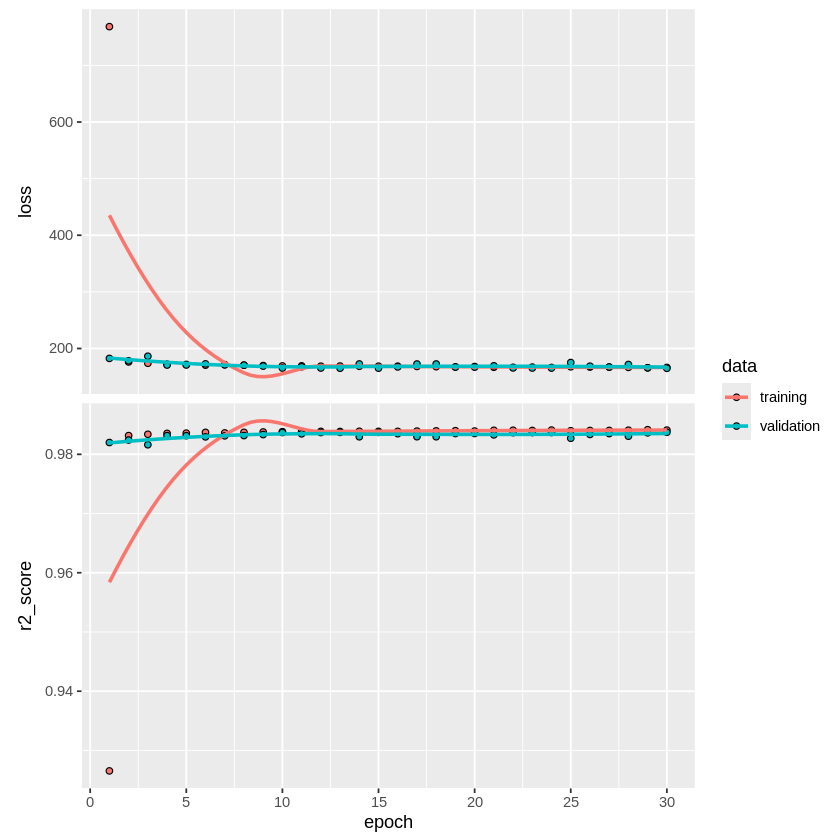

In [ ]:
history7 <- model_rn7 %>% fit(
  x = X_train,
  y = Y_train,
  validation_split = 0.3,
  verbose = 2,
  epochs = 30)

  plot(history7)
  history7